<a href="https://colab.research.google.com/github/prinakayama/DataGirls_Desafio_dados/blob/master/TRABALHO_FINAL_DATA_GIRLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 👩‍💻**Este trabalho foi feito por: Priscila Nakayama, Layssa Rodrigues e Suzana Gomes**. Este projeto tem como objetivo a realização de um processo de ETL da base do DataHackers State of data Brazil 2023 como desafio do Bootcamp Re Start Data Girls.

## **📚 1 - Instalação ,importação das bibliotecas e Organização dos Dados**

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd


from sklearn.impute import SimpleImputer

In [2]:
# #Montando o Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
#Carregndo o DataFrame do Drive -- copiar path
df = pd.read_csv("/content/State_of_data_BR_2023_Kaggle - df_survey_2023.csv")

In [4]:
df.head()

('P0', 'id')  ('P1_a ', 'Idade')  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g                  31   
1  0026aa3fwd78u0026asg7456tfkjg2cs                  30   
2  00r21rb9pusd1b0v7ew00r21rw3dy69w                  37   
3  00urm3jf2cek12w6ygue00urm3jzd17j                  22   
4  00v0az4g792svil00vn6y1kfm9hq8vy9                  34   

  ('P1_a_1 ', 'Faixa idade') ('P1_b ', 'Genero') ('P1_c ', 'Cor/raca/etnia')  \
0                      30-34           Masculino                      Branca   
1                      30-34           Masculino                      Branca   
2                      35-39            Feminino                     Amarela   
3                      22-24           Masculino                       Preta   
4                      30-34           Masculino                      Branca   

  ('P1_d ', 'PCD')  ('P1_e ', 'experiencia_profissional_prejudicada')  \
0              Não                                                NaN   
1              Não                                                NaN   
2              Não  Sim, acredito que a minha a experiência profis...   
3              Não  Não acredito que minha experiência profissiona...   
4              Não                                                NaN   

   ('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')  \
0                                                NaN                             
1                                                NaN                             
2                                                0.0                             
3                                                1.0                             
4                                                NaN                             

   ('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')  \
0                                                NaN                      
1                                                NaN                      
2                                                0.0                      
3                                                0.0                      
4                                                NaN                      

   ('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')  \
0                                                NaN                            
1                                                NaN                            
2                                                1.0                            
3                                                0.0                            
4                                                NaN                            

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   ('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')  \
0                                                1.0                                                                                            
1                                                NaN                                                                                            
2                                                1.0                                                                                            
3                                                NaN                                                                                            
4                                                NaN                                                                                            

  ('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')  \
0                                                0.0                                                                                
1                                                NaN                                                                   

In [5]:
def filtrar_por_categoria(df, categoria):
    colunas = [col for col in df.columns if col.startswith(f"('{categoria}") or col.startswith(f"('P0") ]
    return df[colunas]

df_P1 = filtrar_por_categoria(df, 'P1')
df_P2 = filtrar_por_categoria(df, 'P2')
df_P3 = filtrar_por_categoria(df, 'P3')
df_P4 = filtrar_por_categoria(df, 'P4')
df_P5 = filtrar_por_categoria(df, 'P5')
df_P6 = filtrar_por_categoria(df, 'P6')
df_P7 = filtrar_por_categoria(df, 'P7')
df_P8 = filtrar_por_categoria(df, 'P8')

In [6]:
df.columns.tolist()

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_1 ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_c ', 'Cor/raca/etnia')",
 "('P1_d ', 'PCD')",
 "('P1_e ', 'experiencia_profissional_prejudicada')",
 "('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')",
 "('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')",
 "('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",
 "('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')",
 "('P1_f ', 'aspectos_prejudicados')",
 "('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')",
 "('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')",
 "('P1_f_3', 'Aprovação em processos seletivos/entrevistas')",
 "('P1_f_4', 'Oportunidades de progressão de carreira')",
 "('P1_f_5', 'Velocidade de progressão de carreira')",
 "('P1_f_6', 'Nível de cobrança no trabalho/Stress no trabalho')",
 "('P1_f_7', 'Atenção dada diante das minhas opiniões e ideias'

In [7]:
# Renomeando as colunas na 19ª e 20ª posições
df_P1 = df_P1.rename(columns={
    df_P1.columns[19]: 'Relação com outros membros da empresa em momentos de trabalho',
    df_P1.columns[20]: 'Relação com outros membros da empresa em momentos de integração fora do trabalho'
})

In [8]:
df_P4 = df_P4.rename(columns={
    df_P4.columns[37]: 'Entre as linguagens listadas abaixo qual é a que você mais utiliza no trabalho?',
    df_P4.columns[38]: 'Entre as linguagens listadas abaixo qual é a sua preferida?',
    df_P4.columns[39]: 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?',
})


In [9]:
#função para remover os caracteres do inicio da pergunta
def remover_antes_da_virgula(coluna):
    if ',' in coluna:
        return coluna.split(',')[1].strip(" '()")
    else:
        return coluna.strip(" '()")

df_P1.columns = [remover_antes_da_virgula(col) for col in df_P1.columns]
df_P2.columns = [remover_antes_da_virgula(col) for col in df_P2.columns]
df_P3.columns = [remover_antes_da_virgula(col) for col in df_P3.columns]
df_P4.columns = [remover_antes_da_virgula(col) for col in df_P4.columns]
df_P5.columns = [remover_antes_da_virgula(col) for col in df_P5.columns]
df_P6.columns = [remover_antes_da_virgula(col) for col in df_P6.columns]
df_P7.columns = [remover_antes_da_virgula(col) for col in df_P7.columns]
df_P8.columns = [remover_antes_da_virgula(col) for col in df_P8.columns]

## **📚 2 - Dicionario dos dataframes e ETL**

***dados_demograficos***: Contém os dados demográficos dos participantes da pesquisa.<br>
***dados_carreira***: Informações sobre a carreira dos profissionais, como cargo, salário, experiência, etc.<br>
***desafios_gestores_dados***: Dados sobre os desafios enfrentados por gestores de times de dados.<br>
***conhecimentos_em_dados***: Informações sobre Conhecimentos na área de dados.<br>
***objetivos_area_dados***: Dados sobre os objetivos profissionais dos participantes na área de dados.<br>
***conhecim_engenharia_dados***: Conhecimentos específicos em Engenharia de Dados.<br>
***conhecim_analise_dados***: Conhecimentos específicos em Análise de Dados.<br>
***conhecim_ciencias_dados***: Conhecimentos específicos em Ciências de Dados.<br>


In [10]:
todas_as_colunas = list(df_P1.columns)
print(todas_as_colunas)

['id', 'Idade', 'Faixa idade', 'Genero', 'Cor/raca/etnia', 'PCD', 'experiencia_profissional_prejudicada', 'Não acredito que minha experiência profissional seja afetada', 'Experiencia prejudicada devido a minha Cor Raça Etnia', 'Experiencia prejudicada devido a minha identidade de gênero', 'Experiencia prejudicada devido ao fato de ser PCD', 'aspectos_prejudicados', 'Quantidade de oportunidades de emprego/vagas recebidas', 'Senioridade das vagas recebidas em relação à sua experiência', 'Aprovação em processos seletivos/entrevistas', 'Oportunidades de progressão de carreira', 'Velocidade de progressão de carreira', 'Nível de cobrança no trabalho/Stress no trabalho', 'Atenção dada diante das minhas opiniões e ideias', 'Relação com outros membros da empresa em momentos de trabalho', 'Relação com outros membros da empresa em momentos de integração fora do trabalho', 'vive_no_brasil', 'Estado onde mora', 'uf onde mora', 'Regiao onde mora', 'Mudou de Estado?', 'Regiao de origem', 'Nivel de En

In [11]:
dados_demograficos=df_P1.copy()
dados_carreira=df_P2.copy()
desafios_gestores_dados=df_P3.copy()
conhecimentos_em_dados=df_P4.copy()
objetivos_area_dados=df_P5.copy()
conhecim_engenharia_dados=df_P6.copy()
conhecim_analise_dados=df_P7.copy()
conhecim_ciencias_dados=df_P8.copy()

### 🎲 Dados Demograficos

In [12]:
dados_demograficos.head(2)

id  Idade Faixa idade     Genero  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g     31       30-34  Masculino   
1  0026aa3fwd78u0026asg7456tfkjg2cs     30       30-34  Masculino   

  Cor/raca/etnia  PCD experiencia_profissional_prejudicada  \
0         Branca  Não                                  NaN   
1         Branca  Não                                  NaN   

   Não acredito que minha experiência profissional seja afetada  \
0                                                NaN              
1                                                NaN              

   Experiencia prejudicada devido a minha Cor Raça Etnia  \
0                                                NaN       
1                                                NaN       

   Experiencia prejudicada devido a minha identidade de gênero  ...  \
0                                                NaN            ...   
1                                                NaN            ...   

   Relação com outros membros da empresa em momentos de trabalho  \
0                                                NaN               
1                                                NaN               

  Relação com outros membros da empresa em momentos de integração fora do trabalho  \
0                                                NaN                                 
1                                                NaN                                 

   vive_no_brasil     Estado onde mora  uf onde mora  Regiao onde mora  \
0               1    Minas Gerais (MG)            MG           Sudeste   
1               1  Espírito Santo (ES)            ES           Sudeste   

   Mudou de Estado?  Regiao de origem        Nivel de Ensino  \
0               1.0               NaN       Doutorado ou Phd   
1               1.0               NaN  Graduação/Bacharelado   

                                    Área de Formação  
0  Computação / Engenharia de Software / Sistemas...  
1  Computação / Engenharia de Software / Sistemas...  

[2 rows x 29 columns]

In [13]:
dados_demograficos.describe()

Idade  \
count  5293.000000   
mean     31.997166   
std       7.623498   
min      18.000000   
25%      27.000000   
50%      30.000000   
75%      36.000000   
max      73.000000   

       Não acredito que minha experiência profissional seja afetada  \
count                                        2719.000000              
mean                                            0.542111              
std                                             0.498315              
min                                             0.000000              
25%                                             0.000000              
50%                                             1.000000              
75%                                             1.000000              
max                                             1.000000              

       Experiencia prejudicada devido a minha Cor Raça Etnia  \
count                                        2719.000000       
mean                                            0.202648       
std                                             0.402046       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Experiencia prejudicada devido a minha identidade de gênero  \
count                                        2719.000000             
mean                                            0.291284             
std                                             0.454437             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             1.000000             
max                                             1.000000             

       Experiencia prejudicada devido ao fato de ser PCD  \
count                                        2719.000000   
mean                                            0.024641   
std                                             0.155058   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       Quantidade de oportunidades de emprego/vagas recebidas  \
count                                        1245.000000        
mean                                            0.389558        
std                                             0.487846        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                             1.000000        
max                                             1.000000        

       Senioridade das vagas recebidas em relação à sua experiência  \
count                                        1245.000000              
mean                                            0.342972              
std                                             0.474893              
min                                             0.000000              
25%                                             0.000000              
50%                                             0.000000              
75%                                             1.000000              
max                                             1.000000              

       Aprovação em processos seletivos/entrevistas  \
count                                   1245.000000   
mean                                       0.413655   
std                               

In [14]:
dados_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 29 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   id                                                                                5293 non-null   object 
 1   Idade                                                                             5293 non-null   int64  
 2   Faixa idade                                                                       5293 non-null   object 
 3   Genero                                                                            5293 non-null   object 
 4   Cor/raca/etnia                                                                    5293 non-null   object 
 5   PCD                                                                               5293 non-null   object 
 6   

In [15]:
dados_demograficos.isnull().sum()

id                                                                                     0
Idade                                                                                  0
Faixa idade                                                                            0
Genero                                                                                 0
Cor/raca/etnia                                                                         0
PCD                                                                                    0
experiencia_profissional_prejudicada                                                2574
Não acredito que minha experiência profissional seja afetada                        2574
Experiencia prejudicada devido a minha Cor Raça Etnia                               2574
Experiencia prejudicada devido a minha identidade de gênero                         2574
Experiencia prejudicada devido ao fato de ser PCD                                   2574
aspectos_prejudicados                                                               4049
Quantidade de oportunidades de emprego/vagas recebidas                              4048
Senioridade das vagas recebidas em relação à sua experiência                        4048
Aprovação em processos seletivos/entrevistas                                        4048
Oportunidades de progressão de carreira                                             4048
Velocidade de progressão de carreira                                                4048
Nível de cobrança no trabalho/Stress no trabalho                                    4048
Atenção dada diante das minhas opiniões e ideias                                    4048
Relação com outros membros da empresa em momentos de trabalho                       4048
Relação com outros membros da empresa em momentos de integração fora do trabalho    4048
vive_no_brasil                                                                         0
Estado onde mora                                                                     121
uf onde mora                                                                         124
Regiao onde mora                                                                     124
Mudou de Estado?                                                                     121
Regiao de origem                                                                    4229
Nivel de Ensino                                                                        0
Área de Formação                                                                     113
dtype: int64

In [16]:
dados_demograficos.columns.tolist()

['id',
 'Idade',
 'Faixa idade',
 'Genero',
 'Cor/raca/etnia',
 'PCD',
 'experiencia_profissional_prejudicada',
 'Não acredito que minha experiência profissional seja afetada',
 'Experiencia prejudicada devido a minha Cor Raça Etnia',
 'Experiencia prejudicada devido a minha identidade de gênero',
 'Experiencia prejudicada devido ao fato de ser PCD',
 'aspectos_prejudicados',
 'Quantidade de oportunidades de emprego/vagas recebidas',
 'Senioridade das vagas recebidas em relação à sua experiência',
 'Aprovação em processos seletivos/entrevistas',
 'Oportunidades de progressão de carreira',
 'Velocidade de progressão de carreira',
 'Nível de cobrança no trabalho/Stress no trabalho',
 'Atenção dada diante das minhas opiniões e ideias',
 'Relação com outros membros da empresa em momentos de trabalho',
 'Relação com outros membros da empresa em momentos de integração fora do trabalho',
 'vive_no_brasil',
 'Estado onde mora',
 'uf onde mora',
 'Regiao onde mora',
 'Mudou de Estado?',
 'Regia

Algumas colunas sao partes de perguntas

In [17]:
# Criando a coluna "voce acredita que algum aspecto pessoal possa te prejudicar no mercado?"
dados_demograficos['voce acredita que algum aspecto pessoal possa te prejudicar no mercado?'] = (
    (dados_demograficos['experiencia_profissional_prejudicada'].str.contains('Sim', case=False))
    | (dados_demograficos['Experiencia prejudicada devido a minha Cor Raça Etnia'] == 1)
    | (dados_demograficos['Experiencia prejudicada devido a minha identidade de gênero'] == 1)
    | (dados_demograficos['Experiencia prejudicada devido ao fato de ser PCD'] == 1)
).astype(int).replace({1: 'Sim', 0: 'Não'})

In [18]:
# Criando a coluna "motivos que o tenham prejudicado"
dados_demograficos['motivos que o tenham prejudicado'] = ''  # Inicializa a coluna com string vazia

# Preenche a coluna 'motivos que o tenham prejudicado' com base nas respostas das outras colunas
for index, row in dados_demograficos.iterrows():
    motivos = []
    if row['Experiencia prejudicada devido a minha Cor Raça Etnia'] == 1:
        motivos.append('Cor/Raça/Etnia')
    if row['Experiencia prejudicada devido a minha identidade de gênero'] == 1:
        motivos.append('Identidade de gênero')
    if row['Experiencia prejudicada devido ao fato de ser PCD'] == 1:
        motivos.append('PCD')

    dados_demograficos.loc[index, 'motivos que o tenham prejudicado'] = ', '.join(motivos)

In [19]:
# Criando a coluna "motivos que o tenham prejudicado"
dados_demograficos['Fatores da experiência profissional prejudicados'] = ''  # Inicializa a coluna com string vazia

# Preenche a coluna 'motivos que o tenham prejudicado' com base nas respostas das outras colunas
for index, row in dados_demograficos.iterrows():
    motivos = []
    if row['Quantidade de oportunidades de emprego/vagas recebidas'] == 1:
        motivos.append('Quantidade de oportunidades recebidas')
    if row['Senioridade das vagas recebidas em relação à sua experiência'] == 1:
        motivos.append('Senioridade das vagas recebidas em relação à sua experiência')
    if row['Aprovação em processos seletivos/entrevistas'] == 1:
        motivos.append('Aprovação em processos seletivos/entrevistas')
    if row['Oportunidades de progressão de carreira'] == 1:
        motivos.append('Oportunidades de progressão de carreira')
    if row['Velocidade de progressão de carreira'] == 1:
        motivos.append('Velocidade de progressão de carreira')
    if row['Nível de cobrança no trabalho/Stress no trabalho'] == 1:
        motivos.append('Nível de cobrança no trabalho/Stress no trabalho')
    if row['Atenção dada diante das minhas opiniões e ideias'] == 1:
        motivos.append('Atenção dada diante das minhas opiniões e ideias')
    if row['Relação com outros membros da empresa em momentos de trabalho'] == 1:
        motivos.append('Relação com outros membros da empresa em momentos de trabalho')
    if row['Relação com outros membros da empresa em momentos de integração fora do trabalho'] == 1:
        motivos.append('Relação com outros membros da empresa em momentos de integração fora do trabalho')

    dados_demograficos.loc[index, 'Fatores da experiência profissional prejudicados'] = ', '.join(motivos)


In [20]:
qtd_prejud = [
    'Não acredito que minha experiência profissional seja afetada',
 'Experiencia prejudicada devido a minha Cor Raça Etnia',
 'Experiencia prejudicada devido a minha identidade de gênero',
 'Experiencia prejudicada devido ao fato de ser PCD',
]

# Somar os valores de cada coluna
soma_qtd_prejud = dados_demograficos[qtd_prejud].sum()

# Imprimir a soma
print("qtd_prejud:")
print(soma_qtd_prejud)

qtd_prejud:
Não acredito que minha experiência profissional seja afetada    1474.0
Experiencia prejudicada devido a minha Cor Raça Etnia            551.0
Experiencia prejudicada devido a minha identidade de gênero      792.0
Experiencia prejudicada devido ao fato de ser PCD                 67.0
dtype: float64


In [21]:
asp_prejudicados = [
'Quantidade de oportunidades de emprego/vagas recebidas',
             'Senioridade das vagas recebidas em relação à sua experiência',
             'Aprovação em processos seletivos/entrevistas',
             'Oportunidades de progressão de carreira',
             'Velocidade de progressão de carreira',
             'Nível de cobrança no trabalho/Stress no trabalho',
             'Atenção dada diante das minhas opiniões e ideias',
             'Relação com outros membros da empresa em momentos de trabalho',
             'Relação com outros membros da empresa em momentos de integração fora do trabalho'
]

# Somar os valores de cada coluna
soma_asp_prejudicados = dados_demograficos[asp_prejudicados].sum()

# Imprimir a soma
print("aspectos_prejudicados:")
print(soma_asp_prejudicados)

aspectos_prejudicados:
Quantidade de oportunidades de emprego/vagas recebidas                              485.0
Senioridade das vagas recebidas em relação à sua experiência                        427.0
Aprovação em processos seletivos/entrevistas                                        515.0
Oportunidades de progressão de carreira                                             611.0
Velocidade de progressão de carreira                                                643.0
Nível de cobrança no trabalho/Stress no trabalho                                    348.0
Atenção dada diante das minhas opiniões e ideias                                    666.0
Relação com outros membros da empresa em momentos de trabalho                       400.0
Relação com outros membros da empresa em momentos de integração fora do trabalho    311.0
dtype: float64


In [22]:
dados_demograficos = dados_demograficos.drop(
    columns=['aspectos_prejudicados',
             'Quantidade de oportunidades de emprego/vagas recebidas',
             'Senioridade das vagas recebidas em relação à sua experiência',
             'Aprovação em processos seletivos/entrevistas',
             'Oportunidades de progressão de carreira',
             'Velocidade de progressão de carreira',
             'Nível de cobrança no trabalho/Stress no trabalho',
             'Atenção dada diante das minhas opiniões e ideias',
             'Relação com outros membros da empresa em momentos de trabalho',
             'Relação com outros membros da empresa em momentos de integração fora do trabalho',
             'experiencia_profissional_prejudicada',
             'Não acredito que minha experiência profissional seja afetada',
             'Experiencia prejudicada devido a minha Cor Raça Etnia',
             'Experiencia prejudicada devido a minha identidade de gênero',
             'Experiencia prejudicada devido ao fato de ser PCD'
             ]
)

In [23]:
print(dados_demograficos.columns)

Index(['id', 'Idade', 'Faixa idade', 'Genero', 'Cor/raca/etnia', 'PCD',
       'vive_no_brasil', 'Estado onde mora', 'uf onde mora',
       'Regiao onde mora', 'Mudou de Estado?', 'Regiao de origem',
       'Nivel de Ensino', 'Área de Formação',
       'voce acredita que algum aspecto pessoal possa te prejudicar no mercado?',
       'motivos que o tenham prejudicado',
       'Fatores da experiência profissional prejudicados'],
      dtype='object')


In [24]:
# Analise Genero
contagem_Genero = dados_demograficos['Genero'].value_counts()
porcentagem_Genero = dados_demograficos['Genero'].value_counts(normalize=True) * 100

df_Genero = pd.DataFrame({'Contagem': contagem_Genero, 'Porcentagem (%)': porcentagem_Genero.round(2)})
print(df_Genero)

                      Contagem  Porcentagem (%)
Genero                                         
Masculino                 3975            75.10
Feminino                  1293            24.43
Prefiro não informar        16             0.30
Outro                        9             0.17


In [25]:
#Media e moda  das idades
# Média de idade
media_idade = dados_demograficos['Idade'].mean()

# Idade mais frequente (moda)
moda_idade = dados_demograficos['Idade'].mode()[0]

# Percentual da moda
percentual_moda_idade = (dados_demograficos['Idade'].value_counts(normalize=True).loc[moda_idade]) * 100

# Idade mínima e máxima
idade_min = dados_demograficos['Idade'].min()
idade_max = dados_demograficos['Idade'].max()

# Calculando a faixa total de idades
faixa_idade = idade_max - idade_min

# Percentuais das idades mínima e máxima
percentual_idade_min = ((idade_min - idade_min) / faixa_idade) * 100
percentual_idade_max = ((idade_max - idade_min) / faixa_idade) * 100

# Exibir os resultados
print(f'Média de idade: {media_idade:.0f}')
print(f'Moda (idade mais frequente): {moda_idade} ({percentual_moda_idade:.1f}%)')
print(f'Idade mínima: {idade_min} ({percentual_idade_min:.1f}%)')
print(f'Idade máxima: {idade_max} ({percentual_idade_max:.1f}%)')

Média de idade: 32
Moda (idade mais frequente): 27 (7.1%)
Idade mínima: 18 (0.0%)
Idade máxima: 73 (100.0%)


In [26]:
dados_demograficos['Idade'].describe()

count    5293.000000
mean       31.997166
std         7.623498
min        18.000000
25%        27.000000
50%        30.000000
75%        36.000000
max        73.000000
Name: Idade, dtype: float64

In [27]:
descricao_por_genero = dados_demograficos.groupby('Genero')['Idade'].describe()
print(descricao_por_genero)

                       count       mean       std   min    25%   50%   75%  \
Genero                                                                       
Feminino              1293.0  32.033256  7.226519  18.0  27.00  31.0  36.0   
Masculino             3975.0  31.985409  7.751409  18.0  27.00  30.0  36.0   
Outro                    9.0  26.555556  3.643869  19.0  25.00  28.0  29.0   
Prefiro não informar    16.0  35.062500  7.243100  23.0  30.75  36.0  38.0   

                       max  
Genero                      
Feminino              64.0  
Masculino             73.0  
Outro                 30.0  
Prefiro não informar  51.0  


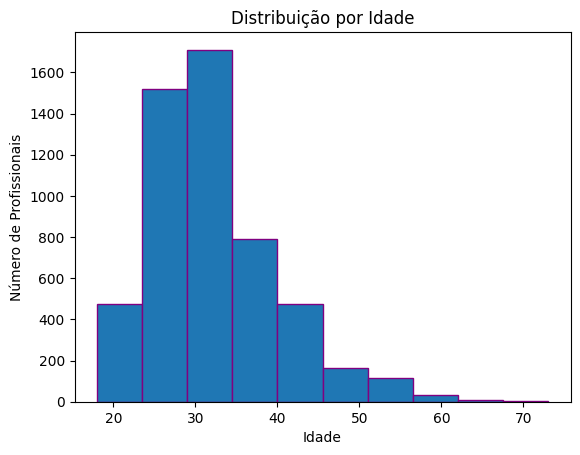

In [28]:
# Distribuição por Idade
dados_demograficos['Idade'].plot(kind='hist', bins=10, edgecolor='purple')
plt.title('Distribuição por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Profissionais')
plt.show()

In [29]:
# Analise Cor/raca/etnia
contagem_cor = dados_demograficos['Cor/raca/etnia'].value_counts()
porcentagem_cor = dados_demograficos['Cor/raca/etnia'].value_counts(normalize=True) * 100

df_cor = pd.DataFrame({'Contagem': contagem_cor, 'Porcentagem (%)': porcentagem_cor.round(2)})
print(df_cor)

                      Contagem  Porcentagem (%)
Cor/raca/etnia                                 
Branca                    3414            64.50
Parda                     1281            24.20
Preta                      387             7.31
Amarela                    147             2.78
Prefiro não informar        34             0.64
Outra                       18             0.34
Indígena                    12             0.23


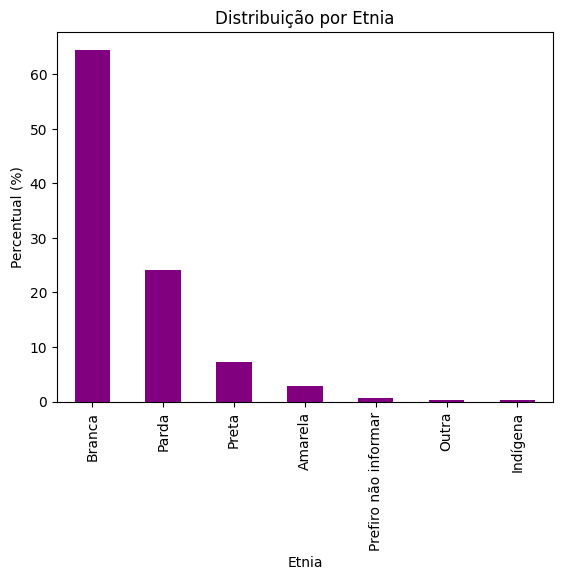

In [30]:
#Distrubuicao por etnia
etnia_dist = dados_demograficos['Cor/raca/etnia'].value_counts(normalize=True) * 100


etnia_dist.plot(kind='bar', color='purple')
plt.title('Distribuição por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Percentual (%)')
plt.show()

In [31]:
tabela_frequencia = pd.crosstab(dados_demograficos['Cor/raca/etnia'], dados_demograficos['Genero'])
print(tabela_frequencia)

Genero                Feminino  Masculino  Outro  Prefiro não informar
Cor/raca/etnia                                                        
Amarela                     41        105      0                     1
Branca                     836       2564      7                     7
Indígena                     4          8      0                     0
Outra                        2         15      0                     1
Parda                      297        983      1                     0
Prefiro não informar         9         19      0                     6
Preta                      104        281      1                     1


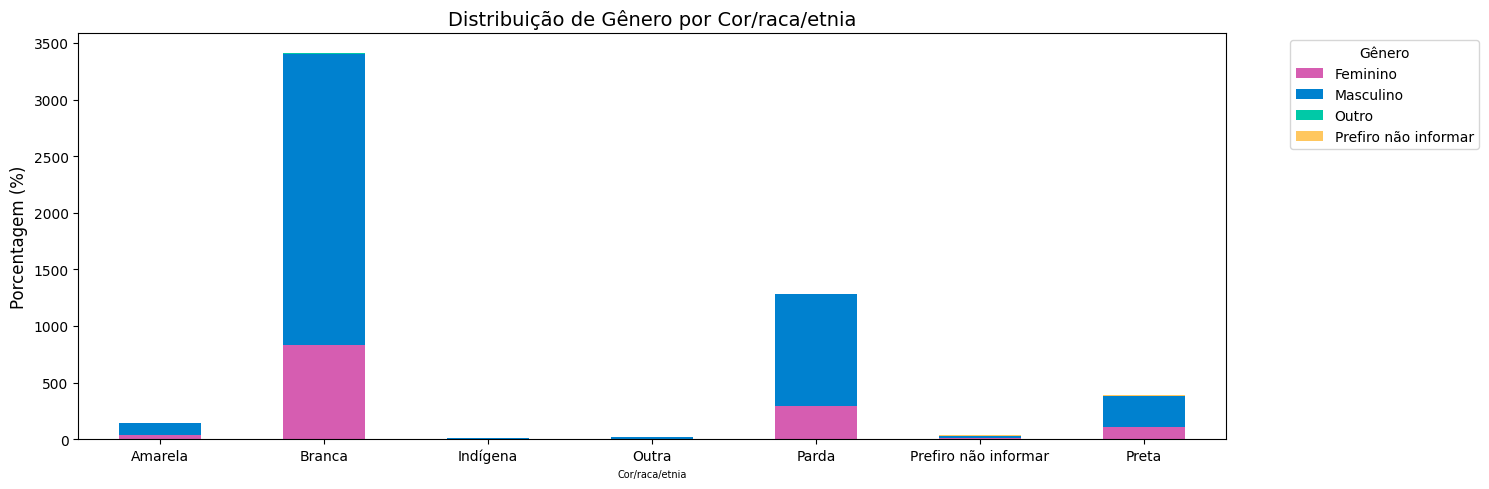

In [32]:
ax = tabela_frequencia.plot(kind='bar', rot=0, figsize=(15, 5), stacked=True, color=['#D65Db1', '#0081CF','#00C9A7','#FFC75F'])
plt.title('Distribuição de Gênero por Cor/raca/etnia', fontsize=14)
plt.xlabel('Cor/raca/etnia', fontsize=7)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
# Contagem de valores de PCD e normalização para percentual
pcd_dist = dados_demograficos['PCD'].value_counts(normalize=True) * 100

# Distribuição por gênero entre as pessoas com deficiência
pcd_genero_dist = dados_demograficos[dados_demograficos['PCD'] == 'Sim']['Genero'].value_counts(normalize=True) * 100

print("PCD:")
for pcd, percentual in pcd_dist.items():
    print(f"{pcd}: {percentual:.2f}%")

print("\nDistribuição por gênero entre as pessoas com deficiência:")
for genero, percentual in pcd_genero_dist.items():
    print(f"{genero}: {percentual:.2f}%")

PCD:
Não: 97.41%
Sim: 2.10%
Prefiro não informar: 0.49%

Distribuição por gênero entre as pessoas com deficiência:
Masculino: 67.57%
Feminino: 32.43%


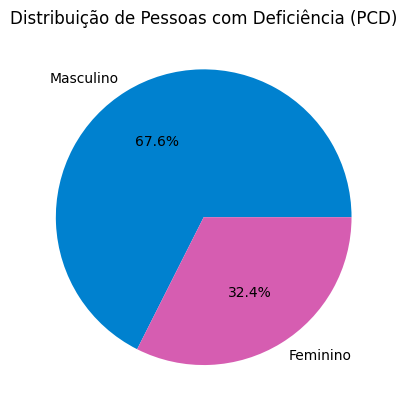

In [34]:
#Distribuição PCD
pcd_genero_dist .plot(kind='pie', autopct='%1.1f%%', colors=['#0081CF', '#D65Db1'])
plt.title('Distribuição de Pessoas com Deficiência (PCD)')
plt.ylabel('')
plt.show()

In [35]:
#Distribuicao por regiao
# Contagem de valores de região e normalização para percentual
regiao_dist = dados_demograficos['Regiao onde mora'].value_counts(normalize=True) * 100
print("Região:")
for regiao, percentual in regiao_dist.items():
    print(f"{regiao}: {percentual:.2f}%")

Região:
Sudeste: 61.39%
Sul: 18.59%
Nordeste: 11.76%
Centro-oeste: 6.66%
Norte: 1.61%


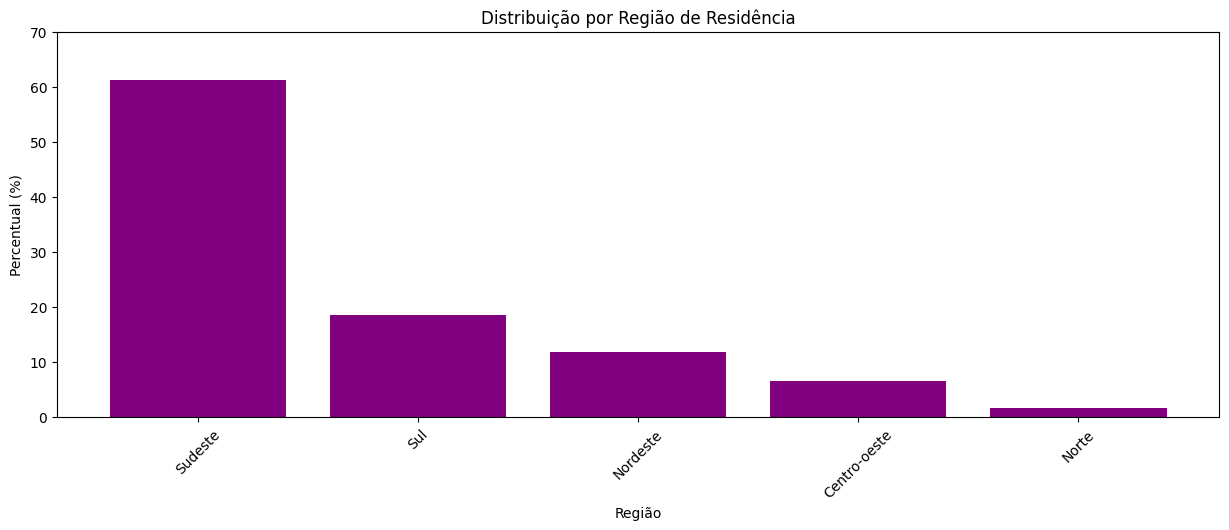

In [36]:
# Criar o gráfico de barras
plt.figure(figsize=(15, 5))
plt.bar(regiao_dist.index, regiao_dist.values, color='purple')
plt.title('Distribuição por Região de Residência')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.ylim(0, 70)  # Ajustar o limite do eixo y para dar mais clareza aos dados
plt.show()

In [37]:
# Calcula a contagem por estado
uf_counts = dados_demograficos['uf onde mora'].value_counts().reset_index()
uf_counts.columns = ['UF', 'count']  # Renomeia a coluna para 'UF'

# Cria o mapa de cloropleto com Plotly Express
fig = px.choropleth(
    uf_counts,
    geojson="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson",
    locations='UF',  # Usa 'UF' para fazer o match com o GeoJSON
    featureidkey='properties.sigla',
    color='count',
    color_continuous_scale='Agsunset',
    range_color=[uf_counts['count'].min(), uf_counts['count'].max()],  # Definir limites de cor
    scope='south america',
    title='Quantidade de profissionais de dados por UF'
)

# Ajusta as dimensões do gráfico
fig.update_layout(
    width=1200,  # Largura do gráfico em pixels
    height=800   # Altura do gráfico em pixels
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [38]:
# Distribuição de grau de escolaridade
escolaridade_dist = dados_demograficos['Nivel de Ensino'].value_counts(normalize=True) * 100
print("Distribuição de Grau de Escolaridade:")
for escolaridade, percentual in escolaridade_dist.items():
    print(f"{escolaridade}: {percentual:.2f}%")



Distribuição de Grau de Escolaridade:
Pós-graduação: 34.35%
Graduação/Bacharelado: 33.97%
Estudante de Graduação: 12.81%
Mestrado: 12.77%
Doutorado ou Phd: 3.97%
Não tenho graduação formal: 1.98%
Prefiro não informar: 0.15%


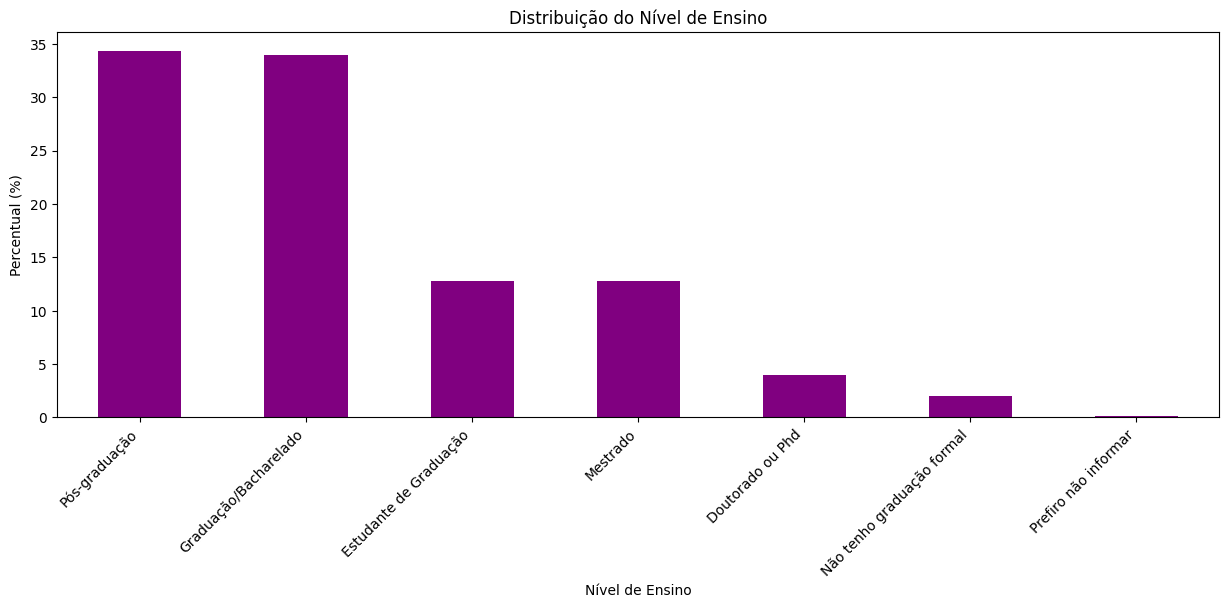

In [39]:
  # Criar o gráfico de barras

plt.figure(figsize=(15, 5))
escolaridade_dist.plot(kind='bar', color='purple')
plt.title('Distribuição do Nível de Ensino')
plt.xlabel('Nível de Ensino')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
# Contagem de valores da área de formação e normalização para percentual
formacao_dist = dados_demograficos['Área de Formação'].value_counts(normalize=True) * 100
print("Distribuição da Área de Formação:")
for formacao, percentual in formacao_dist.items():
    print(f"{formacao}: {percentual:.2f}%")

Distribuição da Área de Formação:
Computação / Engenharia de Software / Sistemas de Informação/ TI: 41.58%
Outras Engenharias: 20.81%
Economia/ Administração / Contabilidade / Finanças/ Negócios: 15.71%
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais: 7.26%
Outra opção: 5.54%
Química / Física: 2.57%
Marketing / Publicidade / Comunicação / Jornalismo: 2.51%
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde: 2.39%
Ciências Sociais: 1.62%


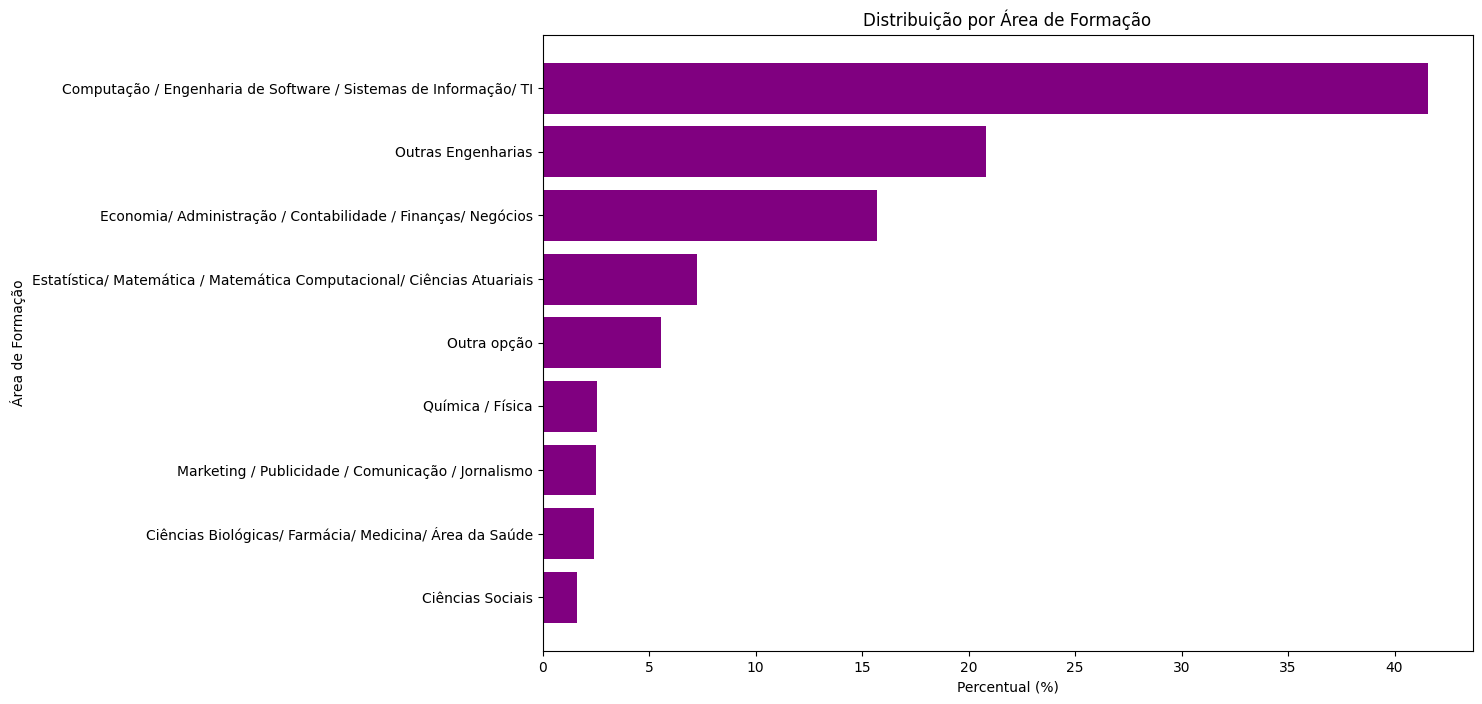

In [41]:
# Criar o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
plt.barh(formacao_dist.index, formacao_dist.values, color='purple')
plt.title('Distribuição por Área de Formação')
plt.xlabel('Percentual (%)')
plt.ylabel('Área de Formação')
plt.gca().invert_yaxis()  # Inverter o eixo Y para mostrar a maior porcentagem no topo
plt.show()

In [42]:
# Tabela cruzada entre Nivel_Ensino e Gênero com percentuais
tabela_cruzada = pd.crosstab(dados_demograficos['Nivel de Ensino'], dados_demograficos['Genero'], normalize='index') * 100

# Resetando o índice para transformar a tabela cruzada em um DataFrame tabular
tabela_cruzada_reset = tabela_cruzada.reset_index()

# Exibindo a tabela cruzada de forma tabular
print("Tabela Cruzada entre Nivel_Ensino e Gênero:")
print(tabela_cruzada_reset.to_string(index=False, float_format="{:.2f}%".format))

Tabela Cruzada entre Nivel_Ensino e Gênero:
           Nivel de Ensino  Feminino  Masculino  Outro  Prefiro não informar
          Doutorado ou Phd    34.29%     65.24%  0.00%                 0.48%
    Estudante de Graduação    19.47%     79.94%  0.44%                 0.15%
     Graduação/Bacharelado    22.86%     76.53%  0.28%                 0.33%
                  Mestrado    28.99%     70.41%  0.00%                 0.59%
Não tenho graduação formal    19.05%     80.95%  0.00%                 0.00%
      Prefiro não informar     0.00%    100.00%  0.00%                 0.00%
             Pós-graduação    25.41%     74.31%  0.06%                 0.22%


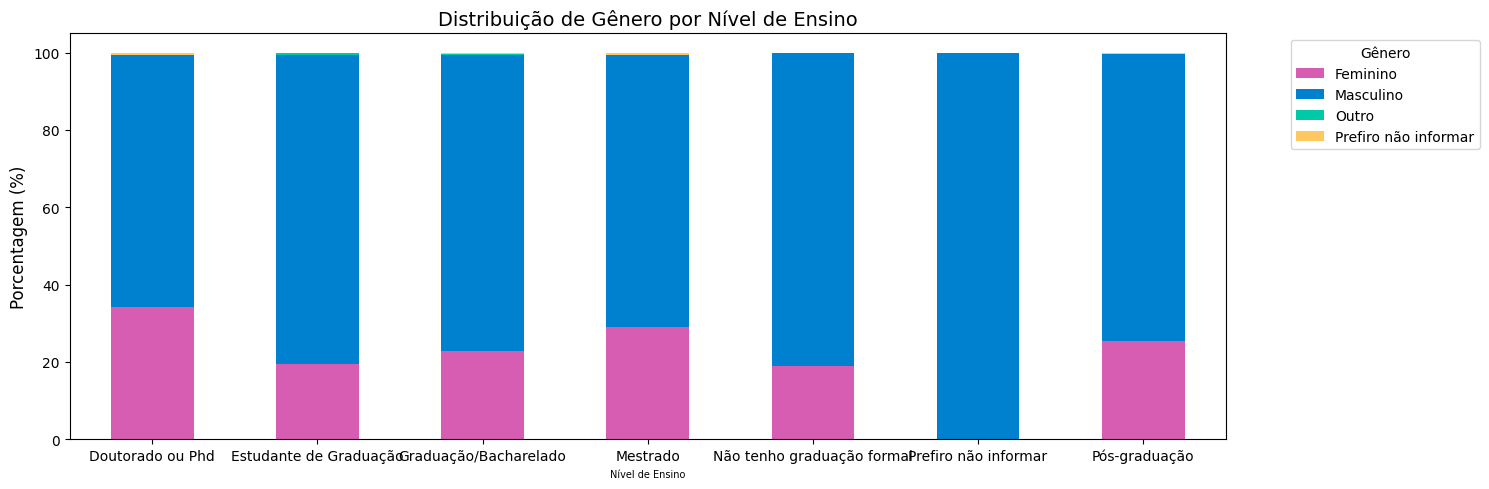

In [43]:
# Criando o gráfico de barras empilhadas
ax = tabela_cruzada.plot(kind='bar', rot=0, figsize=(15, 5), stacked=True, color=['#D65Db1', '#0081CF','#00C9A7','#FFC75F'])
plt.title('Distribuição de Gênero por Nível de Ensino', fontsize=14)
plt.xlabel('Nível de Ensino', fontsize=7)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
# Tabela cruzada entre Nivel_Ensino e Regiao_Mora com percentuais
tabela_cruzada2 = pd.crosstab(dados_demograficos['Nivel de Ensino'], dados_demograficos['Regiao onde mora'], normalize='index') * 100

# Exibindo a tabela cruzada de forma tabular
print("Tabela Cruzada entre Nivel_Ensino e Região com Percentuais:")
print(tabela_cruzada2.to_string(float_format="{:.2f}%".format))

Tabela Cruzada entre Nivel_Ensino e Região com Percentuais:
Regiao onde mora            Centro-oeste  Nordeste  Norte  Sudeste    Sul
Nivel de Ensino                                                          
Doutorado ou Phd                   7.80%    15.12%  1.46%   55.61% 20.00%
Estudante de Graduação             7.11%    18.37%  1.33%   54.22% 18.96%
Graduação/Bacharelado              6.06%    10.31%  1.47%   65.63% 16.53%
Mestrado                           6.48%    14.53%  1.74%   57.19% 20.06%
Não tenho graduação formal         6.00%    12.00%  7.00%   58.00% 17.00%
Prefiro não informar              14.29%    14.29%  0.00%   57.14% 14.29%
Pós-graduação                      7.01%     9.31%  1.51%   62.25% 19.91%


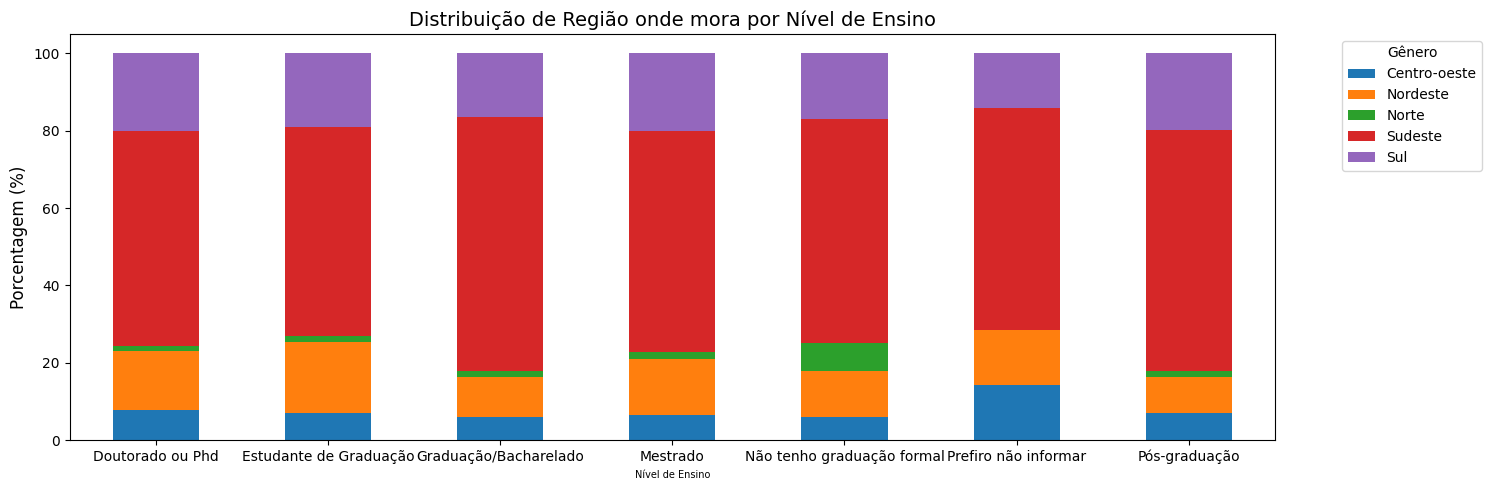

In [45]:
# Criando o gráfico de barras empilhadas
ax = tabela_cruzada2.plot(kind='bar', rot=0, figsize=(15, 5), stacked=True)
plt.title('Distribuição de Região onde mora por Nível de Ensino', fontsize=14)
plt.xlabel('Nível de Ensino', fontsize=7)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
# Tabela cruzada entre Nivel_Ensino e Cor_Raca_Etnia com percentuais
tabela_cruzada3 = pd.crosstab(dados_demograficos['Nivel de Ensino'], dados_demograficos['Cor/raca/etnia'], normalize='index') * 100

# Exibindo a tabela cruzada de forma tabular
print("Tabela Cruzada entre Nivel_Ensino e Cor/Raca/Etnia com Percentuais:")
print(tabela_cruzada3.to_string(float_format="{:.2f}%".format))

Tabela Cruzada entre Nivel_Ensino e Cor/Raca/Etnia com Percentuais:
Cor/raca/etnia              Amarela  Branca  Indígena  Outra  Parda  Prefiro não informar  Preta
Nivel de Ensino                                                                                 
Doutorado ou Phd              2.38%  71.43%     0.48%  0.00% 21.43%                 0.48%  3.81%
Estudante de Graduação        2.65%  58.41%     0.29%  0.29% 26.99%                 0.59% 10.77%
Graduação/Bacharelado         2.89%  63.63%     0.22%  0.39% 24.81%                 0.72%  7.34%
Mestrado                      2.96%  69.38%     0.00%  0.59% 20.56%                 1.04%  5.47%
Não tenho graduação formal    0.95%  60.95%     0.95%  0.95% 26.67%                 0.00%  9.52%
Prefiro não informar          0.00%  50.00%     0.00%  0.00% 37.50%                 0.00% 12.50%
Pós-graduação                 2.81%  65.29%     0.22%  0.22% 24.04%                 0.50%  6.93%


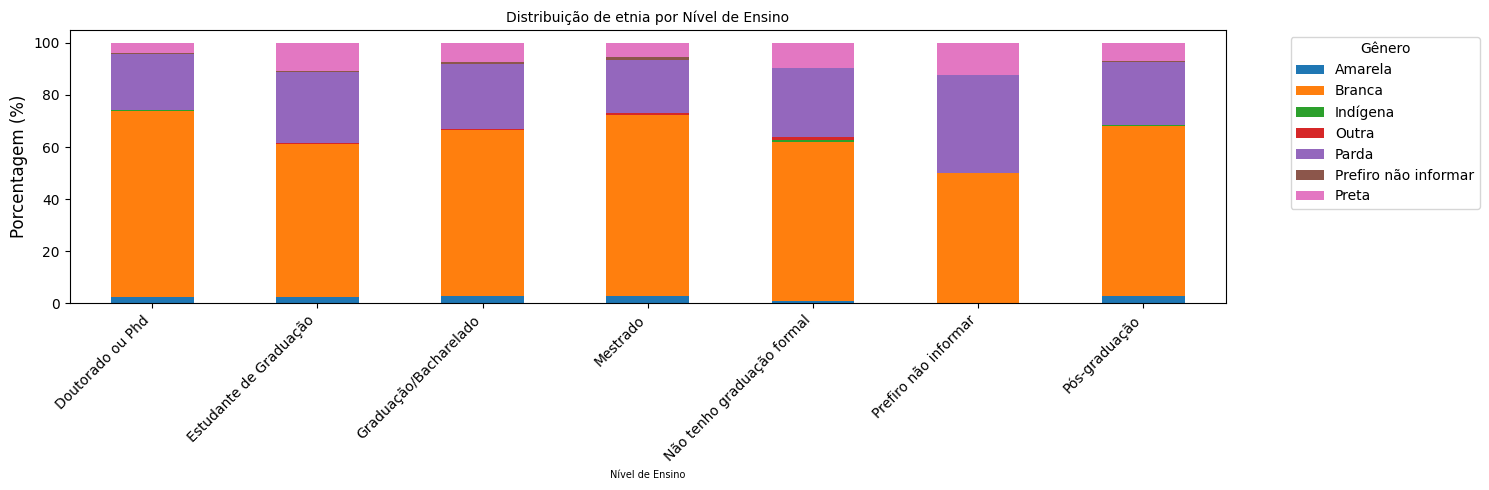

In [47]:
# Criando o gráfico de barras empilhadas
ax = tabela_cruzada3.plot(kind='bar', rot=0, figsize=(15, 5), stacked=True)
plt.title('Distribuição de etnia por Nível de Ensino', fontsize=10)
plt.xlabel('Nível de Ensino', fontsize=7)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 🎲 Dados sobre Carreiras

In [48]:
# Criando a coluna "motivos que o tenham prejudicado"
dados_carreira['Motivos da insatisfação com a empresa atual?'] = ''  # Inicializa a coluna com string vazia

# Preenche a coluna 'motivos que o tenham prejudicado' com base nas respostas das outras colunas
for index, row in dados_carreira.iterrows():
    motivos = []
    if row['Falta de oportunidade de crescimento no emprego atual'] == 1:
        motivos.append('Falta de oportunidade de crescimento no emprego atual')
    if row['Salário atual não corresponde ao mercado'] == 1:
        motivos.append('Salário atual não corresponde ao mercado')
    if row['Não tenho uma boa relação com meu líder/gestor'] == 1:
        motivos.append('Não tenho uma boa relação com meu líder/gestor')
    if row['Gostaria de trabalhar em em outra área de atuação'] == 1:
        motivos.append('Gostaria de trabalhar em em outra área de atuação')
    if row['Gostaria de receber mais benefícios'] == 1:
        motivos.append('Gostaria de receber mais benefícios')
    if row['O clima de trabalho/ambiente não é bom'] == 1:
        motivos.append('O clima de trabalho/ambiente não é bom')
    if row['Falta de maturidade analítica na empresa'] == 1:
        motivos.append('Falta de maturidade analítica na empresa')

    dados_carreira.loc[index, 'Motivos da insatisfação com a empresa atual?'] = ', '.join(motivos)


In [49]:
dados_carreira['Motivos da insatisfação com a empresa atual?'].value_counts()

Motivos da insatisfação com a empresa atual?
                                                                                                                                                            4024
Falta de oportunidade de crescimento no emprego atual                                                                                                        112
Salário atual não corresponde ao mercado                                                                                                                     101
Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa                    100
Falta de maturidade analítica na empresa                                                                                                                      98
Gostaria de trabalhar em em outra área de atuação                                                                                                             80
Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Gostaria de receber mais benefícios                          65
Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Gostaria de trabalhar em em outra área de atuação            58
Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado                                                               54
Falta de oportunidade de crescimento no emprego atual, Falta de maturidade analítica na empresa                                                               42
O clima de trabalho/ambiente não é bom                                                                                                                        39
Salário atual não corresponde ao mercado, Gostaria de receber mais benefícios, Falta de maturidade analítica na empresa                                       32
Falta de oportunidade de crescimento no emprego atual, Gostaria de trabalhar em em outra área de atuação, Falta de maturidade analítica na empresa            32
Salário atual não corresponde ao mercado, Gostaria de receber mais benefícios                                                                                 31
Falta de oportunidade de crescimento no emprego atual, Gostaria de trabalhar em em outra área de atuação                                                      31
Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa                                                                            26
O clima de trabalho/ambiente não é bom, Falta de maturidade analítica na empresa                                                                              24
Falta de oportunidade de crescimento no emprego atual, O clima de trabalho/ambiente não é bom, Falta de maturidade analítica na empresa                       22
Falta de oportunidade de crescimento no emprego atual, Gostaria de receber mais benefícios, Falta de maturidade analítica na empresa                          20
Salário atual não corresponde ao mercado, Gostaria de trabalhar em em outra área de atuação                                                                   16
Falta de oportunidade de crescimento no emprego atual, Não tenho uma boa relação com meu líder/gestor, Falta de maturidade analítica na empresa               15
Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, O clima de trabalho/ambiente não é bom                       15
Gostaria de trabalhar em em outra área de atuação, Falta de maturidade analítica na empresa                                                                   13
Salário atual não corresponde ao mercado, O clima de trabalho/ambiente não é bom, Falta de maturidade analítica na empresa                                    13
Falta de oportunidade de crescimento no emprego atual, Gostaria de trabalhar em em outra ár

In [50]:
# Criando a coluna "Principais critérios no momento de decidir onde trabalhar"
dados_carreira['Principais critérios no momento de decidir onde trabalhar'] = ''  # Inicializa a coluna com string vazia

# Preenche a coluna 'Principais critérios no momento de decidir onde trabalhar' com base nas respostas das outras colunas
for index, row in dados_carreira.iterrows():
    motivos = []
    if row['Remuneração/Salário'] == 1:
        motivos.append('Remuneração/Salário')
    if row['Benefícios'] == 1:
        motivos.append('Benefícios')
    if row['Propósito do trabalho e da empresa'] == 1:
        motivos.append('Propósito do trabalho e da empresa')
    if row['Flexibilidade de trabalho remoto'] == 1:
        motivos.append('Flexibilidade de trabalho remoto')
    if row['Ambiente e clima de trabalho'] == 1:
        motivos.append('Ambiente e clima de trabalho')
    if row['Oportunidade de aprendizado e trabalhar com referências na área'] == 1:
        motivos.append('Oportunidade de aprendizado e trabalhar com referências na área')
    if row['Plano de carreira e oportunidades de crescimento profissional'] == 1:
        motivos.append('Plano de carreira e oportunidades de crescimento profissional')
    if row['Maturidade da empresa em termos de tecnologia e dados'] == 1:
        motivos.append('Maturidade da empresa em termos de tecnologia e dados')
    if row['Qualidade dos gestores e líderes'] == 1:
        motivos.append('Qualidade dos gestores e líderes')
    if row['Reputação que a empresa tem no mercado'] == 1:
        motivos.append('Reputação que a empresa tem no mercado')

    dados_carreira.loc[index, 'Principais critérios no momento de decidir onde trabalhar'] = ', '.join(motivos)

In [51]:
dados_carreira.columns.tolist()

['id',
 'Qual sua situação atual de trabalho?',
 'Setor',
 'Numero de Funcionarios',
 'Gestor?',
 'Cargo como Gestor',
 'Cargo Atual',
 'Nivel',
 'Faixa salarial',
 'Quanto tempo de experiência na área de dados você tem?',
 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
 'Você está satisfeito na sua empresa atual?',
 'Qual o principal motivo da sua insatisfação com a empresa atual?',
 'Falta de oportunidade de crescimento no emprego atual',
 'Salário atual não corresponde ao mercado',
 'Não tenho uma boa relação com meu líder/gestor',
 'Gostaria de trabalhar em em outra área de atuação',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom',
 'Falta de maturidade analítica na empresa',
 'Você participou de entrevistas de emprego nos últimos 6 meses?',
 'Você pretende mudar de emprego nos próximos 6 meses?',
 'Quais os principais critérios que você leva em consideração no momento de

In [52]:
dados_carreira.head()

id Qual sua situação atual de trabalho?  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g                      Empregado (CLT)   
1  0026aa3fwd78u0026asg7456tfkjg2cs     Empreendedor ou Empregado (CNPJ)   
2  00r21rb9pusd1b0v7ew00r21rw3dy69w                      Empregado (CLT)   
3  00urm3jf2cek12w6ygue00urm3jzd17j   Desempregado, buscando recolocação   
4  00v0az4g792svil00vn6y1kfm9hq8vy9     Empreendedor ou Empregado (CNPJ)   

                Setor Numero de Funcionarios  Gestor? Cargo como Gestor  \
0  Finanças ou Bancos         Acima de 3.000      0.0               NaN   
1  Finanças ou Bancos           de 101 a 500      0.0               NaN   
2  Finanças ou Bancos         Acima de 3.000      0.0               NaN   
3                 NaN                    NaN      NaN               NaN   
4         Outra Opção           de 101 a 500      0.0               NaN   

                         Cargo Atual   Nivel  \
0  Cientista de Dados/Data Scientist  Sênior   
1          Analista de BI/BI Analyst   Pleno   
2     Analista de Dados/Data Analyst  Júnior   
3                                NaN     NaN   
4     Analista de Dados/Data Analyst  Júnior   

                     Faixa salarial  \
0  de R$ 12.001/mês a R$ 16.000/mês   
1    de R$ 6.001/mês a R$ 8.000/mês   
2    de R$ 6.001/mês a R$ 8.000/mês   
3                               NaN   
4    de R$ 4.001/mês a R$ 6.000/mês   

  Quanto tempo de experiência na área de dados você tem?  ...  \
0                                      de 3 a 4 anos      ...   
1                                      de 3 a 4 anos      ...   
2                                      de 1 a 2 anos      ...   
3                                                NaN      ...   
4                                     Menos de 1 ano      ...   

  Plano de carreira e oportunidades de crescimento profissional  \
0                                                0.0              
1                                                0.0              
2                                                0.0              
3                                                NaN              
4                                                1.0              

   Maturidade da empresa em termos de tecnologia e dados  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                NaN       
4                                                0.0       

  Qualidade dos gestores e líderes  Reputação que a empresa tem no mercado  \
0                              0.0                                     0.0   
1                              0.0                                     0.0   
2                              0.0                                     0.0   
3                              NaN                                     NaN   
4                              0.0                                     0.0   

       Empresa que trabaha passou por layoff em 2023  \
0  Não ocorreram layoffs/demissões em massa na em...   
1  Não ocorreram layoffs/demissões em massa na em...   
2  Sim, ocorreram layoffs/demissões em massa na e...   
3                                                NaN   
4  Não ocorreram layoffs/demissões em massa na em...   

            Atualmente qual a sua forma de trabalho?  \
0  Modelo híbrido flexível (o funcionário tem lib...   
1                                 Modelo 100% remoto   
2  Modelo híbrido flexível (o funcionário tem lib...   
3                                                NaN   
4                                 Modelo 100% remoto   

   Qual a forma de trabalho ideal para você?  \
0                         Modelo 100% remoto   
1                         Modelo 100% remoto   
2                         Modelo 100% remoto   
3                                        NaN   
4                         Modelo 100% remoto   

   Caso sua em

In [53]:
# Analise Nivel
contagem_nivel = dados_carreira['Nivel'].value_counts()
porcentagem_nivel = dados_carreira['Nivel'].value_counts(normalize=True) * 100

df_nivel = pd.DataFrame({'Contagem': contagem_nivel, 'Porcentagem (%)': porcentagem_nivel.round(2)})
print(df_nivel)

        Contagem  Porcentagem (%)
Nivel                            
Sênior      1419            36.79
Pleno       1392            36.09
Júnior      1046            27.12


In [54]:
# Criando nova coluna "NOVO NIVEL" para diferenciar gestores de não gestores
def preencher_nivel(gestor, nivel):
    if gestor == 1:
        return "Gestor"
    else:
        return nivel

dados_carreira["NOVO NIVEL"] = dados_carreira.apply(lambda x: preencher_nivel(x["Gestor?"], x["Nivel"]), axis=1)

contagem_nivel = dados_carreira['NOVO NIVEL'].value_counts()
porcentagem_nivel = dados_carreira['NOVO NIVEL'].value_counts(normalize=True) * 100

df_nivel = pd.DataFrame({'Contagem': contagem_nivel, 'Porcentagem (%)': porcentagem_nivel.round(2)})
print(df_nivel)

            Contagem  Porcentagem (%)
NOVO NIVEL                           
Sênior          1419            29.85
Pleno           1392            29.29
Júnior          1046            22.01
Gestor           896            18.85


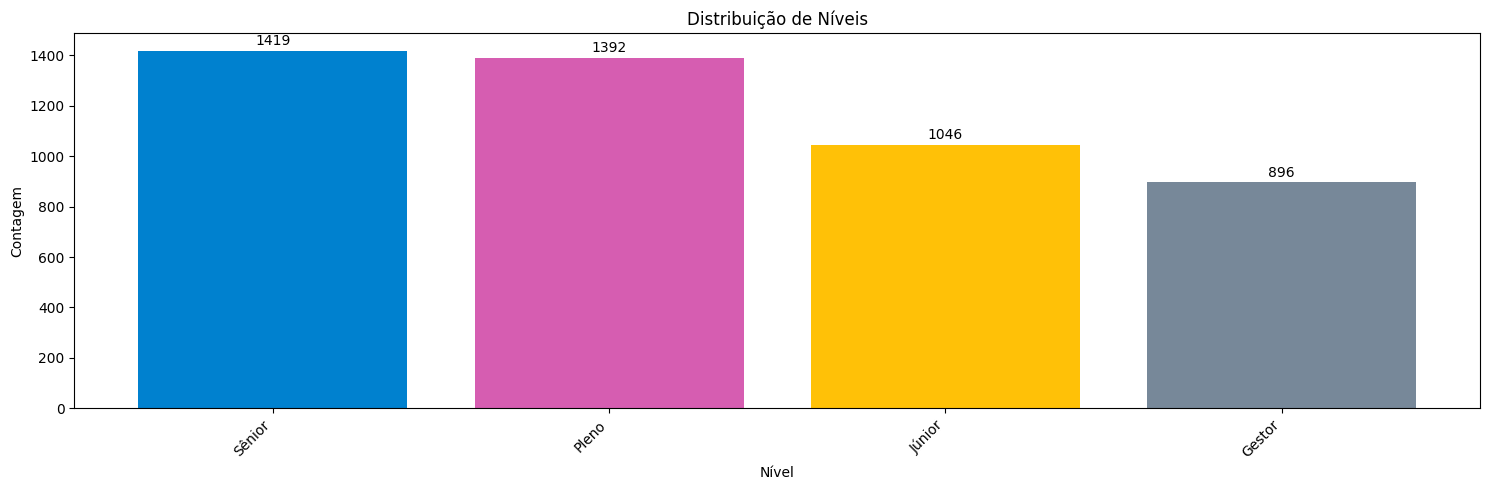

In [55]:
# Criando o gráfico de barras
plt.figure(figsize=(15, 5))  # Define o tamanho do gráfico
plt.bar(df_nivel.index, df_nivel['Contagem'], color=['#0081CF', '#D65Db1', '#FFC107', '#778899'])
plt.xlabel('Nível')
plt.ylabel('Contagem')
plt.title('Distribuição de Níveis')
plt.xticks(rotation=45, ha='right')

# Adiciona a quantidade no topo de cada barra
for i, v in enumerate(df_nivel['Contagem']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()  # Ajuste automático do layout
plt.show()

In [56]:
# Analise Faixa salarial
contagem_fsalarial = dados_carreira['Faixa salarial'].value_counts()
porcentagem_fsalarial = dados_carreira['Faixa salarial'].value_counts(normalize=True) * 100

df_fsalarial = pd.DataFrame({'Contagem': contagem_fsalarial, 'Porcentagem (%)': porcentagem_fsalarial.round(2)})
print(df_fsalarial)

                                  Contagem  Porcentagem (%)
Faixa salarial                                             
de R$ 8.001/mês a R$ 12.000/mês       1026            21.59
de R$ 4.001/mês a R$ 6.000/mês         745            15.67
de R$ 12.001/mês a R$ 16.000/mês       650            13.68
de R$ 6.001/mês a R$ 8.000/mês         637            13.40
de R$ 3.001/mês a R$ 4.000/mês         352             7.41
de R$ 16.001/mês a R$ 20.000/mês       328             6.90
de R$ 2.001/mês a R$ 3.000/mês         288             6.06
de R$ 1.001/mês a R$ 2.000/mês         215             4.52
de R$ 20.001/mês a R$ 25.000/mês       195             4.10
de R$ 25.001/mês a R$ 30.000/mês       128             2.69
de R$ 30.001/mês a R$ 40.000/mês        86             1.81
Acima de R$ 40.001/mês                  72             1.51
Menos de R$ 1.000/mês                   30             0.63
de R$ 101/mês a R$ 2.000/mês             1             0.02


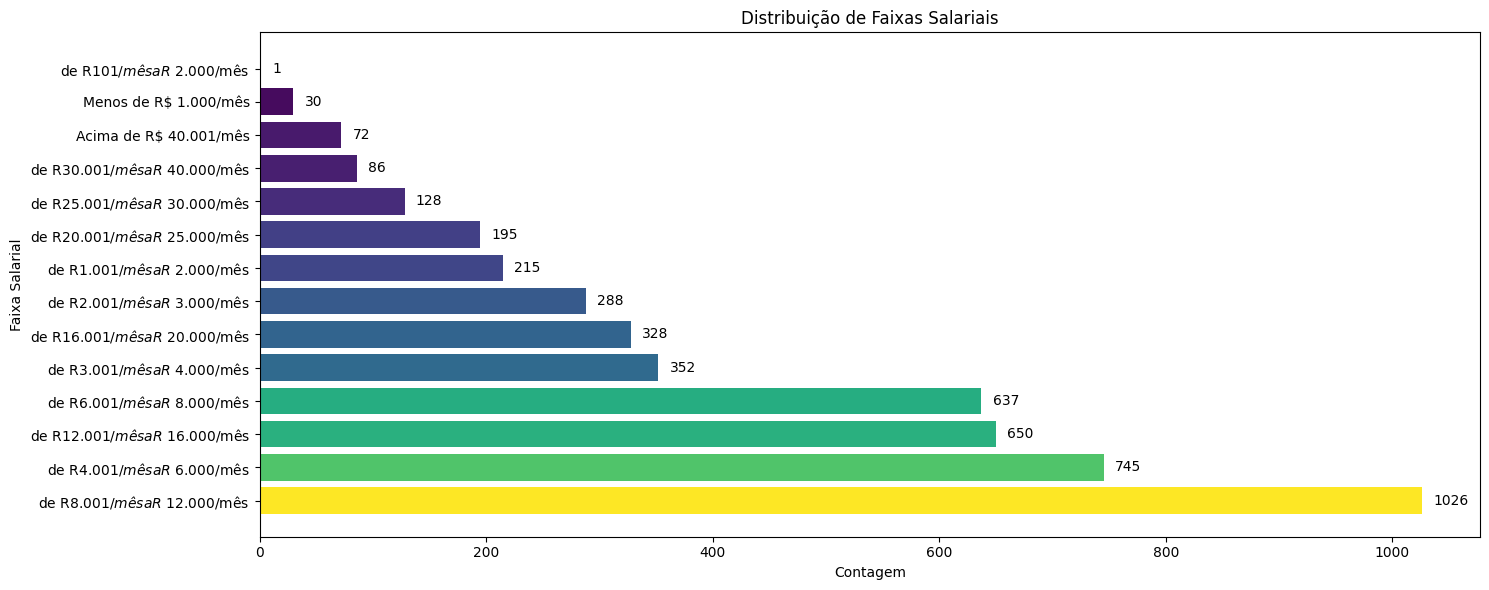

In [58]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(15, 6))
plt.barh(df_fsalarial.index, df_fsalarial['Contagem'], color=cm.viridis(df_fsalarial['Contagem'] / df_fsalarial['Contagem'].max()))  # Aplica colormap 'viridis' com tons diferentes
plt.xlabel('Contagem')
plt.ylabel('Faixa Salarial')
plt.title('Distribuição de Faixas Salariais')
plt.tight_layout()

# Adiciona a quantidade no lado direito de cada barra
for i, v in enumerate(df_fsalarial['Contagem']):
    plt.text(v + 10, i, str(v), ha='left', va='center')

plt.show()

In [59]:
dados_carreira.columns.tolist()

['id',
 'Qual sua situação atual de trabalho?',
 'Setor',
 'Numero de Funcionarios',
 'Gestor?',
 'Cargo como Gestor',
 'Cargo Atual',
 'Nivel',
 'Faixa salarial',
 'Quanto tempo de experiência na área de dados você tem?',
 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
 'Você está satisfeito na sua empresa atual?',
 'Qual o principal motivo da sua insatisfação com a empresa atual?',
 'Falta de oportunidade de crescimento no emprego atual',
 'Salário atual não corresponde ao mercado',
 'Não tenho uma boa relação com meu líder/gestor',
 'Gostaria de trabalhar em em outra área de atuação',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom',
 'Falta de maturidade analítica na empresa',
 'Você participou de entrevistas de emprego nos últimos 6 meses?',
 'Você pretende mudar de emprego nos próximos 6 meses?',
 'Quais os principais critérios que você leva em consideração no momento de

In [60]:
# Analise Cargo Atual
contagem_carg_atual = dados_carreira['Cargo Atual'].value_counts()
porcentagem_carg_atual = dados_carreira['Cargo Atual'].value_counts(normalize=True) * 100

df_carg_atual = pd.DataFrame({'Contagem': contagem_carg_atual, 'Porcentagem (%)': porcentagem_carg_atual.round(2)})
print(df_carg_atual)

                                                    Contagem  Porcentagem (%)
Cargo Atual                                                                  
Analista de Dados/Data Analyst                           907            23.52
Cientista de Dados/Data Scientist                        687            17.81
Engenheiro de Dados/Arquiteto de Dados/Data Eng...       684            17.73
Analista de BI/BI Analyst                                506            13.12
Outra Opção                                              262             6.79
Analista de Negócios/Business Analyst                    195             5.06
Analytics Engineer                                       139             3.60
Desenvolvedor/ Engenheiro de Software/ Analista...       105             2.72
Data Product Manager/ Product Manager (PM/APM/D...        81             2.10
Engenheiro de Machine Learning/ML Engineer/AI E...        75             1.94
Analista de Suporte/Analista Técnico                      72    

In [61]:
#Base para cada faixa salarial
# Para a faixa salarial 'de R$ 8.001/mês a R$ 12.000/mês'
faixa_1 = dados_carreira[dados_carreira['Faixa salarial'] == 'de R$ 8.001/mês a R$ 12.000/mês']
distrib_faixa_1 = faixa_1['Cargo Atual'].value_counts(normalize=True) * 100
print("Distribuição dos cargos na faixa 'de R$ 8.001/mês a R$ 12.000/mês':")
for cargo, percentual in distrib_faixa_1.items():
    print(f"{cargo}: {percentual:.2f}%")

# Para a faixa salarial 'de R$ 4.001/mês a R$ 6.000/mês'
faixa_2 = dados_carreira[dados_carreira['Faixa salarial'] == 'de R$ 4.001/mês a R$ 6.000/mês']
distrib_faixa_2 = faixa_2['Cargo Atual'].value_counts(normalize=True) * 100
print("\nDistribuição dos cargos na faixa 'de R$ 4.001/mês a R$ 6.000/mês':")
for cargo, percentual in distrib_faixa_2.items():
    print(f"{cargo}: {percentual:.2f}%")

Distribuição dos cargos na faixa 'de R$ 8.001/mês a R$ 12.000/mês':
Cientista de Dados/Data Scientist: 23.11%
Analista de Dados/Data Analyst: 22.22%
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect: 21.00%
Analista de BI/BI Analyst: 9.33%
Analista de Negócios/Business Analyst: 5.00%
Analytics Engineer: 4.22%
Outra Opção: 3.11%
Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO): 3.00%
Engenheiro de Machine Learning/ML Engineer/AI Engineer: 2.44%
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas: 1.89%
DBA/Administrador de Banco de Dados: 1.00%
Outras Engenharias (não inclui dev): 0.89%
Analista de Suporte/Analista Técnico: 0.78%
Analista de Inteligência de Mercado/Market Intelligence: 0.78%
Professor/Pesquisador: 0.67%
Estatístico: 0.33%
Economista: 0.22%

Distribuição dos cargos na faixa 'de R$ 4.001/mês a R$ 6.000/mês':
Analista de Dados/Data Analyst: 31.44%
Analista de BI/BI Analyst: 19.77%
Cientista de Dados/Data Scientist: 12.66%
Engenheiro de Da

In [62]:
tabela_frequencia3 = pd.crosstab(dados_carreira['Faixa salarial'], dados_carreira['Cargo Atual'])
print(tabela_frequencia3)

Cargo Atual                       Analista de BI/BI Analyst  \
Faixa salarial                                                
Acima de R$ 40.001/mês                                    1   
Menos de R$ 1.000/mês                                     4   
de R$ 1.001/mês a R$ 2.000/mês                           47   
de R$ 101/mês a R$ 2.000/mês                              0   
de R$ 12.001/mês a R$ 16.000/mês                         20   
de R$ 16.001/mês a R$ 20.000/mês                          3   
de R$ 2.001/mês a R$ 3.000/mês                           48   
de R$ 20.001/mês a R$ 25.000/mês                          4   
de R$ 25.001/mês a R$ 30.000/mês                          3   
de R$ 3.001/mês a R$ 4.000/mês                           61   
de R$ 30.001/mês a R$ 40.000/mês                          1   
de R$ 4.001/mês a R$ 6.000/mês                          139   
de R$ 6.001/mês a R$ 8.000/mês                           91   
de R$ 8.001/mês a R$ 12.000/mês                        

In [63]:
# Para a faixa salarial 'de R$ 8.001/mês a R$ 12.000/mês'
faixa_1 = dados_carreira[dados_carreira['Faixa salarial'] == 'de R$ 8.001/mês a R$ 12.000/mês']
distrib_nivel_faixa_1 = faixa_1['Nivel'].value_counts(normalize=True) * 100

print("Distribuição dos níveis na faixa 'de R$ 8.001/mês a R$ 12.000/mês':")
for nivel, percentual in distrib_nivel_faixa_1.items():
    print(f"{nivel}: {percentual:.2f}%")

# Para a faixa salarial 'de R$ 4.001/mês a R$ 6.000/mês'
faixa_2 = dados_carreira[dados_carreira['Faixa salarial'] == 'de R$ 4.001/mês a R$ 6.000/mês']
distrib_nivel_faixa_2 = faixa_2['Nivel'].value_counts(normalize=True) * 100

print("\nDistribuição dos níveis na faixa 'de R$ 4.001/mês a R$ 6.000/mês':")
for nivel, percentual in distrib_nivel_faixa_2.items():
    print(f"{nivel}: {percentual:.2f}%")


Distribuição dos níveis na faixa 'de R$ 8.001/mês a R$ 12.000/mês':
Sênior: 56.22%
Pleno: 39.00%
Júnior: 4.78%

Distribuição dos níveis na faixa 'de R$ 4.001/mês a R$ 6.000/mês':
Pleno: 50.64%
Júnior: 41.82%
Sênior: 7.54%


In [64]:
# Nível de satisfação em %
percentual_satisfacao = dados_carreira['Você está satisfeito na sua empresa atual?'].value_counts(normalize=True) * 100

percentual_total_satisfeitos = percentual_satisfacao.get(1.0, 0)  # Usa 0 como valor padrão se não encontrar 1.0
percentual_total_insatisfeitos = percentual_satisfacao.get(0.0, 0)  # Usa 0 como valor padrão se não encontrar 0.0

print(f"Total de profissionais satisfeitos: {percentual_total_satisfeitos:.2f}%")
print(f"Total de profissionais insatisfeitos: {percentual_total_insatisfeitos:.2f}%")

Total de profissionais satisfeitos: 71.95%
Total de profissionais insatisfeitos: 28.05%


In [65]:
#contabilizar o total de pessoas satisfeitas e insatisfeitas
total_satisfeitos = dados_carreira[df_P2['Você está satisfeito na sua empresa atual?'] != 0.0].shape[0]
total_insatisfeitos = dados_carreira[df_P2['Você está satisfeito na sua empresa atual?'] == 0.0].shape[0]

print(f'Total de pessoas satisfeitas: {total_satisfeitos}')
print(f'Total de pessoas insatisfeitas: {total_insatisfeitos}')

Total de pessoas satisfeitas: 3960
Total de pessoas insatisfeitas: 1333


In [66]:
#contabilizar motivos de insatisfação
motivo_insatisfacao = [
    'Falta de oportunidade de crescimento no emprego atual',
    'Salário atual não corresponde ao mercado',
    'Não tenho uma boa relação com meu líder/gestor',
    'Gostaria de trabalhar em em outra área de atuação',
    'Gostaria de receber mais benefícios',
    'O clima de trabalho/ambiente não é bom',
    'Falta de maturidade analítica na empresa'
]

for motivo in motivo_insatisfacao:
    dados_carreira[motivo] = dados_carreira['Motivos da insatisfação com a empresa atual?'].apply(lambda x: 1 if motivo in x else 0)

contagem_motivos = dados_carreira[motivo_insatisfacao].sum()

contagem_motivos_df = pd.DataFrame({
    'Motivo': contagem_motivos.index,
    'Quantidade': contagem_motivos.values
})

print(contagem_motivos_df)

                                              Motivo  Quantidade
0  Falta de oportunidade de crescimento no empreg...         649
1           Salário atual não corresponde ao mercado         563
2     Não tenho uma boa relação com meu líder/gestor         101
3  Gostaria de trabalhar em em outra área de atuação         328
4                Gostaria de receber mais benefícios         246
5             O clima de trabalho/ambiente não é bom         210
6           Falta de maturidade analítica na empresa         497


In [67]:
# Lista de motivos de insatisfação
motivos_insatisfacao = [
    'Falta de oportunidade de crescimento no emprego atual',
    'Salário atual não corresponde ao mercado',
    'Não tenho uma boa relação com meu líder/gestor',
    'Gostaria de trabalhar em em outra área de atuação',
    'Gostaria de receber mais benefícios',
    'O clima de trabalho/ambiente não é bom',
    'Falta de maturidade analítica na empresa'
]

# Calcula a porcentagem para cada motivo de insatisfação
for motivo in motivos_insatisfacao:
    # Conta a proporção de respostas "1" (insatisfeito) para cada motivo
    percentual_motivo = dados_carreira[motivo].value_counts(normalize=True).get(1.0, 0) * 100
    print(f"{motivo}: {percentual_motivo:.2f}%")

Falta de oportunidade de crescimento no emprego atual: 12.26%
Salário atual não corresponde ao mercado: 10.64%
Não tenho uma boa relação com meu líder/gestor: 1.91%
Gostaria de trabalhar em em outra área de atuação: 6.20%
Gostaria de receber mais benefícios: 4.65%
O clima de trabalho/ambiente não é bom: 3.97%
Falta de maturidade analítica na empresa: 9.39%


In [68]:
def esta_satisfeito(row):

    if row["Você está satisfeito na sua empresa atual?"] == 1.0:
        return ("Satisfeito")
    elif row["Você está satisfeito na sua empresa atual?"] == 0.0:
        return ("Insatisfeito")
    else:
        return "Indiferente"

dados_carreira["Satisfeito?"] = dados_carreira.apply(esta_satisfeito, axis=1)

In [69]:
contagem_satisf = dados_carreira['Satisfeito?'].value_counts()
porcentagem_satisf = dados_carreira['Satisfeito?'].value_counts(normalize=True) * 100

df_satisf = pd.DataFrame({'Contagem': contagem_satisf, 'Porcentagem (%)': porcentagem_satisf.round(2)})
print(df_satisf)

              Contagem  Porcentagem (%)
Satisfeito?                            
Satisfeito        3420            64.61
Insatisfeito      1333            25.18
Indiferente        540            10.20


In [70]:
#Salarios dos profissionais insatisfeitos

# Dicionário para armazenar os salários de insatisfeitos para cada motivo
salarios_insatisfeitos = {}

# Filtra e calcula os salários para cada motivo de insatisfação
for motivo in motivos_insatisfacao:
    # Filtra o dataset para incluir apenas os insatisfeitos
    insatisfeitos = dados_carreira[dados_carreira[motivo] == 1.0]

    # Extrai a faixa salarial dos insatisfeitos
    salarios = insatisfeitos['Faixa salarial']

    # Armazena os resultados
    salarios_insatisfeitos[motivo] = salarios.value_counts(normalize=True) * 100

# Exibe os resultados
for motivo, distribuicao_salarios in salarios_insatisfeitos.items():
    print(f"\nSalários de profissionais insatisfeitos com {motivo}:")
    for faixa, percentual in distribuicao_salarios.items():
        print(f"{faixa}: {percentual:.2f}%")


Salários de profissionais insatisfeitos com Falta de oportunidade de crescimento no emprego atual:
de R$ 4.001/mês a R$ 6.000/mês: 21.88%
de R$ 8.001/mês a R$ 12.000/mês: 16.64%
de R$ 3.001/mês a R$ 4.000/mês: 13.71%
de R$ 6.001/mês a R$ 8.000/mês: 13.71%
de R$ 2.001/mês a R$ 3.000/mês: 11.25%
de R$ 1.001/mês a R$ 2.000/mês: 8.32%
de R$ 12.001/mês a R$ 16.000/mês: 6.47%
de R$ 16.001/mês a R$ 20.000/mês: 3.24%
de R$ 20.001/mês a R$ 25.000/mês: 2.00%
Menos de R$ 1.000/mês: 1.08%
de R$ 25.001/mês a R$ 30.000/mês: 0.77%
Acima de R$ 40.001/mês: 0.62%
de R$ 30.001/mês a R$ 40.000/mês: 0.31%

Salários de profissionais insatisfeitos com Salário atual não corresponde ao mercado:
de R$ 4.001/mês a R$ 6.000/mês: 21.14%
de R$ 8.001/mês a R$ 12.000/mês: 15.81%
de R$ 3.001/mês a R$ 4.000/mês: 15.81%
de R$ 6.001/mês a R$ 8.000/mês: 13.85%
de R$ 2.001/mês a R$ 3.000/mês: 13.68%
de R$ 1.001/mês a R$ 2.000/mês: 7.64%
de R$ 12.001/mês a R$ 16.000/mês: 4.62%
de R$ 16.001/mês a R$ 20.000/mês: 3.37%
de R$ 

In [71]:
#Verificando salário de quem está insatisfeito
insatisfeitos_salario = dados_carreira[(dados_carreira['Satisfeito?'] == 'Insatisfeito') & (dados_carreira['Salário atual não corresponde ao mercado'] == 1.0)]['Faixa salarial'].value_counts()

insatisfacao_salario_df = insatisfeitos_salario.reset_index()
insatisfacao_salario_df.columns = ['Faixa salarial', 'Quantidade']

print(insatisfacao_salario_df)

                      Faixa salarial  Quantidade
0     de R$ 4.001/mês a R$ 6.000/mês         119
1    de R$ 8.001/mês a R$ 12.000/mês          89
2     de R$ 3.001/mês a R$ 4.000/mês          89
3     de R$ 6.001/mês a R$ 8.000/mês          78
4     de R$ 2.001/mês a R$ 3.000/mês          77
5     de R$ 1.001/mês a R$ 2.000/mês          43
6   de R$ 12.001/mês a R$ 16.000/mês          26
7   de R$ 16.001/mês a R$ 20.000/mês          19
8   de R$ 20.001/mês a R$ 25.000/mês          12
9              Menos de R$ 1.000/mês           4
10  de R$ 25.001/mês a R$ 30.000/mês           3
11  de R$ 30.001/mês a R$ 40.000/mês           2
12            Acima de R$ 40.001/mês           2


In [72]:
#Verificando insatisfação de falta de oportunidade de crescimento por cargo
insatisfeitos_oportunidade = dados_carreira[(dados_carreira['Satisfeito?'] == 'Insatisfeito') & (dados_carreira['Falta de oportunidade de crescimento no emprego atual'] == 1.0)]['Cargo Atual'].value_counts()

insatisfacao_por_cargo_df = insatisfeitos_oportunidade.reset_index()
insatisfacao_por_cargo_df.columns = ['Cargo', 'Quantidade']

print(insatisfacao_por_cargo_df)

                                                Cargo  Quantidade
0                      Analista de Dados/Data Analyst         112
1                           Analista de BI/BI Analyst          84
2                   Cientista de Dados/Data Scientist          83
3                                         Outra Opção          79
4   Engenheiro de Dados/Arquiteto de Dados/Data En...          68
5               Analista de Negócios/Business Analyst          33
6                Analista de Suporte/Analista Técnico          30
7                                  Analytics Engineer          21
8   Desenvolvedor/ Engenheiro de Software/ Analist...          19
9                 Outras Engenharias (não inclui dev)           9
10  Data Product Manager/ Product Manager (PM/APM/...           6
11  Engenheiro de Machine Learning/ML Engineer/AI ...           6
12                              Professor/Pesquisador           6
13  Analista de Inteligência de Mercado/Market Int...           4
14        

In [73]:
#Verificando insatisfação de falta de oportunidade de crescimento por nivel
insatisfeitos_por_nivel = dados_carreira[(dados_carreira['Satisfeito?'] == 'Insatisfeito') & (dados_carreira['Falta de oportunidade de crescimento no emprego atual'] == 1.0)]['NOVO NIVEL'].value_counts()

insatisfacao_por_nivel_df = insatisfeitos_por_nivel.reset_index()
insatisfacao_por_nivel_df.columns = ['NOVO NIVEL', 'Quantidade']

print(insatisfacao_por_nivel_df)

  NOVO NIVEL  Quantidade
0      Pleno         222
1     Júnior         187
2     Sênior         157
3     Gestor          83


In [74]:
#Verificando insatisfação de falta de oportunidade de crescimento por tempo de experiência
insatisfacao_por_tempo_expe = dados_carreira[dados_carreira['Satisfeito?'] == 'Insatisfeito']['Quanto tempo de experiência na área de dados você tem?'].value_counts()

insatisfacao_por_tempo_expe_df = insatisfacao_por_tempo_expe.reset_index()
insatisfacao_por_tempo_expe_df.columns = ['Tempo de Experiência', 'Quantidade']

print(insatisfacao_por_tempo_expe_df)

                     Tempo de Experiência  Quantidade
0                           de 1 a 2 anos         385
1                           de 3 a 4 anos         300
2                          Menos de 1 ano         150
3                         Mais de 10 anos         118
4                           de 4 a 6 anos         116
5  Não tenho experiência na área de dados         103
6                          de 7 a 10 anos          87
7                           de 5 a 6 anos          74


In [75]:
dados_carreira["Você pretende mudar de emprego nos próximos 6 meses?"].value_counts()

Você pretende mudar de emprego nos próximos 6 meses?
Não estou buscando, mas me considero aberto a outras oportunidades         1761
Estou em busca de oportunidades dentro ou fora do Brasil                   1338
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses    1210
Estou em busca de oportunidades, mas apenas fora do Brasil                  444
Name: count, dtype: int64

In [76]:
#Probabilidade de mudar de emprego
def mudar_emprego(row):

    if pd.notna(row["Você pretende mudar de emprego nos próximos 6 meses?"]):
        if "em busca" in row["Você pretende mudar de emprego nos próximos 6 meses?"].lower():
            return "Em busca de oportunidades"
        elif "aberto" in row["Você pretende mudar de emprego nos próximos 6 meses?"].lower():
            return "Aberto a oportunidades"
    return "Sem pretensão"

dados_carreira["Probabilidade de mudar de emprego"] = dados_carreira.apply(mudar_emprego, axis=1)
dados_carreira["Probabilidade de mudar de emprego"].value_counts()

Probabilidade de mudar de emprego
Em busca de oportunidades    1782
Aberto a oportunidades       1761
Sem pretensão                1750
Name: count, dtype: int64

In [77]:
#Obter a contagem das respostas na nova coluna
contagem_respostas = dados_carreira["Probabilidade de mudar de emprego"].value_counts()

# Total de pessoas na amostra
total_pessoas = sum(contagem_respostas)

# Contagem para cada categoria
em_busca_oportunidades = contagem_respostas.get("Em busca de oportunidades", 0)
aberto_a_oportunidades = contagem_respostas.get("Aberto a oportunidades", 0)
sem_pretensao = contagem_respostas.get("Sem pretensão", 0)

# Calcula a porcentagem para cada categoria
percentual_em_busca = (em_busca_oportunidades / total_pessoas) * 100
percentual_aberto_a = (aberto_a_oportunidades / total_pessoas) * 100
percentual_sem_pretense = (sem_pretensao / total_pessoas) * 100

print(f"Percentual de pessoas em busca de oportunidades: {percentual_em_busca:.2f}%")
print(f"Percentual de pessoas abertas a oportunidades: {percentual_aberto_a:.2f}%")
print(f"Percentual de pessoas sem pretensão de mudar de emprego: {percentual_sem_pretense:.2f}%")


Percentual de pessoas em busca de oportunidades: 33.67%
Percentual de pessoas abertas a oportunidades: 33.27%
Percentual de pessoas sem pretensão de mudar de emprego: 33.06%


In [78]:
criterios_trabalho = [
    "Remuneração/Salário",
    "Benefícios",
    "Propósito do trabalho e da empresa",
    "Flexibilidade de trabalho remoto",
    "Ambiente e clima de trabalho",
    "Oportunidade de aprendizado e trabalhar com referências na área",
    "Plano de carreira e oportunidades de crescimento profissional",
    "Maturidade da empresa em termos de tecnologia e dados",
    "Qualidade dos gestores e líderes",
    "Reputação que a empresa tem no mercado"
    ]

for criterio in criterios_trabalho:
    dados_carreira.loc[:, criterio] = dados_carreira['Principais critérios no momento de decidir onde trabalhar'].apply(lambda x: 1 if criterio in x else 0)

contagem_criterios = dados_carreira[criterios_trabalho].sum()

contagem_criterios_df = pd.DataFrame({
    'Critério': contagem_criterios.index,
    'Quantidade': contagem_criterios.values
})
print(contagem_criterios_df)

                                            Critério  Quantidade
0                                Remuneração/Salário      3846.0
1                                         Benefícios      1075.0
2                 Propósito do trabalho e da empresa       719.0
3                   Flexibilidade de trabalho remoto      2762.0
4                       Ambiente e clima de trabalho       878.0
5  Oportunidade de aprendizado e trabalhar com re...      1162.0
6  Plano de carreira e oportunidades de crescimen...      1585.0
7  Maturidade da empresa em termos de tecnologia ...       594.0
8                   Qualidade dos gestores e líderes       349.0
9             Reputação que a empresa tem no mercado       265.0


In [79]:
#Criterios de Trabalho
criterios_trabalho = [
    "Remuneração/Salário",
    "Benefícios",
    "Propósito do trabalho e da empresa",
    "Flexibilidade de trabalho remoto",
    "Ambiente e clima de trabalho",
    "Oportunidade de aprendizado e trabalhar com referências na área",
    "Plano de carreira e oportunidades de crescimento profissional",
    "Maturidade da empresa em termos de tecnologia e dados",
    "Qualidade dos gestores e líderes",
    "Reputação que a empresa tem no mercado"
]

# Calcula a porcentagem dos criterios
for criterio in criterios_trabalho:
    # Conta a proporção de respostas "1" (insatisfeito) para cada motivo
    percentual_criterio = dados_carreira[criterio].value_counts(normalize=True).get(1.0, 0) * 100
    print(f"{criterio}: {percentual_criterio:.2f}%")

Remuneração/Salário: 72.66%
Benefícios: 20.31%
Propósito do trabalho e da empresa: 13.58%
Flexibilidade de trabalho remoto: 52.18%
Ambiente e clima de trabalho: 16.59%
Oportunidade de aprendizado e trabalhar com referências na área: 21.95%
Plano de carreira e oportunidades de crescimento profissional: 29.95%
Maturidade da empresa em termos de tecnologia e dados: 11.22%
Qualidade dos gestores e líderes: 6.59%
Reputação que a empresa tem no mercado: 5.01%


#### Visualização sobre Análise de Satisfação

In [80]:
dados_carreira = dados_carreira.drop(
    columns=['Qual o principal motivo da sua insatisfação com a empresa atual?',
             'Falta de oportunidade de crescimento no emprego atual',
             'Salário atual não corresponde ao mercado',
             'Não tenho uma boa relação com meu líder/gestor',
             'Gostaria de trabalhar em em outra área de atuação',
             'Gostaria de receber mais benefícios',
             'O clima de trabalho/ambiente não é bom',
             'Falta de maturidade analítica na empresa',
             'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?',
             'Remuneração/Salário', 'Benefícios',
             'Propósito do trabalho e da empresa',
             'Flexibilidade de trabalho remoto', 'Ambiente e clima de trabalho',
             'Oportunidade de aprendizado e trabalhar com referências na área',
             'Plano de carreira e oportunidades de crescimento profissional',
             'Maturidade da empresa em termos de tecnologia e dados',
             'Qualidade dos gestores e líderes',
             'Reputação que a empresa tem no mercado',
             'Remuneração/Salário',
             'Benefícios',
             'Propósito do trabalho e da empresa',
             'Flexibilidade de trabalho remoto',
             'Ambiente e clima de trabalho',
             'Oportunidade de aprendizado e trabalhar com referências na área',
             'Plano de carreira e oportunidades de crescimento profissional',
             'Maturidade da empresa em termos de tecnologia e dados',
             'Qualidade dos gestores e líderes',
             'Reputação que a empresa tem no mercado'
             ]
)

In [81]:
dados_carreira.columns.tolist()

['id',
 'Qual sua situação atual de trabalho?',
 'Setor',
 'Numero de Funcionarios',
 'Gestor?',
 'Cargo como Gestor',
 'Cargo Atual',
 'Nivel',
 'Faixa salarial',
 'Quanto tempo de experiência na área de dados você tem?',
 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
 'Você está satisfeito na sua empresa atual?',
 'Você participou de entrevistas de emprego nos últimos 6 meses?',
 'Você pretende mudar de emprego nos próximos 6 meses?',
 'Empresa que trabaha passou por layoff em 2023',
 'Atualmente qual a sua forma de trabalho?',
 'Qual a forma de trabalho ideal para você?',
 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?',
 'Motivos da insatisfação com a empresa atual?',
 'Principais critérios no momento de decidir onde trabalhar',
 'NOVO NIVEL',
 'Satisfeito?',
 'Probabilidade de mudar de emprego']

In [82]:
dados_carreira['Probabilidade de mudar de emprego'].value_counts()

Probabilidade de mudar de emprego
Em busca de oportunidades    1782
Aberto a oportunidades       1761
Sem pretensão                1750
Name: count, dtype: int64

### 🎲 Dados sobre Desafios dos Gestores de Dados

In [100]:
desafios_gestores_dados.describe()

Analytics Engineer  Engenharia de Dados/Data Engineer  \
count          859.000000                         859.000000   
mean             0.322468                           0.654249   
std              0.467693                           0.475890   
min              0.000000                           0.000000   
25%              0.000000                           0.000000   
50%              0.000000                           1.000000   
75%              1.000000                           1.000000   
max              1.000000                           1.000000   

       Analista de Dados/Data Analyst  Cientista de Dados/Data Scientist  \
count                      859.000000                         859.000000   
mean                         0.675204                           0.623981   
std                          0.468572                           0.484667   
min                          0.000000                           0.000000   
25%                          0.000000                           0.000000   
50%                          1.000000                           1.000000   
75%                          1.000000                           1.000000   
max                          1.000000                           1.000000   

       Database Administrator/DBA  Analista de Business Intelligence/BI  \
count                  859.000000                            859.000000   
mean                     0.222352                              0.547148   
std                      0.416068                              0.498062   
min                      0.000000                              0.000000   
25%                      0.000000                              0.000000   
50%                      0.000000                              1.000000   
75%                      0.000000                              1.000000   
max                      1.000000                              1.000000   

       Arquiteto de Dados/Data Architect  Data Product Manager/DPM  \
count                         859.000000                859.000000   
mean                            0.324796                  0.240978   
std                             0.468572                  0.427926   
min                             0.000000                  0.000000   
25%                             0.000000                  0.000000   
50%                             0.000000                  0.000000   
75%                             1.000000                  0.000000   
max                             1.000000                  1.000000   

       Business Analyst  \
count        859.000000   
mean           0.395809   
std            0.489309   
min            0.000000   
25%            0.000000   
50%            0.000000   
75%            1.000000   
max            1.000000   

       Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.  \
count                                         874.000000                                                        
mean                                            0.630435                                                        
std                                             0.482963                                                        
min                                             0.000000                                                        
25%                                             0.000000                                                        
50%                                             1.000000                                                        
75%                                             1.000000                                                        
max                                             1.000000                                                        

       ...  Falta de compreensão dos casos de uso  \
count  ...                             823.000000   
mean   ...                               0.368165   
std    ...       

In [101]:
desafios_gestores_dados.head()

id  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g   
1  0026aa3fwd78u0026asg7456tfkjg2cs   
2  00r21rb9pusd1b0v7ew00r21rw3dy69w   
3  00urm3jf2cek12w6ygue00urm3jzd17j   
4  00v0az4g792svil00vn6y1kfm9hq8vy9   

  Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?  \
0                                                NaN                             
1                                                NaN                             
2                                                NaN                             
3                                                NaN                             
4                                                NaN                             

  Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     
3                                                NaN                                     
4                                                NaN                                     

   Analytics Engineer  Engenharia de Dados/Data Engineer  \
0                 NaN                                NaN   
1                 NaN                                NaN   
2                 NaN                                NaN   
3                 NaN                                NaN   
4                 NaN                                NaN   

   Analista de Dados/Data Analyst  Cientista de Dados/Data Scientist  \
0                             NaN                                NaN   
1                             NaN                                NaN   
2                             NaN                                NaN   
3                             NaN                                NaN   
4                             NaN                                NaN   

   Database Administrator/DBA  Analista de Business Intelligence/BI  \
0                         NaN                                   NaN   
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   

   Arquiteto de Dados/Data Architect  ...  \
0                                NaN  ...   
1                                NaN  ...   
2                                NaN  ...   
3                                NaN  ...   
4                                NaN  ...   

   Falta de compreensão dos casos de uso  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Falta de confiabilidade das saídas (alucinação dos modelos  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

  Incerteza em relação a regulamentação  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Preocupações com segurança e privacidade de dados  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Retorno sobre inv

In [102]:
desafios_gestores_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 60 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   id                                                                                                                        5293 non-null   object 
 1   Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?                                              896 non-null    object 
 2   Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?                                      859 non-null    object 
 3   Analytics Engineer                                                                                                        859 non-nul

In [103]:
desafios_gestores_dados.columns.tolist()

['id',
 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?',
 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?',
 'Analytics Engineer',
 'Engenharia de Dados/Data Engineer',
 'Analista de Dados/Data Analyst',
 'Cientista de Dados/Data Scientist',
 'Database Administrator/DBA',
 'Analista de Business Intelligence/BI',
 'Arquiteto de Dados/Data Architect',
 'Data Product Manager/DPM',
 'Business Analyst',
 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?',
 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.',
 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.',
 'Atração',
 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.',
 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos d

In [104]:
desafios_gestores_dados['Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'].value_counts()

Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?
Acima de 300 pessoas                                    169
1 - 3                                                   168
4 - 10                                                  137
11 - 20                                                 107
21 - 50                                                  92
101 - 300                                                88
51 - 100                                                 84
Ainda não temos pessoas atuando com dados na empresa     51
Name: count, dtype: int64

In [105]:
desafios_gestores_dados['Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados'].value_counts()

Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados
0.0    606
1.0    268
Name: count, dtype: int64

In [106]:
desafios_gestores_dados['Gestão de pessoas'].value_counts()

Gestão de pessoas
1.0    502
0.0    372
Name: count, dtype: int64

In [107]:
desafios_gestores_dados['Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.'].value_counts()

Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.
0.0    590
1.0    284
Name: count, dtype: int64

In [108]:
# Lista das colunas de gestão
gestao_cols = [
    'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados',
    'Sou gestor da equipe responsável pela entrega de dados',
    'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.',
    'Apesar de ser gestor ainda atuo na parte técnica',
    'Gestão de projetos de dados',
    'Gestão de produtos de dados'
]

# Calcular a porcentagem de gestores e não gestores para cada coluna
for col in gestao_cols:
    total = len(desafios_gestores_dados)
    percentual_gestor = (desafios_gestores_dados[col].sum() / total) * 100
    percentual_nao_gestor = 100 - percentual_gestor

    print(f'Coluna: {col}')
    print(f'Percentual de Gestores: {percentual_gestor:.2f}%')
    print(f'Percentual de Não Gestores: {percentual_nao_gestor:.2f}%')
    print('---')


Coluna: Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados
Percentual de Gestores: 5.06%
Percentual de Não Gestores: 94.94%
---
Coluna: Sou gestor da equipe responsável pela entrega de dados
Percentual de Gestores: 8.52%
Percentual de Não Gestores: 91.48%
---
Coluna: Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.
Percentual de Gestores: 5.37%
Percentual de Não Gestores: 94.63%
---
Coluna: Apesar de ser gestor ainda atuo na parte técnica
Percentual de Gestores: 6.50%
Percentual de Não Gestores: 93.50%
---
Coluna: Gestão de projetos de dados
Percentual de Gestores: 7.39%
Percentual de Não Gestores: 92.61%
---
Coluna: Gestão de produtos de dados
Percentual de Gestores: 5.65%
Percentual de Não Gestores: 94.35%
---


In [109]:
# Criar coluna 'Gestor'
dados_carreira['Gestor'] = (
    (desafios_gestores_dados['Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados'] == 1) |
    (desafios_gestores_dados['Sou gestor da equipe responsável pela entrega de dados'] == 1) |
    (desafios_gestores_dados['Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.'] == 1) |
    (desafios_gestores_dados['Apesar de ser gestor ainda atuo na parte técnica'] == 1) |
    (desafios_gestores_dados['Gestão de projetos de dados'] == 1) |
    (desafios_gestores_dados['Gestão de produtos de dados'] == 1) |
    (desafios_gestores_dados['Gestão de pessoas'] == 1)
).astype(int)


# Calcular proporção de gestores e não gestores
proporcao_gestores = dados_carreira['Gestor'].value_counts(normalize=True) * 100
print("Proporção de Gestores e Não Gestores:")
print(proporcao_gestores)

# Calcular distribuição das faixas salariais
distribuicao_faixa_salarial = dados_carreira.groupby(['Gestor?', 'Faixa salarial']).size().unstack(fill_value=0)

# Calcular porcentagem para cada faixa salarial dentro de cada grupo
distribuicao_faixa_salarial_perc = distribuicao_faixa_salarial.apply(lambda x: x / x.sum() * 100, axis=1)

# Ordenar faixas salariais em ordem decrescente
# Primeiro, achamos o índice da faixa salarial que tem o maior valor percentual em cada grupo
faixa_salarial_ordenada = distribuicao_faixa_salarial_perc.apply(lambda x: x.sort_values(ascending=False).index.tolist(), axis=1)

# Para cada grupo de gestores, ordenamos as faixas salariais em ordem decrescente de acordo com a porcentagem
for gestor in faixa_salarial_ordenada.index:
    print(f"\nDistribuição das Faixas Salariais em % para Gestores ={gestor}:")
    sorted_faixas = distribuicao_faixa_salarial_perc.loc[gestor].sort_values(ascending=False)
    print(sorted_faixas)

Proporção de Gestores e Não Gestores:
Gestor
0    84.96127
1    15.03873
Name: proportion, dtype: float64

Distribuição das Faixas Salariais em % para Gestores =0.0:
Faixa salarial
de R$ 8.001/mês a R$ 12.000/mês     23.334198
de R$ 4.001/mês a R$ 6.000/mês      18.226601
de R$ 6.001/mês a R$ 8.000/mês      15.063521
de R$ 12.001/mês a R$ 16.000/mês    12.393052
de R$ 3.001/mês a R$ 4.000/mês       8.633653
de R$ 2.001/mês a R$ 3.000/mês       7.078040
de R$ 1.001/mês a R$ 2.000/mês       5.444646
de R$ 16.001/mês a R$ 20.000/mês     4.200156
de R$ 20.001/mês a R$ 25.000/mês     2.074151
de R$ 25.001/mês a R$ 30.000/mês     1.218564
de R$ 30.001/mês a R$ 40.000/mês     0.933368
Acima de R$ 40.001/mês               0.725953
Menos de R$ 1.000/mês                0.648172
de R$ 101/mês a R$ 2.000/mês         0.025927
Name: 0.0, dtype: float64

Distribuição das Faixas Salariais em % para Gestores =1.0:
Faixa salarial
de R$ 12.001/mês a R$ 16.000/mês    19.196429
de R$ 16.001/mês a R$ 20.000

In [110]:
# Lista de colunas relacionadas a gestão
gestor_columns = [
    'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados',
    'Sou gestor da equipe responsável pela entrega de dados',
    'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.',
    'Apesar de ser gestor ainda atuo na parte técnica',
    'Gestão de projetos de dados',
    'Gestão de produtos de dados'
]

# Criar a coluna 'Gestor' (1 se qualquer coluna for 1, caso contrário 0)
desafios_gestores_dados['Gestor'] = desafios_gestores_dados[gestor_columns].max(axis=1)

# Calcular a proporção de gestores e não gestores
proporcao_gestores = desafios_gestores_dados['Gestor'].value_counts(normalize=True) * 100

print("Proporção de Gestores e Não Gestores:")
print(proporcao_gestores)


Proporção de Gestores e Não Gestores:
Gestor
1.0    87.414188
0.0    12.585812
Name: proportion, dtype: float64


In [111]:
dados_carreira.columns.tolist()

['id',
 'Qual sua situação atual de trabalho?',
 'Setor',
 'Numero de Funcionarios',
 'Gestor?',
 'Cargo como Gestor',
 'Cargo Atual',
 'Nivel',
 'Faixa salarial',
 'Quanto tempo de experiência na área de dados você tem?',
 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
 'Você está satisfeito na sua empresa atual?',
 'Você participou de entrevistas de emprego nos últimos 6 meses?',
 'Você pretende mudar de emprego nos próximos 6 meses?',
 'Empresa que trabaha passou por layoff em 2023',
 'Atualmente qual a sua forma de trabalho?',
 'Qual a forma de trabalho ideal para você?',
 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?',
 'Motivos da insatisfação com a empresa atual?',
 'Principais critérios no momento de decidir onde trabalhar',
 'NOVO NIVEL',
 'Satisfeito?',
 'Probabilidade de mudar de emprego',
 'Gestor']

In [112]:
desafios_gestores_dados.columns.tolist()

['id',
 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?',
 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?',
 'Analytics Engineer',
 'Engenharia de Dados/Data Engineer',
 'Analista de Dados/Data Analyst',
 'Cientista de Dados/Data Scientist',
 'Database Administrator/DBA',
 'Analista de Business Intelligence/BI',
 'Arquiteto de Dados/Data Architect',
 'Data Product Manager/DPM',
 'Business Analyst',
 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?',
 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.',
 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.',
 'Atração',
 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.',
 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos d

In [113]:
# Principais desafios dos gestores
colunas_desafios_gestor = [
    'a Contratar novos talentos.',
  'b Reter talentos.',
  'c Convencer a empresa a aumentar os investimentos na área de dados.',
  'd Gestão de equipes no ambiente remoto.',
  'e Gestão de projetos envolvendo áreas multidisciplinares da empresa.',
  'f Organizar as informações e garantir a qualidade e confiabilidade.',
  'g Conseguir processar e armazenar um alto volume de dados.',
  'h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos.',
  'i Desenvolver e manter modelos Machine Learning em produção.',
  'j Gerenciar a expectativa das áreas de negócio em relação as entregas das equipes de dados.',
  'k Garantir a manutenção dos projetos e modelos em produção',
  'Conseguir levar inovação para a empresa através dos dados.',
  'Garantir retorno do investimento (ROI) em projetos de dados.'
]

# Fazer a contagem de respostas para cada desafio
cont_desafios = desafios_gestores_dados[colunas_desafios_gestor].sum()

# Total de respostas
total_respostas = cont_desafios.sum()

# Calcular a porcentagem para cada desafio
proporcao_desafios = (cont_desafios / total_respostas) * 100

# Exibir a proporção dos desafios em porcentagem
print("Proporção dos Desafios dos Gestores:")
print(f"{'Desafio':<40} {'Contagem':<10} {'Percentual':<10}")
print("-" * 60)
for desafio, contagem in cont_desafios.items():
    percentual = proporcao_desafios[desafio]
    print(f"{desafio:<40} {contagem:<10} {percentual:.2f}%")


Proporção dos Desafios dos Gestores:
Desafio                                  Contagem   Percentual
------------------------------------------------------------
a Contratar novos talentos.              142.0      6.64%
b Reter talentos.                        116.0      5.43%
c Convencer a empresa a aumentar os investimentos na área de dados. 148.0      6.92%
d Gestão de equipes no ambiente remoto.  75.0       3.51%
e Gestão de projetos envolvendo áreas multidisciplinares da empresa. 165.0      7.72%
f Organizar as informações e garantir a qualidade e confiabilidade. 270.0      12.63%
g Conseguir processar e armazenar um alto volume de dados. 46.0       2.15%
h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos. 267.0      12.49%
i Desenvolver e manter modelos Machine Learning em produção. 69.0       3.23%
j Gerenciar a expectativa das áreas de negócio em relação as entregas das equipes de dados. 318.0      14.87%
k Garantir a manutenção dos projetos e mo

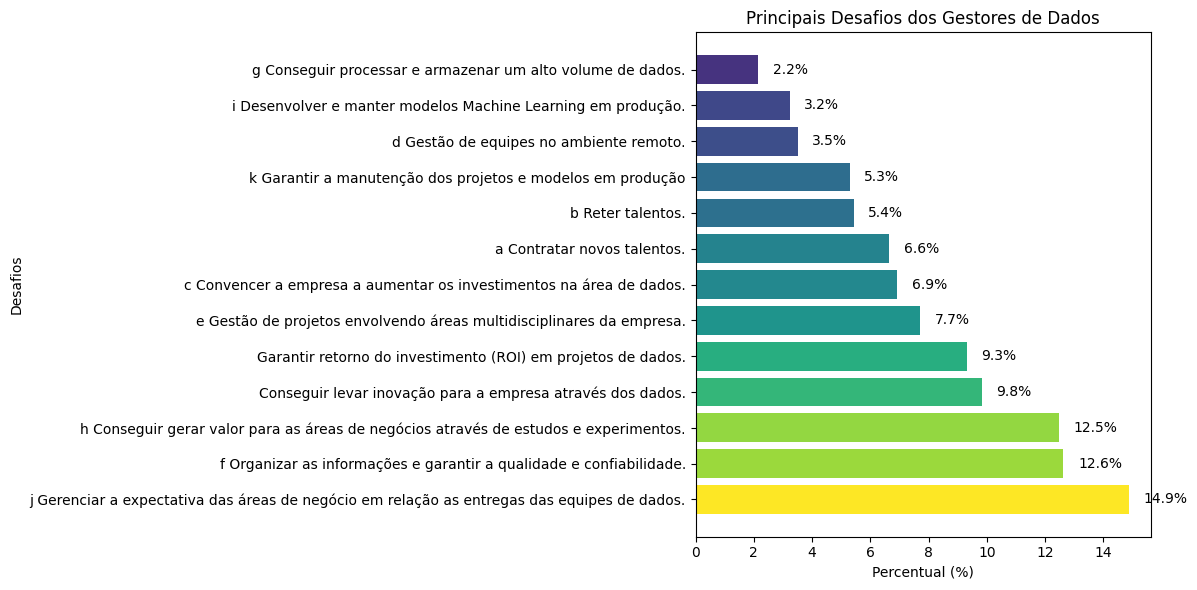

In [114]:
# Ordena as proporções em ordem decrescente
proporcao_desafios_ordenada = proporcao_desafios.sort_values(ascending=False)

# Cria o gráfico de barras horizontais
plt.figure(figsize=(12, 6))
plt.barh(proporcao_desafios_ordenada.index, proporcao_desafios_ordenada.values, color=cm.viridis(proporcao_desafios_ordenada.values / proporcao_desafios_ordenada.max()))  # Cria as barras com cores personalizadas
plt.xlabel('Percentual (%)')
plt.ylabel('Desafios')
plt.title('Principais Desafios dos Gestores de Dados')

# Adiciona a porcentagem ao lado de cada barra
for i, v in enumerate(proporcao_desafios_ordenada.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.tight_layout()  # Ajuste automático do layout
plt.show()


### 🎲 Conhecimentos em Dados

In [115]:
conhecimentos_em_dados.head()

id  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g   
1  0026aa3fwd78u0026asg7456tfkjg2cs   
2  00r21rb9pusd1b0v7ew00r21rw3dy69w   
3  00urm3jf2cek12w6ygue00urm3jzd17j   
4  00v0az4g792svil00vn6y1kfm9hq8vy9   

            Mesmo que esse não seja seu cargo formal  \
0  *Ciência de Dados/Machine Learning/AI: *Desenh...   
1  *Análise de Dados/BI:* Extrai e cruza dados un...   
2  *Ciência de Dados/Machine Learning/AI: *Desenh...   
3                                                NaN   
4  *Análise de Dados/BI:* Extrai e cruza dados un...   

                                  Atuacao  \
0                        Ciência de Dados   
1                        Análise de Dados   
2                        Ciência de Dados   
3  Buscando oportunidade na área de dados   
4                        Análise de Dados   

  Quais das fontes de dados listadas você já analisou ou processou no trabalho?  \
0  Dados relacionais (estruturados em bancos SQL)...                              
1  Dados relacionais (estruturados em bancos SQL)...                              
2  Dados relacionais (estruturados em bancos SQL)...                              
3                                                NaN                              
4  Dados relacionais (estruturados em bancos SQL)...                              

   Dados relacionais (estruturados em bancos SQL  \
0                                            1.0   
1                                            1.0   
2                                            1.0   
3                                            NaN   
4                                            1.0   

   Dados armazenados em bancos NoSQL  Imagens  Textos/Documentos  Vídeos  \
0                                1.0      0.0                1.0     0.0   
1                                1.0      1.0                0.0     1.0   
2                                0.0      0.0                1.0     0.0   
3                                NaN      NaN                NaN     NaN   
4                                0.0      0.0                1.0     0.0   

   Áudios  ...  \
0     1.0  ...   
1     0.0  ...   
2     0.0  ...   
3     NaN  ...   
4     1.0  ...   

   AI Generativa e LLMs para melhorar produtos internos para os colaboradores  \
0                                                1.0                            
1                                                0.0                            
2                                                1.0                            
3                                                NaN                            
4                                                0.0                            

   IA Generativa e LLMs como principal frente do negócio  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                NaN       
4                                                0.0       

  IA Generativa e LLMs não é prioridade  \
0                                   0.0   
1                                   1.0   
2                                   0.0   
3                                   NaN   
4                                   0.0   

   Não sei opinar sobre o uso de IA Generativa e LLMs na empresa  \
0                                                0.0               
1                                                0.0               
2                                                0.0               
3                                                NaN               
4                                                1.0               

                Utiliza ChatGPT ou LLMs no trabalho?  \
0  Não utilizo nenhum tipo de solução de IA Gener...   
1  Utilizo soluções pagas de AI Generativa (como ...   
2  Utilizo apenas soluções gratuitas (como por ex...   
3                                                NaN   
4  Utilizo apena

In [116]:
#conhecimentos_em_dados
current_columns = conhecimentos_em_dados.columns.tolist()
clean_columns = [col.strip(" '") for col in current_columns]
clean_columns.insert(0, 'id') # Insere 'id' como primeiro elemento
simplif_4 = {
    clean_columns[0]:'id',
    clean_columns[1]:'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?',
    clean_columns[2]:'Atuacao',
    clean_columns[3]:'Quais das fontes de dados listadas você já analisou ou processou no trabalho?',
    clean_columns[4]:'Dados relacionais (estruturados em bancos SQL)',
    clean_columns[5]:'Dados armazenados em bancos NoSQL',
    clean_columns[6]:'Imagens',
    clean_columns[7]:'Textos/Documentos',
    clean_columns[8]:'Vídeos',
    clean_columns[9]:'Áudios',
    clean_columns[10]:'Planilhas',
    clean_columns[11]:'Dados georeferenciados',
    clean_columns[12]:'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?',
    clean_columns[13]:'Dados relacionais (estruturados em bancos SQL)',
    clean_columns[14]:'Dados armazenados em bancos NoSQL',
    clean_columns[15]:'Imagens',
    clean_columns[16]:'Textos/Documentos',
    clean_columns[17]:'Vídeos',
    clean_columns[18]:'Áudios',
    clean_columns[19]:'Planilhas',
    clean_columns[20]:'Dados georeferenciados',
    clean_columns[21]:'Quais das linguagens listadas abaixo você utiliza no trabalho?',
    clean_columns[22]:'SQL',
    clean_columns[23]:'R',
    clean_columns[24]:'Python',
    clean_columns[25]:'C/C++/C#',
    clean_columns[26]:'.NET',
    clean_columns[27]:'Java',
    clean_columns[28]:'Julia',
    clean_columns[29]:'SAS/Stata',
    clean_columns[30]:'Visual Basic/VBA',
    clean_columns[31]:'Scala',
    clean_columns[32]:'Matlab',
    clean_columns[33]:'Rust',
    clean_columns[34]:'PHP',
    clean_columns[35]:'JavaScript',
    clean_columns[36]:'Não utilizo nenhuma linguagem',
    clean_columns[37]:'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?',
    clean_columns[38]:'Entre as linguagens listadas abaixo, qual é a sua preferida?',
    clean_columns[39]:'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?',
    clean_columns[40]:'MySQL',
    clean_columns[41]:'Oracle',
    clean_columns[42]:'SQL Server',
    clean_columns[43]:'Amazon Aurora ou RDS',
    clean_columns[44]:'DynamoDB',
    clean_columns[45]:'CoachDB',
    clean_columns[46]:'Cassandra',
    clean_columns[47]:'MongoDB',
    clean_columns[48]:'MariaDB',
    clean_columns[49]:'Datomic',
    clean_columns[50]:'S3',
    clean_columns[51]:'PostgreSQL',
    clean_columns[52]:'ElasticSearch',
    clean_columns[53]:'DB2',
    clean_columns[54]:'Microsoft Access',
    clean_columns[55]:'SQLite',
    clean_columns[56]:'Sybase',
    clean_columns[57]:'Firebase',
    clean_columns[58]:'Vertica',
    clean_columns[59]:'Redis',
    clean_columns[60]:'Neo4J',
    clean_columns[61]:'Google_BigQuery',
    clean_columns[62]:'Google_Firestore',
    clean_columns[63]:'Amazon_Redshift',
    clean_columns[64]:'Amazon_Athena',
    clean_columns[65]:'Snowflake',
    clean_columns[66]:'Databricks',
    clean_columns[67]:'HBase',
    clean_columns[68]:'Presto',
    clean_columns[69]:'Splunk',
    clean_columns[70]:'SAP_HANA',
    clean_columns[71]:'Hive',
    clean_columns[72]:'Firebird',
    clean_columns[73]:'Dentre as opções listadas, qual sua Cloud preferida?',
    clean_columns[74]:'Azure (Microsoft)',
    clean_columns[75]:'Amazon Web Services (AWS)',
    clean_columns[76]:'Google Cloud (GCP)',
    clean_columns[77]:'Oracle Cloud',
    clean_columns[78]:'IBM',
    clean_columns[79]:'Servidores On Premise/Não utilizamos Cloud',
    clean_columns[80]:'Cloud Própria',
    clean_columns[81]:'Cloud preferida',
    clean_columns[82]:'Ferramenta de BI utilizada no dia a dia',
    clean_columns[83]:'Microsoft_PowerBI',
    clean_columns[84]:'Qlik View/Qlik Sense',
    clean_columns[85]:'Tableau',
    clean_columns[86]:'Metabase',
    clean_columns[87]:'Superset',
    clean_columns[88]:'Redash',
    clean_columns[89]:'Looker',
    clean_columns[90]:'Looker Studio(Google Data Studio)',
    clean_columns[91]:'Amazon_Quicksight',
    clean_columns[92]:'Mode',
    clean_columns[93]:'Alteryx',
    clean_columns[94]:'MicroStrategy',
    clean_columns[95]:'IBM Analytics/Cogno',
    clean_columns[96]:'SAP Business_Objects/Analytics',
    clean_columns[97]:'Oracle Business Intelligence',
    clean_columns[98]:'Salesforce/Einstein Analytics',
    clean_columns[99]:'Birst',
    clean_columns[100]:'SAS Visual Analytics',
    clean_columns[101]:'Grafana',
    clean_columns[102]:'TIBCO Spotfire',
    clean_columns[103]:'Pentaho',
    clean_columns[104]:'Fazemos todas as análises utilizando apenas Excel ou planilhas do google',
    clean_columns[105]:'Não utilizo nenhuma ferramenta de BI no trabalho',
    clean_columns[106]:'Qual sua ferramenta de BI preferida?',
    clean_columns[107]:'Qual o tipo de uso de AI Generativa e LLMs na empresa',
    clean_columns[108]:'Colaboradores usando AI generativa de forma independente e descentralizada',
    clean_columns[109]:'Direcionamento centralizado do uso de AI generativa',
    clean_columns[110]:'Desenvolvedores utilizando Copilots',
    clean_columns[111]:'AI Generativa e LLMs para melhorar produtos externos para os clientes finais',
    clean_columns[112]:'AI Generativa e LLMs para melhorar produtos internos para os colaboradores',
    clean_columns[113]:'IA Generativa e LLMs como principal frente do negócio',
    clean_columns[114]:'IA Generativa e LLMs não é prioridade',
    clean_columns[115]:'Não sei opinar sobre o uso de IA Generativa e LLMs na empresa',
    clean_columns[116]:'Utiliza ChatGPT ou LLMs no trabalho?',
    clean_columns[117]:'Não uso soluções de AI Generativa com foco em produtividade',
    clean_columns[118]:'Uso soluções gratuitas de AI Generativa com foco em produtividade',
    clean_columns[119]:'Uso e pago pelas soluções de AI Generativa com foco em produtividade',
    clean_columns[120]:'A empresa que trabalho paga pelas soluções de AI Generativa com foco em produtividade',
    clean_columns[121]:'Uso soluções do tipo Copilot'
}

conhecimentos_em_dados = conhecimentos_em_dados.rename(columns=simplif_4)

In [117]:
conhecimentos_em_dados.columns.tolist()

['Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?',
 'Atuacao',
 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?',
 'Dados relacionais (estruturados em bancos SQL)',
 'Dados armazenados em bancos NoSQL',
 'Imagens',
 'Textos/Documentos',
 'Vídeos',
 'Áudios',
 'Planilhas',
 'Dados georeferenciados',
 'Quais das linguagens listadas abaixo você utiliza no trabalho?',
 'Dados relacionais (estruturados em bancos SQL)',
 'Dados armazenados em bancos NoSQL',
 'Imagens',
 'Textos/Documentos',
 'Vídeos',
 'Áudios',
 'Planilhas',
 'Dados georeferenciados',
 'Quais das linguagens listadas abaixo você utiliza no trabalho?',
 'SQL',
 'R',
 'Python',
 'C/C++/C#',
 '.NET',
 'Java',
 'Julia',
 'SAS/Stata',
 'Visual Basic/VBA',
 'Scala',
 'Matlab',
 'Rust',
 'PHP',
 'JavaScript',
 'Não utilizo nenhuma linguagem',
 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no traba

In [118]:
# Calcular a porcentagem de cada área de atuação
atuacao_counts = conhecimentos_em_dados['Atuacao'].value_counts(normalize=True) * 100

# Exibir as porcentagens de atuação
print("Porcentagem de atuação em diferentes áreas:")
for area, percentual in atuacao_counts.items():
    print(f"{area}: {percentual:.2f}%")

Porcentagem de atuação em diferentes áreas:
*Análise de Dados/BI:* Extrai e cruza dados unindo diferentes fontes da informação; analisa dados visando identificar padrões, gerar insights e levantar perguntas; desenvolve dashboards, relatórios e visualizações de dados em ferramentas de BI.: 47.85%
*Engenharia de Dados:* Modela soluções de arquitetura de dados; define modelagens de repositórios de dados (Data Lake, Data Warehouse, Data Lakehouse); desenvolve estratégias de aquisição de dados, recuperação de informação e pipelines de dados.: 24.31%
*Ciência de Dados/Machine Learning/AI: *Desenha e executa experimentos com o objetivo de responder perguntas do negócio; desenvolve modelos preditivos e algoritmos de Machine Learning com o objetivo de otimizar e automatizar a tomada de decisão.: 19.94%
Não atuo em nenhuma das frentes citadas.: 7.89%


In [119]:
conhecimentos_em_dados['Atuacao'].value_counts()

Atuacao
*Análise de Dados/BI:* Extrai e cruza dados unindo diferentes fontes da informação; analisa dados visando identificar padrões, gerar insights e levantar perguntas; desenvolve dashboards, relatórios e visualizações de dados em ferramentas de BI.     1795
*Engenharia de Dados:* Modela soluções de arquitetura de dados; define modelagens de repositórios de dados (Data Lake, Data Warehouse, Data Lakehouse); desenvolve estratégias de aquisição de dados, recuperação de informação e pipelines de dados.     912
*Ciência de Dados/Machine Learning/AI: *Desenha e executa experimentos com o objetivo de responder perguntas do negócio; desenvolve modelos preditivos e algoritmos de Machine Learning com o objetivo de otimizar e automatizar a tomada de decisão.     748
Não atuo em nenhuma das frentes citadas.                                                                                                                                                                                                                  296
Name: count, dtype: int64

In [121]:
# Somar quantas vezes cada fonte de dados foi analisada
fontes_analise = conhecimentos_em_dados[[
    'Dados relacionais (estruturados em bancos SQL)',
    'Dados armazenados em bancos NoSQL',
    'Imagens',
    'Textos/Documentos',
    'Vídeos',
    'Áudios',
    'Planilhas',
    'Dados georeferenciados']].apply(pd.to_numeric, errors='coerce').sum()

# Calcular o total de respostas
total_respostas = len(dados_carreira)

# Calcular a porcentagem de uso para cada fonte de dados
percentual_fontes = (fontes_analise / total_respostas) * 100

# Exibir os resultados
print("Porcentagem de uso de cada fonte de dados:")
for fonte, percentual in percentual_fontes.items():
    print(f"{fonte}: {percentual:.2f}%")

Porcentagem de uso de cada fonte de dados:
Dados relacionais (estruturados em bancos SQL): 0.00%
Dados relacionais (estruturados em bancos SQL): 0.00%
Dados armazenados em bancos NoSQL: 64.01%
Dados armazenados em bancos NoSQL: 56.58%
Imagens: 25.83%
Imagens: 9.50%
Textos/Documentos: 10.88%
Textos/Documentos: 1.32%
Vídeos: 41.13%
Vídeos: 9.64%
Áudios: 2.89%
Áudios: 0.45%
Planilhas: 3.00%
Planilhas: 0.26%
Dados georeferenciados: 64.78%
Dados georeferenciados: 41.00%


In [125]:
# Selecionar as colunas de linguagens
linguagens_cols = [
          'SQL',
          'R',
          'Python',
          'C/C++/C#',
          '.NET',
          'Java',
          'Julia',
          'SAS/Stata',
          'Visual Basic/VBA',
          'Scala',
          'Matlab',
          'Rust',
          'PHP',
          'JavaScript']

# Soma quantas vezes cada linguagem foi utilizada
linguagens_utilizadas = conhecimentos_em_dados[linguagens_cols].apply(pd.to_numeric, errors='coerce').sum()

# Calcular o total de respostas (número de registros)
total_respostas = len(conhecimentos_em_dados)

# Calcular a porcentagem de uso para cada linguagem
percentual_linguagens = (linguagens_utilizadas / total_respostas) * 100

# Exibir os resultados
print("Porcentagem de uso de cada linguagem:")
for linguagem, percentual in percentual_linguagens.items():
    print(f"{linguagem}: {percentual:.2f}%")

Porcentagem de uso de cada linguagem:
SQL: 0.00%
R: 59.63%
Python: 7.71%
C/C++/C#: 53.37%
.NET: 1.32%
Java: 0.76%
Julia: 6.71%
SAS/Stata: 0.15%
Visual Basic/VBA: 2.85%
Scala: 5.38%
Matlab: 2.47%
Rust: 0.57%
PHP: 0.13%
JavaScript: 1.06%


In [131]:
# Mostrar % dos bancos de dados mais utilizados
bancos_dados_colunas = [
    'MySQL',
    'Oracle',
    'SQL Server',
    'Amazon Aurora ou RDS',
    'DynamoDB',
    'CoachDB',
    'Cassandra',
    'MongoDB',
    'MariaDB',
    'Datomic',
    'S3',
    'PostgreSQL',
    'ElasticSearch',
    'DB2',
    'Microsoft Access',
    'SQLite',
    'Sybase',
    'Firebase',
    'Vertica',
    'Redis',
    'Neo4J',
    'Google_BigQuery',
    'Google_Firestore',
    'Amazon_Redshift',
    'Amazon_Athena',
    'Snowflake',
    'Databricks',
    'HBase',
    'Presto',
    'Splunk',
    'SAP_HANA',
    'Hive',
    'Firebird',
]

# Soma quantas vezes cada banco de dados foi utilizado
bancos_dados_analise = conhecimentos_em_dados[bancos_dados_colunas].apply(pd.to_numeric, errors='coerce').sum()

# Calcular o total de respostas (número de registros na amostra)
total_respostas_bancos = len(conhecimentos_em_dados)

# Calcular a porcentagem de uso para cada banco de dados
percentual_bancos_dados = (bancos_dados_analise / total_respostas_bancos) * 100

# Exibir os resultados
print("Porcentagem de uso de cada banco de dados:")
for banco, percentual in percentual_bancos_dados.items():
    print(f"{banco}: {percentual:.2f}%")

Porcentagem de uso de cada banco de dados:
MySQL: 0.00%
Oracle: 17.51%
SQL Server: 12.96%
Amazon Aurora ou RDS: 22.84%
DynamoDB: 4.55%
CoachDB: 3.93%
Cassandra: 0.08%
MongoDB: 0.79%
MariaDB: 8.09%
Datomic: 2.34%
S3: 0.38%
PostgreSQL: 14.91%
ElasticSearch: 20.18%
DB2: 2.82%
Microsoft Access: 1.89%
SQLite: 2.44%
Sybase: 3.38%
Firebase: 0.55%
Vertica: 1.96%
Redis: 0.21%
Neo4J: 1.89%
Google_BigQuery: 0.64%
Google_Firestore: 18.57%
Amazon_Redshift: 1.23%
Amazon_Athena: 7.82%
Snowflake: 8.52%
Databricks: 4.16%
HBase: 15.25%
Presto: 0.45%
Splunk: 2.63%
SAP_HANA: 0.93%
Hive: 3.99%
Firebird: 5.57%


In [134]:
#Cloud Preferida
# Selecionar as colunas relacionadas às plataformas de nuvem
cloud_colunas = [
    'Azure (Microsoft)',
    'Amazon Web Services (AWS)',
    'Google Cloud (GCP)',
    'Oracle Cloud',
    'IBM',
    'Servidores On Premise/Não utilizamos Cloud',
    'Cloud Própria',
]

# Soma quantas vezes cada plataforma de nuvem foi utilizada
cloud_analise = conhecimentos_em_dados[cloud_colunas].apply(pd.to_numeric, errors='coerce').sum()

# Calcular o total de respostas (número de registros no dataset)
total_respostas_cloud = len(conhecimentos_em_dados)

# Calcular a porcentagem de uso para cada provedor de nuvem
percentual_cloud = (cloud_analise / total_respostas_cloud) * 100

# Exibir os resultados
print("Porcentagem de uso de cada plataforma de nuvem:")
for cloud, percentual in percentual_cloud.items():
    print(f"{cloud}: {percentual:.2f}%")

Porcentagem de uso de cada plataforma de nuvem:
Azure (Microsoft): 0.00%
Amazon Web Services (AWS): 28.89%
Google Cloud (GCP): 20.90%
Oracle Cloud: 21.56%
IBM: 2.91%
Servidores On Premise/Não utilizamos Cloud: 0.89%
Cloud Própria: 11.00%


In [137]:
#Ferramenta de BI utilizada
# Selecionar as colunas relacionadas às ferramentas de BI
bi_colunas = [
    'Microsoft_PowerBI',
 'Qlik View/Qlik Sense',
 'Tableau',
 'Metabase',
 'Superset',
 'Redash',
 'Looker',
 'Looker Studio(Google Data Studio)',
 'Amazon_Quicksight',
 'Mode',
 'Alteryx',
 'MicroStrategy',
 'IBM Analytics/Cogno',
 'SAP Business_Objects/Analytics',
 'Oracle Business Intelligence',
 'Salesforce/Einstein Analytics',
 'Birst',
    'Fazemos todas as análises utilizando apenas Excel ou planilhas do google',
    'Não utilizo nenhuma ferramenta de BI no trabalho'
]

# Soma quantas vezes cada ferramenta de BI foi utilizada
bi_analise = conhecimentos_em_dados[bi_colunas].apply(pd.to_numeric, errors='coerce').sum()

# Calcular o total de respostas (número de registros no dataset)
total_respostas_bi = len(conhecimentos_em_dados)

# Calcular a porcentagem de uso para cada ferramenta de BI
percentual_bi = (bi_analise / total_respostas_bi) * 100

# Exibir os resultados
print("Porcentagem de uso de cada ferramenta de BI:")
for ferramenta, percentual in percentual_bi.items():
    print(f"{ferramenta}: {percentual:.2f}%")


Porcentagem de uso de cada ferramenta de BI:
Microsoft_PowerBI: 0.00%
Qlik View/Qlik Sense: 40.70%
Tableau: 3.67%
Metabase: 13.47%
Superset: 6.12%
Redash: 1.61%
Looker: 1.17%
Looker Studio(Google Data Studio): 16.97%
Amazon_Quicksight: 12.34%
Mode: 2.61%
Alteryx: 0.25%
MicroStrategy: 1.89%
IBM Analytics/Cogno: 0.70%
SAP Business_Objects/Analytics: 0.47%
Oracle Business Intelligence: 1.51%
Salesforce/Einstein Analytics: 0.93%
Birst: 1.61%
Fazemos todas as análises utilizando apenas Excel ou planilhas do google: 3.33%
Não utilizo nenhuma ferramenta de BI no trabalho: 7.39%


In [138]:
conhecimentos_em_dados['Ferramenta de BI utilizada no dia a dia'].value_counts()

Ferramenta de BI utilizada no dia a dia
Amazon Web Services (AWS)                                                                                                                                                                                                                         1640
Google Cloud (GCP)                                                                                                                                                                                                                                1050
Azure (Microsoft)                                                                                                                                                                                                                                 1018
Não sei                                                                                                                                                                                                                                              8
Não tenho preferência                                                                                                                                                                                                                                5
Oracle                                                                                                                                                                                                                                               4
Databricks                                                                                                                                                                                                                                           3
Sem preferência                                                                                                                                                                                                                                      3
IBM                                                                                                                                                                                                                                                  2
.                                                                                                                                                                                                                                                    2
Não sei responder                                                                                                                                                                                                                                    2
qualquer uma                                                                                                                                                                                                                                         2
Não sei informar                                                                                                                                                                                                                                     1
Z                                                                                                                                                                                                                                                    1
Não foi necessário triar ainda                                                                                                                                                                                                                       1
Desconheço                                                                                                                                                                                                                                           1
não util

In [139]:
conhecimentos_em_dados['Qual sua ferramenta de BI preferida?'].value_counts()

Qual sua ferramenta de BI preferida?
0.0    3363
1.0     409
Name: count, dtype: int64

In [142]:
# Contar quantas vezes cada opção foi selecionada
contagem_uso = conhecimentos_em_dados[[
    'Colaboradores usando AI generativa de forma independente e descentralizada',
 'Direcionamento centralizado do uso de AI generativa',
 'Desenvolvedores utilizando Copilots',
 'AI Generativa e LLMs para melhorar produtos externos para os clientes finais',
 'AI Generativa e LLMs para melhorar produtos internos para os colaboradores',
 'IA Generativa e LLMs como principal frente do negócio',
 'IA Generativa e LLMs não é prioridade',
 'Não sei opinar sobre o uso de IA Generativa e LLMs na empresa']].apply(pd.to_numeric, errors='coerce').sum()

# Calcular o total de respostas (número de registros no dataset)
total_respostas_uso = len(conhecimentos_em_dados)

# Calcular a porcentagem para cada opção
percentual_uso = (contagem_uso / total_respostas_uso) * 100

# Exibir os resultados
print("Porcentagem de uso de AI Generativa e LLMs:")
for uso, percentual in percentual_uso.items():
    print(f"{uso}: {percentual:.2f}%")


Porcentagem de uso de AI Generativa e LLMs:
Colaboradores usando AI generativa de forma independente e descentralizada: 0.00%
Direcionamento centralizado do uso de AI generativa: 32.55%
Desenvolvedores utilizando Copilots: 7.44%
AI Generativa e LLMs para melhorar produtos externos para os clientes finais: 10.92%
AI Generativa e LLMs para melhorar produtos internos para os colaboradores: 15.10%
IA Generativa e LLMs como principal frente do negócio: 11.32%
IA Generativa e LLMs não é prioridade: 2.76%
Não sei opinar sobre o uso de IA Generativa e LLMs na empresa: 14.83%


In [143]:
conhecimentos_em_dados['Utiliza ChatGPT ou LLMs no trabalho?'].value_counts()

Utiliza ChatGPT ou LLMs no trabalho?
0.0    3262
1.0     510
Name: count, dtype: int64

In [145]:
cont = conhecimentos_em_dados[[
    'Não uso soluções de AI Generativa com foco em produtividade',
    'Uso soluções gratuitas de AI Generativa com foco em produtividade',
    'Uso e pago pelas soluções de AI Generativa com foco em produtividade',
    'A empresa que trabalho paga pelas soluções de AI Generativa com foco em produtividade',
    'Uso soluções do tipo Copilot']].apply(pd.to_numeric, errors='coerce').sum()

total_respostas_cont = len(conhecimentos_em_dados)

percentual_cont = (cont / total_respostas_cont) * 100

print("Porcentagem de uso e nao uso de AI Generativa e LLMs:")
for uso, percentual in percentual_cont.items():
    print(f"{uso}: {percentual:.2f}%")

Porcentagem de uso e nao uso de AI Generativa e LLMs:
Não uso soluções de AI Generativa com foco em produtividade: 0.00%
Uso soluções gratuitas de AI Generativa com foco em produtividade: 14.06%
Uso e pago pelas soluções de AI Generativa com foco em produtividade: 45.36%
A empresa que trabalho paga pelas soluções de AI Generativa com foco em produtividade: 4.93%
Uso soluções do tipo Copilot: 4.53%
Uso soluções do tipo Copilot: 8.39%


### 🎲 Objetivos na Area de Dados

In [146]:
objetivos_area_dados.head()

id  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g   
1  0026aa3fwd78u0026asg7456tfkjg2cs   
2  00r21rb9pusd1b0v7ew00r21rw3dy69w   
3  00urm3jf2cek12w6ygue00urm3jzd17j   
4  00v0az4g792svil00vn6y1kfm9hq8vy9   

                 Qual seu objetivo na área de dados?  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Migração de carreira: Trabalho em outra área e...   
4                                                NaN   

  Qual oportunidade você está buscando?  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3             Analista de BI/BI Analyst   
4                                   NaN   

  Há quanto tempo você busca uma oportunidade na área de dados?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                    7 meses - 1 ano              
4                                                NaN              

  Como tem sido a busca por um emprego na área de dados?  
0                                                NaN      
1                                                NaN      
2                                                NaN      
3  Já participei de 1 a 3 entrevistas, mas não fu...      
4                                                NaN

In [147]:
objetivos_area_dados.describe()

id  \
count                               5293   
unique                              5293   
top     001b2d1qtli8t9z7oqgdhj001b2d4i0g   
freq                                   1   

                      Qual seu objetivo na área de dados?  \
count                                                 525   
unique                                                 52   
top     Migração de carreira: Trabalho em outra área e...   
freq                                                  153   

       Qual oportunidade você está buscando?  \
count                                    287   
unique                                    13   
top           Analista de Dados/Data Analyst   
freq                                     131   

       Há quanto tempo você busca uma oportunidade na área de dados?  \
count                                                 287              
unique                                                  4              
top                                           0 - 6 meses              
freq                                                  162              

       Como tem sido a busca por um emprego na área de dados?  
count                                                 286      
unique                                                  6      
top     Já me candidatei, mas nunca fui chamado para e...      
freq                                                  133

In [148]:
objetivos_area_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 5 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   id                                                             5293 non-null   object
 1   Qual seu objetivo na área de dados?                            525 non-null    object
 2   Qual oportunidade você está buscando?                          287 non-null    object
 3   Há quanto tempo você busca uma oportunidade na área de dados?  287 non-null    object
 4   Como tem sido a busca por um emprego na área de dados?         286 non-null    object
dtypes: object(5)
memory usage: 206.9+ KB


In [149]:
objetivos_area_dados.isnull().sum()

id                                                                  0
Qual seu objetivo na área de dados?                              4768
Qual oportunidade você está buscando?                            5006
Há quanto tempo você busca uma oportunidade na área de dados?    5006
Como tem sido a busca por um emprego na área de dados?           5007
dtype: int64

In [150]:
objetivos_area_dados['Qual seu objetivo na área de dados?'].value_counts()

Qual seu objetivo na área de dados?
Migração de carreira: Trabalho em outra área e busco recolocação na área de dados                                                                                                                                                                            153
Preparação profissional: Estou buscando conhecimentos técnicos para no futuro assumir algum cargo na área de dados                                                                                                                                           150
Primeiro emprego: Estou tentando encontrar a primeira oportunidade na área de dados                                                                                                                                                                          135
Apenas conhecimentos: Busco conhecimentos em dados para utilizar na minha área de atuação (não trabalho na área de dados)                                                                                                                                     38
Já trabalho na área de dados                                                                                                                                                                                                                                   2
Estou me tornando cientista de dados                                                                                                                                                                                                                           1
Atualmente já trabalho com dados                                                                                                                                                                                                                               1
Voltar para a area de dados                                                                                                                                                                                                                                    1
Desempregado com mais de 20 anos em dados. Procuro posição de gestão                                                                                                                                                                                           1
Compartilhar conhecimento, mais de 20 anos em grandes empresas                                                                                                                                                                                                 1
Eu trabalho com isso.                                                                                                                                                                                                                                          1
reciclagem e aperfeiçoamento                                                                                                                                                                                                                                   1
Sou da area de dados e trabalho a algum tempo                                                                                                                                                                                                                  1
Sustentar minha família                                                                                                                                                                                                                                        1
Evoluir na carreira de analista de dados                                                                                                                                                                                                                       1
Buscando desenvolvimento técnico para conseguir uma nova oportunidade na área de Dados e continuar crescendo 

In [151]:
# Contagem dos objetivos na área de dados
cont_objetivos_area = objetivos_area_dados['Qual seu objetivo na área de dados?'].value_counts()

# Total de respostas
total_objetivos_area = cont_objetivos_area.sum()

# Calcular a porcentagem para cada objetivo
percentual_objetivos_area = {objetivo: (count / total_objetivos_area) * 100 for objetivo, count in cont_objetivos_area.items()}

# Função para truncar texto longo
def truncar_texto(texto, comprimento_max):
    return texto if len(texto) <= comprimento_max else texto[:comprimento_max] + '...'

# Exibir os resultados de forma mais bonita
print("Objetivos na Área de Dados e Percentual:")
print(f"{'Objetivo':<70} {'Contagem':<10} {'Percentual':<10}")
print("-" * 90)
for objetivo, contagem in cont_objetivos_area.items():
    percentual = percentual_objetivos_area[objetivo]
    objetivo_truncado = truncar_texto(objetivo, 60)  # Ajuste o comprimento conforme necessário
    print(f"{objetivo_truncado:<70} {contagem:<10} {percentual:.2f}%")


Objetivos na Área de Dados e Percentual:
Objetivo                                                               Contagem   Percentual
------------------------------------------------------------------------------------------
Migração de carreira: Trabalho em outra área e busco recoloc...        153        29.14%
Preparação profissional: Estou buscando conhecimentos técnic...        150        28.57%
Primeiro emprego: Estou tentando encontrar a primeira oportu...        135        25.71%
Apenas conhecimentos: Busco conhecimentos em dados para util...        38         7.24%
Já trabalho na área de dados                                           2          0.38%
Estou me tornando cientista de dados                                   1          0.19%
Atualmente já trabalho com dados                                       1          0.19%
Voltar para a area de dados                                            1          0.19%
Desempregado com mais de 20 anos em dados. Procuro posição d...     

In [152]:
objetivos_area_dados['Qual oportunidade você está buscando?'].value_counts()

Qual oportunidade você está buscando?
Analista de Dados/Data Analyst                                         131
Cientista de Dados/Data Scientist                                       96
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect     22
Analista de BI/BI Analyst                                               10
Analista de Negócios/Business Analyst                                   10
Engenheiro de Machine Learning/ML Engineer                               9
Desenvolvedor                                                            2
Analytics Engineer                                                       2
Segurança de Dados                                                       1
Cientista Computacional                                                  1
Data Product Manager                                                     1
UX                                                                       1
Gerente de Área de Dados                                                 1
Name: count, dtype: int64

In [153]:
# Contagem de oportunidades buscadas
cont_oportunidades = objetivos_area_dados['Qual oportunidade você está buscando?'].value_counts()

# Total de respostas
total_oportunidades = cont_oportunidades.sum()

# Calcular a porcentagem para cada oportunidade
percentual_oportunidades = {oportunidade: (count / total_oportunidades) * 100 for oportunidade, count in cont_oportunidades.items()}

# Exibir os resultados de forma mais bonita
print("Oportunidade Buscada e Percentual:")
print(f"{'Oportunidade':<45} {'Contagem':<10} {'Percentual':<10}")
print("-" * 65)
for oportunidade, contagem in cont_oportunidades.items():
    percentual = percentual_oportunidades[oportunidade]
    print(f"{oportunidade:<45} {contagem:<10} {percentual:.2f}%")


Oportunidade Buscada e Percentual:
Oportunidade                                  Contagem   Percentual
-----------------------------------------------------------------
Analista de Dados/Data Analyst                131        45.64%
Cientista de Dados/Data Scientist             96         33.45%
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect 22         7.67%
Analista de BI/BI Analyst                     10         3.48%
Analista de Negócios/Business Analyst         10         3.48%
Engenheiro de Machine Learning/ML Engineer    9          3.14%
Desenvolvedor                                 2          0.70%
Analytics Engineer                            2          0.70%
Segurança de Dados                            1          0.35%
Cientista Computacional                       1          0.35%
Data Product Manager                          1          0.35%
UX                                            1          0.35%
Gerente de Área de Dados                      1    

In [154]:
objetivos_area_dados['Há quanto tempo você busca uma oportunidade na área de dados?'].value_counts()

Há quanto tempo você busca uma oportunidade na área de dados?
0 - 6 meses        162
7 meses - 1 ano     76
1 ano - 2 anos      38
acima de 2 anos     11
Name: count, dtype: int64

In [155]:
# Contagem de tempos de busca de oportunidade
cont_tempo_busca = objetivos_area_dados['Há quanto tempo você busca uma oportunidade na área de dados?'].value_counts()

# Total de respostas
total_tempo_busca = cont_tempo_busca.sum()

# Calcular a porcentagem para cada intervalo de tempo
percentual_tempo_busca = {tempo: (count / total_tempo_busca) * 100 for tempo, count in cont_tempo_busca.items()}

# Exibir os resultados de forma mais bonita
print("Tempo de Busca de Oportunidade e Percentual:")
print(f"{'Tempo':<20} {'Contagem':<10} {'Percentual':<10}")
print("-" * 40)
for tempo, contagem in cont_tempo_busca.items():
    percentual = percentual_tempo_busca[tempo]
    print(f"{tempo:<20} {contagem:<10} {percentual:.2f}%")


Tempo de Busca de Oportunidade e Percentual:
Tempo                Contagem   Percentual
----------------------------------------
0 - 6 meses          162        56.45%
7 meses - 1 ano      76         26.48%
1 ano - 2 anos       38         13.24%
acima de 2 anos      11         3.83%


In [156]:
objetivos_area_dados['Como tem sido a busca por um emprego na área de dados?'].value_counts()

Como tem sido a busca por um emprego na área de dados?
Já me candidatei, mas nunca fui chamado para entrevistas           133
Ainda não me candidatei a nenhuma vaga na área                      71
Já participei de 1 a 3 entrevistas, mas não fui contratado          63
Participei de mais de 3 entrevistas, mas não fui contratado         17
Trabalhar como Freelance                                             1
Participei de mais de 3 entrevistas e fui contratada em algumas      1
Name: count, dtype: int64

In [157]:
# Contagem de experiências na busca de emprego
cont_experiencia_busca = objetivos_area_dados['Como tem sido a busca por um emprego na área de dados?'].value_counts()

# Total de respostas
total_experiencia_busca = cont_experiencia_busca.sum()

# Calcular a porcentagem para cada categoria de experiência
percentual_experiencia_busca = {experiencia: (count / total_experiencia_busca) * 100 for experiencia, count in cont_experiencia_busca.items()}

# Exibir os resultados de forma mais bonita
print("Experiência na Busca de Emprego e Percentual:")
print(f"{'Experiência':<45} {'Contagem':<10} {'Percentual':<10}")
print("-" * 65)
for experiencia, contagem in cont_experiencia_busca.items():
    percentual = percentual_experiencia_busca[experiencia]
    print(f"{experiencia:<45} {contagem:<10} {percentual:.2f}%")


Experiência na Busca de Emprego e Percentual:
Experiência                                   Contagem   Percentual
-----------------------------------------------------------------
Já me candidatei, mas nunca fui chamado para entrevistas 133        46.50%
Ainda não me candidatei a nenhuma vaga na área 71         24.83%
Já participei de 1 a 3 entrevistas, mas não fui contratado 63         22.03%
Participei de mais de 3 entrevistas, mas não fui contratado 17         5.94%
Trabalhar como Freelance                      1          0.35%
Participei de mais de 3 entrevistas e fui contratada em algumas 1          0.35%


### 🎲 Conhecimentos na Area de Engenharia de Dados


In [158]:
conhecim_engenharia_dados.head()

id  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g   
1  0026aa3fwd78u0026asg7456tfkjg2cs   
2  00r21rb9pusd1b0v7ew00r21rw3dy69w   
3  00urm3jf2cek12w6ygue00urm3jzd17j   
4  00v0az4g792svil00vn6y1kfm9hq8vy9   

  Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?  \
0                                                NaN                                              
1                                                NaN                                              
2                                                NaN                                              
3                                                NaN                                              
4                                                NaN                                              

   Desenvolvo pipelines de dados utilizando linguagens de programação como Python  \
0                                                NaN                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

   Realizo construções de ETL's em ferramentas como Pentaho  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.  \
0                                                NaN                                                           
1                                                NaN                                                           
2                                                NaN                                                           
3                                                NaN                                                           
4                                                NaN                                                           

   Atuo na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data  \
0                                                NaN                                                        
1                                                NaN                                                        
2                                                NaN                                                        
3                                                NaN                                                        
4                                                NaN                                                        

   Modelo soluções de arquitetura de dados  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   Desenvolvo/cuido da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.  \
0                                                NaN                                                                             
1                                                NaN                                                                             
2                                                NaN                                                                             
3                                                NaN                                                                             
4                                                NaN      

In [159]:
conhecim_engenharia_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 48 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   id                                                                                                                                 5293 non-null   object 
 1   Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?                                      912 non-null    object 
 2   Desenvolvo pipelines de dados utilizando linguagens de programação como Python                                                     912 non-null    float64
 3   Realizo construções de ETL's em ferramentas como Pentaho                                

In [160]:
conhecim_engenharia_dados.columns.tolist()

['id',
 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?',
 'Desenvolvo pipelines de dados utilizando linguagens de programação como Python',
 "Realizo construções de ETL's em ferramentas como Pentaho",
 'Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.',
 'Atuo na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data',
 'Modelo soluções de arquitetura de dados',
 'Desenvolvo/cuido da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.',
 'Atuo na modelagem dos dados',
 'Cuido da qualidade dos dados',
 'Nenhuma das opções listadas refletem meu dia a dia.',
 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?',
 'Scripts Python',
 'SQL & Stored Procedures',
 'Apache Airflow',
 'Apache NiFi',
 'Luigi',
 'AWS Glue',
 'Talend',
 'Pentaho',
 'Alteryx',
 'Stitch

In [161]:

# Lista de ferramentas de ETL
ferramentas_etl = [
    'Scripts Python',
    'SQL & Stored Procedures',
    'Apache Airflow',
    'Apache NiFi',
    'Luigi',
    'AWS Glue',
    'Talend',
    'Pentaho',
    'Alteryx',
    'Stitch',
    'Fivetran',
    'Google Dataflow',
    'Oracle Data Integrator',
    'IBM DataStage',
    'SAP BW ETL',
    'SQL Server Integration Services (SSIS',
    'SAS Data Integration',
    'Qlik Sense',
    'Knime',
    'Databricks',
    'Não utilizo ferramentas de ETL'
]

# Somar os valores de cada coluna
soma_ferramentas = conhecim_engenharia_dados[ferramentas_etl].sum()

# Imprimir a soma
print("Soma das ferramentas de ETL:")
print(soma_ferramentas)

Soma das ferramentas de ETL:
Scripts Python                           725.0
SQL & Stored Procedures                  608.0
Apache Airflow                           411.0
Apache NiFi                               38.0
Luigi                                      4.0
AWS Glue                                 183.0
Talend                                    15.0
Pentaho                                   61.0
Alteryx                                   17.0
Stitch                                    16.0
Fivetran                                  22.0
Google Dataflow                          101.0
Oracle Data Integrator                    12.0
IBM DataStage                              9.0
SAP BW ETL                                14.0
SQL Server Integration Services (SSIS     88.0
SAS Data Integration                       9.0
Qlik Sense                                15.0
Knime                                      8.0
Databricks                               291.0
Não utilizo ferramentas de ETL 

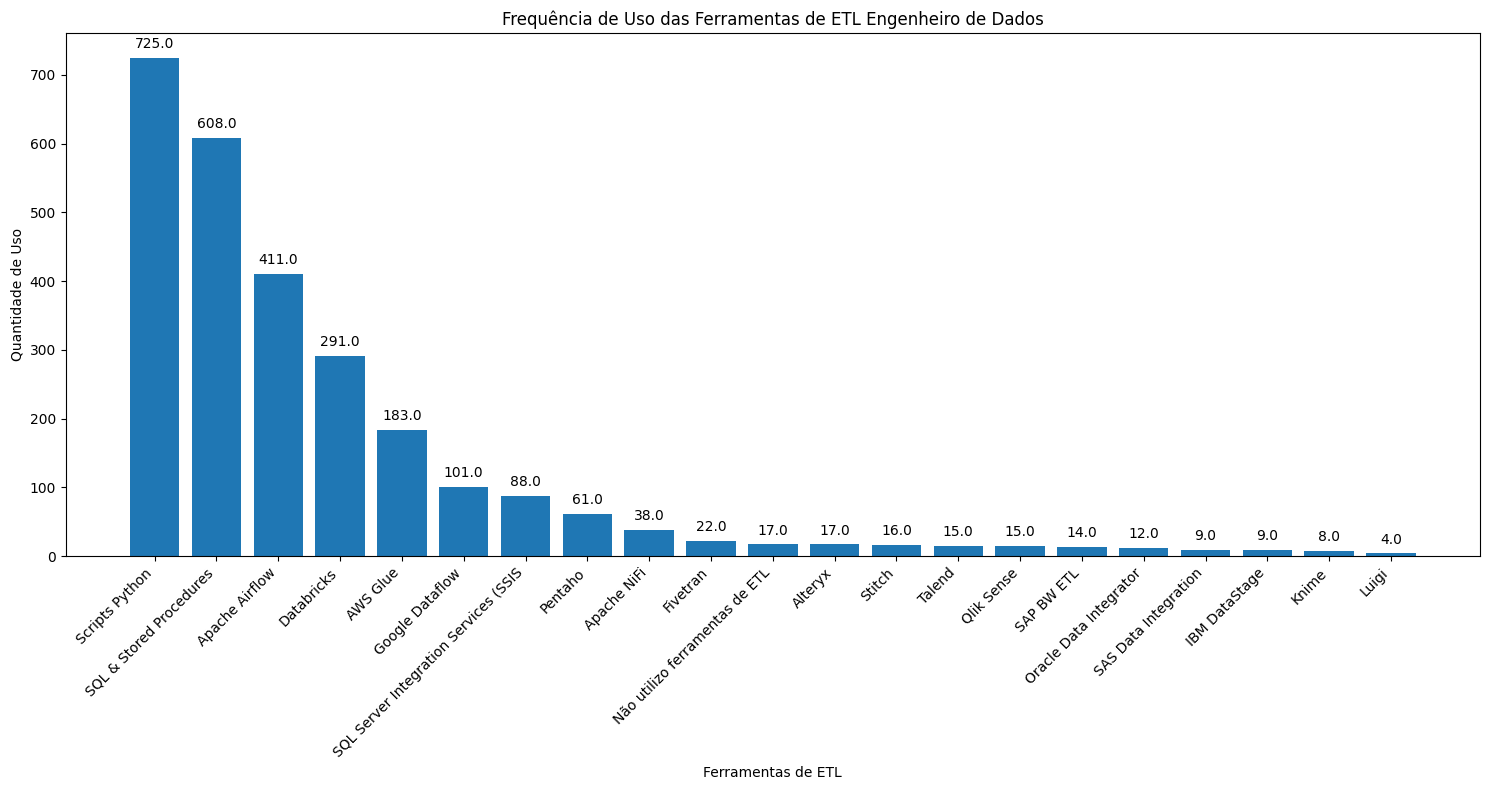

In [162]:
# Ordenar as ferramentas pela quantidade em ordem decrescente
ferramentas_ordenadas = [x for _, x in sorted(zip(soma_ferramentas, ferramentas_etl), reverse=True)]
soma_ferramentas1_ordenada = sorted(soma_ferramentas, reverse=True)

# Criar o gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(ferramentas_ordenadas, soma_ferramentas1_ordenada)

# Configurar o título e os rótulos dos eixos
plt.title("Frequência de Uso das Ferramentas de ETL Engenheiro de Dados")
plt.xlabel("Ferramentas de ETL")
plt.ylabel("Quantidade de Uso")

# Adicionar os valores acima de cada barra
for i, v in enumerate(soma_ferramentas1_ordenada):
    plt.text(i, v + 10, str(v), ha='center', va='bottom') # Ajustar '10' para posicionar o texto

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [163]:
conhecim_engenharia_dados['Sua organização possui um Data Lake?'].value_counts()

Sua organização possui um Data Lake?
1.0    751
0.0    160
Name: count, dtype: int64

In [164]:
# Contagem de valores
contagem_datalake = conhecim_engenharia_dados['Sua organização possui um Data Lake?'].value_counts()

# Total de respostas
total_respostas = contagem_datalake.sum()

# Calcular a porcentagem
percentual_datalake = (contagem_datalake / total_respostas) * 100

# Exibir os resultados de forma mais bonita
print("Contagem e Percentual de Existência de Data Lake:")
print(f"{'Existência de Data Lake':<30} {'Contagem':<10} {'Percentual':<10}")
print("-" * 50)
for valor, contagem in contagem_datalake.items():
    percentual = percentual_datalake[valor]
    status = "Sim" if valor == 1.0 else "Não"
    print(f"{status:<30} {contagem:<10} {percentual:.2f}%")


Contagem e Percentual de Existência de Data Lake:
Existência de Data Lake        Contagem   Percentual
--------------------------------------------------
Sim                            751        82.44%
Não                            160        17.56%


In [165]:
conhecim_engenharia_dados['Qual tecnologia utilizada como plataforma do Data Lake?'].value_counts()

Qual tecnologia utilizada como plataforma do Data Lake?
Google FS + BigQuery             211
Amazon S3 + Redshift + Athena    201
Azure Datalake                   124
Databricks                       121
Hadoop + Hive                     43
Snowflake                         28
Presto                            14
Name: count, dtype: int64

In [166]:
# Contagem de Tecnologias do Data Lake
cont_data_lake = conhecim_engenharia_dados['Qual tecnologia utilizada como plataforma do Data Lake?'].value_counts()

# Total de respostas
total_technologies = cont_data_lake.sum()

# Calcular a porcentagem para cada tecnologia
percentual_technologies = (cont_data_lake / total_technologies) * 100

# Exibir os resultados de forma mais bonita
print("Tecnologia de Data Lake e Percentual:")
print(f"{'Tecnologia':<35} {'Contagem':<10} {'Percentual':<10}")
print("-" * 55)
for tecnologia, contagem in cont_data_lake.items():
    percentual = percentual_technologies[tecnologia]
    print(f"{tecnologia:<35} {contagem:<10} {percentual:.2f}%")


Tecnologia de Data Lake e Percentual:
Tecnologia                          Contagem   Percentual
-------------------------------------------------------
Google FS + BigQuery                211        28.44%
Amazon S3 + Redshift + Athena       201        27.09%
Azure Datalake                      124        16.71%
Databricks                          121        16.31%
Hadoop + Hive                       43         5.80%
Snowflake                           28         3.77%
Presto                              14         1.89%


In [167]:
conhecim_engenharia_dados['Qual tecnologia utilizada como plataforma do Data Warehouse?'].value_counts()

Qual tecnologia utilizada como plataforma do Data Warehouse?
Google BigQuery    231
AWS Redshift       124
Databricks         119
Azure               89
Postgres/MySQL      61
Snowflake           33
Oracle              30
Teradata            25
Presto              19
IBM                  8
Name: count, dtype: int64

In [168]:
# Contagem de Data Warehouses existentes
cont_data_warehouse = conhecim_engenharia_dados['Sua organização possui um Data Warehouse?'].value_counts()

# Total de respostas
total_warehouses = cont_data_warehouse.sum()

# Calcular a porcentagem para cada categoria
percentual_warehouses = (cont_data_warehouse / total_warehouses) * 100

# Exibir os resultados de forma mais bonita
print("Existência de Data Warehouse e Percentual:")
print(f"{'Existência':<20} {'Contagem':<10} {'Percentual':<10}")
print("-" * 40)
for existencia, contagem in cont_data_warehouse.items():
    percentual = percentual_warehouses[existencia]
    existencia_str = 'Sim' if existencia == 1.0 else 'Não'
    print(f"{existencia_str:<20} {contagem:<10} {percentual:.2f}%")


Existência de Data Warehouse e Percentual:
Existência           Contagem   Percentual
----------------------------------------
Sim                  755        83.06%
Não                  154        16.94%


In [169]:
conhecim_engenharia_dados['Qual tecnologia utilizada como plataforma do Data Warehouse?'].value_counts()

Qual tecnologia utilizada como plataforma do Data Warehouse?
Google BigQuery    231
AWS Redshift       124
Databricks         119
Azure               89
Postgres/MySQL      61
Snowflake           33
Oracle              30
Teradata            25
Presto              19
IBM                  8
Name: count, dtype: int64

In [170]:
# Contagem de tecnologias de Data Warehouse
cont_data_warehouse_tech = conhecim_engenharia_dados['Qual tecnologia utilizada como plataforma do Data Warehouse?'].value_counts()

# Total de respostas
total_techs = cont_data_warehouse_tech.sum()

# Calcular a porcentagem para cada tecnologia
percentual_techs = {tech: (count / total_techs) * 100 for tech, count in cont_data_warehouse_tech.items()}

# Exibir os resultados de forma mais bonita
print("Tecnologia de Data Warehouse e Percentual:")
print(f"{'Tecnologia':<20} {'Contagem':<10} {'Percentual':<10}")
print("-" * 40)
for tecnologia, contagem in cont_data_warehouse_tech.items():
    percentual = percentual_techs[tecnologia]
    print(f"{tecnologia:<20} {contagem:<10} {percentual:.2f}%")

Tecnologia de Data Warehouse e Percentual:
Tecnologia           Contagem   Percentual
----------------------------------------
Google BigQuery      231        31.26%
AWS Redshift         124        16.78%
Databricks           119        16.10%
Azure                89         12.04%
Postgres/MySQL       61         8.25%
Snowflake            33         4.47%
Oracle               30         4.06%
Teradata             25         3.38%
Presto               19         2.57%
IBM                  8          1.08%


In [171]:
conhecim_engenharia_dados['Quais as ferramentas de gestão de Qualidade de dados'].value_counts()

Quais as ferramentas de gestão de Qualidade de dados
dbt                    158
great\_expectations    142
DataHub Project         74
Open Metadata           50
AWS Deequ               50
Amundsen                26
SODA                    21
Monte Carlo              9
Atlan                    8
Apache Griffin           7
Big Eye                  5
Datafold                 4
Acceldata                1
Name: count, dtype: int64

In [172]:
# Contagem de ferramentas de qualidade de dados
cont_ferramentas_qualidade = conhecim_engenharia_dados['Quais as ferramentas de gestão de Qualidade de dados'].value_counts()

# Total de respostas
total_ferramentas = cont_ferramentas_qualidade.sum()

# Calcular a porcentagem para cada ferramenta
percentual_ferramentas = {ferramenta: (count / total_ferramentas) * 100 for ferramenta, count in cont_ferramentas_qualidade.items()}

# Exibir os resultados de forma mais bonita
print("Ferramentas de Qualidade de Dados e Percentual:")
print(f"{'Ferramenta':<20} {'Contagem':<10} {'Percentual':<10}")
print("-" * 40)
for ferramenta, contagem in cont_ferramentas_qualidade.items():
    percentual = percentual_ferramentas[ferramenta]
    print(f"{ferramenta:<20} {contagem:<10} {percentual:.2f}%")


Ferramentas de Qualidade de Dados e Percentual:
Ferramenta           Contagem   Percentual
----------------------------------------
dbt                  158        28.47%
great\_expectations  142        25.59%
DataHub Project      74         13.33%
Open Metadata        50         9.01%
AWS Deequ            50         9.01%
Amundsen             26         4.68%
SODA                 21         3.78%
Monte Carlo          9          1.62%
Atlan                8          1.44%
Apache Griffin       7          1.26%
Big Eye              5          0.90%
Datafold             4          0.72%
Acceldata            1          0.18%


In [173]:
conhecim_engenharia_dados['Em qual das opções abaixo você gasta a maior parte do seu tempo?'].value_counts()

Em qual das opções abaixo você gasta a maior parte do seu tempo?
Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc., Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.                                                      99
Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.                                                                                                                                                                    97
Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc., Modelando soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.                                  59
Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc., Realizando construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc.                                                                                52
Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc., Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts, Datasets etc.                                        51
Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.                                                                                                                                                           45
Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc., Desenvolvendo/cuidando da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.                                 39
Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio., Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.                                                      32
Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio., Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts, Datasets etc.                               31
Modelando soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.                                                                                                                                       29
Nenhuma das opções listadas refletem meu dia a dia.                                                                                                                                                                                                                    28
Modelando soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação., Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.                                  22
Realizando construções de ETL's em ferramentas como Pentaho, Talend, Dataflow etc., Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.                                                                       22
Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc., Cuidando da qualidade dos dados, metadados e dicionário de dados.                                                                                                 21
Modelando soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação., Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como D

### 🎲 Conhecimentos na Area de Analise de Dados

In [174]:
conhecim_analise_dados.head()

id  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g   
1  0026aa3fwd78u0026asg7456tfkjg2cs   
2  00r21rb9pusd1b0v7ew00r21rw3dy69w   
3  00urm3jf2cek12w6ygue00urm3jzd17j   
4  00v0az4g792svil00vn6y1kfm9hq8vy9   

  Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?  \
0                                                NaN                                          
1  Processo e analiso dados utilizando linguagens...                                          
2                                                NaN                                          
3                                                NaN                                          
4  Processo e analiso dados utilizando linguagens...                                          

   Processo e analiso dados utilizando linguagens de programação como Python  \
0                                                NaN                           
1                                                1.0                           
2                                                NaN                           
3                                                NaN                           
4                                                1.0                           

   Realizo construções de dashboards em ferramentas de BI como PowerBI  \
0                                                NaN                     
1                                                0.0                     
2                                                NaN                     
3                                                NaN                     
4                                                1.0                     

   Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.  \
0                                                NaN                                                           
1                                                1.0                                                           
2                                                NaN                                                           
3                                                NaN                                                           
4                                                1.0                                                           

   Utilizo API's para extrair dados e complementar minhas análises.  \
0                                                NaN                  
1                                                0.0                  
2                                                NaN                  
3                                                NaN                  
4                                                0.0                  

   Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese  \
0                                                NaN                                            
1                                                0.0                                            
2                                                NaN                                            
3                                                NaN                                            
4                                                1.0                                            

   Desenvolvo/cuido da manutenção de ETL's utilizando tecnologias como Talend  \
0                                                NaN                            
1                                                0.0                            
2                                                NaN                            
3                                                NaN                            
4                                                0.0                            

   Atuo na modelagem dos dados  \
0                          NaN   
1                          0.0   
2                          Na

In [175]:
conhecim_analise_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 52 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   id                                                                                                                         5293 non-null   object 
 1   Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?                                  1795 non-null   object 
 2   Processo e analiso dados utilizando linguagens de programação como Python                                                  1795 non-null   float64
 3   Realizo construções de dashboards em ferramentas de BI como PowerBI                                                        1795 

In [176]:
conhecim_analise_dados.columns.tolist()

['id',
 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?',
 'Processo e analiso dados utilizando linguagens de programação como Python',
 'Realizo construções de dashboards em ferramentas de BI como PowerBI',
 'Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.',
 "Utilizo API's para extrair dados e complementar minhas análises.",
 'Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese',
 "Desenvolvo/cuido da manutenção de ETL's utilizando tecnologias como Talend",
 'Atuo na modelagem dos dados',
 'Desenvolvo/cuido da manutenção de planilhas para atender as áreas de negócio.',
 'Utilizo ferramentas avançadas de estatística como SASS',
 'Nenhuma das opções listadas refletem meu dia a dia.',
 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?',
 'Scripts Python',
 'SQL & Stored Procedures',
 'Apache Airflow',
 'Apache 

In [177]:
# Lista de ferramentas de ETL
ferramentas_etl1 = [
    'Scripts Python',
    'SQL & Stored Procedures',
    'Apache Airflow',
    'Apache NiFi',
    'Luigi',
    'AWS Glue',
    'Talend',
    'Pentaho',
    'Alteryx',
    'Stitch',
    'Fivetran',
    'Google Dataflow',
    'Oracle Data Integrator',
    'IBM DataStage',
    'SAP BW ETL',
    'SQL Server Integration Services (SSIS',
    'SAS Data Integration',
    'Qlik Sense',
    'Knime',
    'Databricks',
    'Não utilizo ferramentas de ETL'
]

# Somar os valores de cada coluna
soma_ferramentas1 = conhecim_analise_dados[ferramentas_etl].sum()

# Imprimir a soma
print("Soma das ferramentas de ETL:")
print(soma_ferramentas1)

Soma das ferramentas de ETL:
Scripts Python                           834.0
SQL & Stored Procedures                  870.0
Apache Airflow                           144.0
Apache NiFi                               12.0
Luigi                                      2.0
AWS Glue                                  46.0
Talend                                    21.0
Pentaho                                  111.0
Alteryx                                   58.0
Stitch                                    12.0
Fivetran                                   6.0
Google Dataflow                           35.0
Oracle Data Integrator                    18.0
IBM DataStage                              3.0
SAP BW ETL                                19.0
SQL Server Integration Services (SSIS    132.0
SAS Data Integration                      35.0
Qlik Sense                                58.0
Knime                                     33.0
Databricks                               266.0
Não utilizo ferramentas de ETL 

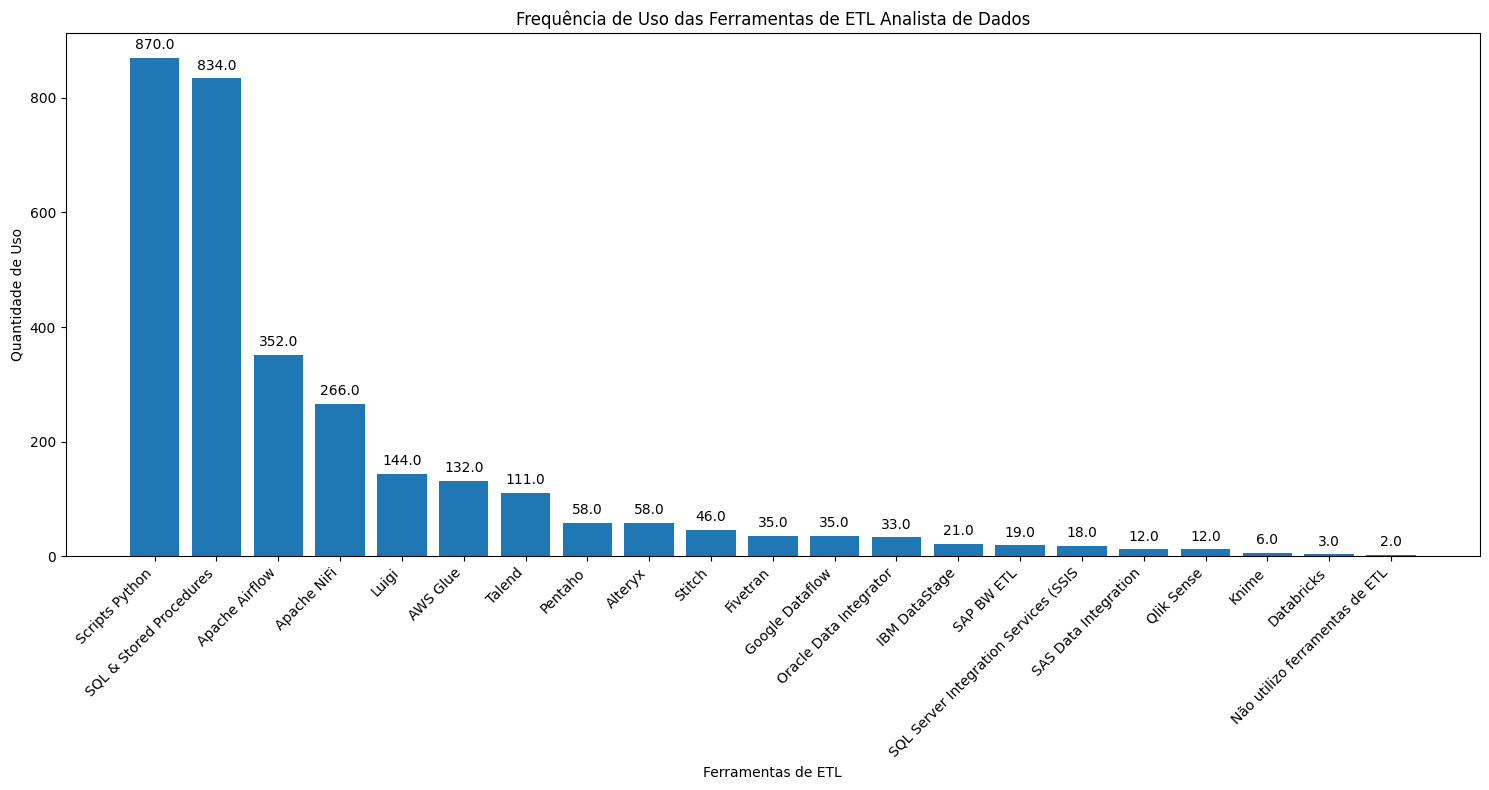

In [178]:
# Ordenar as ferramentas pela quantidade em ordem decrescente
ferramentas_ordenadas1 = [x for _, x in sorted(zip(soma_ferramentas, ferramentas_etl1), reverse=True)]
soma_ferramentas1_ordenada = sorted(soma_ferramentas1, reverse=True)

# Criar o gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(ferramentas_etl1, soma_ferramentas1_ordenada)

# Configurar o título e os rótulos dos eixos
plt.title("Frequência de Uso das Ferramentas de ETL Analista de Dados")
plt.xlabel("Ferramentas de ETL")
plt.ylabel("Quantidade de Uso")

# Adicionar os valores acima de cada barra
for i, v in enumerate(soma_ferramentas1_ordenada):
    plt.text(i, v + 10, str(v), ha='center', va='bottom') # Ajustar '10' para posicionar o texto

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [179]:
# Concatenar os DataFrames
df_concatenado = pd.concat([conhecim_analise_dados[ferramentas_etl], conhecim_engenharia_dados[ferramentas_etl]], axis=0)

# Somar os valores de cada coluna
soma_total_ferramentas = df_concatenado.sum()

# Imprimir a soma
print("Soma total das ferramentas de ETL:")
print(soma_total_ferramentas)

Soma total das ferramentas de ETL:
Scripts Python                           1559.0
SQL & Stored Procedures                  1478.0
Apache Airflow                            555.0
Apache NiFi                                50.0
Luigi                                       6.0
AWS Glue                                  229.0
Talend                                     36.0
Pentaho                                   172.0
Alteryx                                    75.0
Stitch                                     28.0
Fivetran                                   28.0
Google Dataflow                           136.0
Oracle Data Integrator                     30.0
IBM DataStage                              12.0
SAP BW ETL                                 33.0
SQL Server Integration Services (SSIS     220.0
SAS Data Integration                       44.0
Qlik Sense                                 73.0
Knime                                      41.0
Databricks                                557.0
Não u

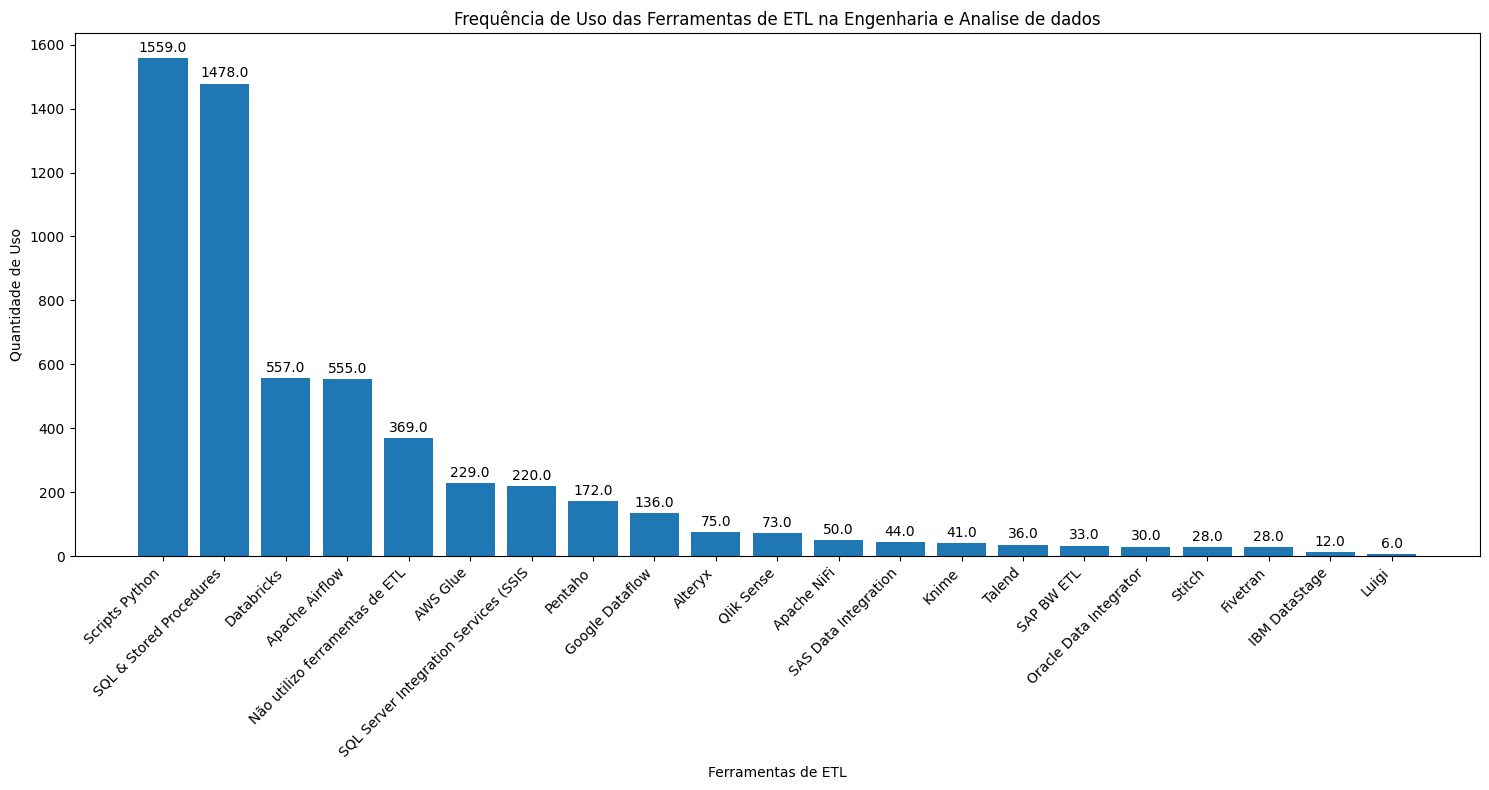

In [180]:
# Ordenar as ferramentas pela quantidade em ordem decrescente
ferramentas_ordenadas = [x for _, x in sorted(zip(soma_total_ferramentas, ferramentas_etl), reverse=True)]
soma_total_ferramentas_ordenada = sorted(soma_total_ferramentas, reverse=True)

# Criar o gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(ferramentas_ordenadas, soma_total_ferramentas_ordenada)

# Configurar o título e os rótulos dos eixos
plt.title("Frequência de Uso das Ferramentas de ETL na Engenharia e Analise de dados")
plt.xlabel("Ferramentas de ETL")
plt.ylabel("Quantidade de Uso")

# Adicionar os valores acima de cada barra
for i, v in enumerate(soma_total_ferramentas_ordenada):
    plt.text(i, v + 10, str(v), ha='center', va='bottom') # Ajustar '10' para posicionar o texto

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [181]:
conhecim_analise_dados['Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?'].value_counts()

Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?
Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc., Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            125
Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       115
Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc., Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio., Desenvolvo/cuido da manutenção de planilhas para atender as áreas de negócio.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              66
Processo e analiso dados utilizando linguagens de programação como Python, R etc., Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc., Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          54
Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc., Desenvolvo/cuido da manutenção de planilhas para atender as áreas de negócio.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [182]:
conhecim_analise_dados['Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?'].value_counts()

Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?
Minha empresa não utiliza essas ferramentas.                                                                                                                                                                                                                                                                         733
Não sei informar.                                                                                                                                                                                                                                                                                                    580
Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards.                                                                                                                                                                                                         179
"Point and Click" Analytics como Alteryx, Knime, Rapidminer etc.                                                                                                                                                                                                                                                      88
Product metricts & Insights como Mixpanel, Amplitude, Adobe Analytics.                                                                                                                                                                                                                                                70
Product metricts & Insights como Mixpanel, Amplitude, Adobe Analytics., Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards.                                                                                                                                  27
Ferramentas de AutoML como H2O.ai, Data Robot, BigML etc.                                                                                                                                                                                                                                                             25
Minha empresa não utiliza essas ferramentas., Não sei informar.                                                                                                                                                                                                                                                       17
"Point and Click" Analytics como Alteryx, Knime, Rapidminer etc., Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards.                                                                                                                                        15
Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards., Product metricts & Insights como Mixpanel, Amplitude, Adobe Analytics.                                                                                                                                  11
Não sei informar., Minha empresa não utiliza essas ferramentas.                                                                                                                                                                                                                                                        9
Ferramentas de AutoML como H2O.ai, Data Robot, BigML etc., Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards.                                                                                                                                                8
Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards., "Point and C

In [183]:
# Contagem das ferramentas
cont_ferramentas = conhecim_analise_dados[['Ferramentas de AutoML como H2O.ai', '""Point and Click"" Analytics como Alteryx',
                                           'Product metricts & Insights como Mixpanel', 'Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards.',
                                           'Minha empresa não utiliza essas ferramentas.', 'Não sei informar.']].sum()

# Total de respostas
total_ferramentas = cont_ferramentas.sum()

# Calcular a porcentagem para cada ferramenta
proporcao_ferramentas = (cont_ferramentas / total_ferramentas) * 100

# Exibir a proporção das ferramentas em porcentagem
print("Proporção das Ferramentas:")
print(f"{'Ferramenta':<25} {'Contagem':<10} {'Percentual':<10}")
print("-" * 45)
for ferramenta, contagem in cont_ferramentas.items():
    percentual = proporcao_ferramentas[ferramenta]
    print(f"{ferramenta:<25} {contagem:<10} {percentual:.2f}%")


Proporção das Ferramentas:
Ferramenta                Contagem   Percentual
---------------------------------------------
Ferramentas de AutoML como H2O.ai 48.0       2.49%
""Point and Click"" Analytics como Alteryx 123.0      6.38%
Product metricts & Insights como Mixpanel 119.0      6.18%
Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards. 263.0      13.65%
Minha empresa não utiliza essas ferramentas. 761.0      39.49%
Não sei informar.         613.0      31.81%


In [184]:
conhecim_analise_dados['Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?'].value_counts()

Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?
Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc., Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.    299
Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.                                                                                                                  242
Processando e analisando dados utilizando linguagens de programação como Python, R etc., Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.                         149
Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio., Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.    110
Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.                                                                                                         93
                                                                                                                                                                                                                   ... 
Utilizando API's para extrair dados e complementar minhas análises., Processando e analisando dados utilizando linguagens de programação como Python, R etc.                                                          1
Processando e analisando dados utilizando linguagens de programação como Python, R etc., Nenhuma das opções listadas refletem meu dia a dia.                                                                          1
Desenvolvendo/cuidando da manutenção de planilhas para atender as áreas de negócio., Desenvolvendo/cuidando da manutenção de ETL's utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.                1
Nenhuma das opções listadas refletem meu dia a dia., Processando e analisando dados utilizando linguagens de programação como Python, R etc.                                                                          1
Desenvolvendo/cuidando da manutenção de planilhas para atender as áreas de negócio., Nenhuma das opções listadas refletem meu dia a dia.                                                                              1
Name: count, Length: 66, dtype: int64

### 🎲 Conhecimento na Area de Ciencia de Dados

In [185]:
# Renomeando as colunas
conhecim_ciencias_dados = conhecim_ciencias_dados.rename(columns={
    conhecim_ciencias_dados.columns[1]: 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?',
    conhecim_ciencias_dados.columns[2]: 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.',
    conhecim_ciencias_dados.columns[3]: 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.',
    conhecim_ciencias_dados.columns[4]: 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.',
    conhecim_ciencias_dados.columns[5]: 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).',
    conhecim_ciencias_dados.columns[6]: 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.',
    conhecim_ciencias_dados.columns[7]: 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.',
    conhecim_ciencias_dados.columns[8]: 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc',
    conhecim_ciencias_dados.columns[9]: 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.',
    conhecim_ciencias_dados.columns[10]: 'Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.',
    conhecim_ciencias_dados.columns[11]: 'Crio e gerencio soluções de Feature Store e cultura de MLOps.',
    conhecim_ciencias_dados.columns[12]: 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)',
    conhecim_ciencias_dados.columns[13]: 'Treino e aplico LLM\'s para solucionar problemas de negócio.',
    conhecim_ciencias_dados.columns[14]: 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?',
    conhecim_ciencias_dados.columns[15]: 'Utilizo modelos de regressão (linear, logística, GLM)',
    conhecim_ciencias_dados.columns[16]: 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação',
    conhecim_ciencias_dados.columns[17]: 'Desenvolvo sistemas de recomendação (RecSys)',
    conhecim_ciencias_dados.columns[18]: 'Utilizo métodos estatísticos Bayesianos para analisar dados',
    conhecim_ciencias_dados.columns[19]: 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados',
    conhecim_ciencias_dados.columns[20]: 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados',
    conhecim_ciencias_dados.columns[21]: 'Utilizo cadeias de Markov ou HMM\'s para realizar análises de dados',
    conhecim_ciencias_dados.columns[22]: 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)',
    conhecim_ciencias_dados.columns[23]: 'Realizo previsões através de modelos de Séries Temporais (Time Series)',
    conhecim_ciencias_dados.columns[24]: 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)',
    conhecim_ciencias_dados.columns[25]: 'Utilizo modelos de Machine Learning para detecção de fraude',
    conhecim_ciencias_dados.columns[26]: 'Utilizo métodos de Visão Computacional',
    conhecim_ciencias_dados.columns[27]: 'Utilizo modelos de Detecção de Churn',
    conhecim_ciencias_dados.columns[28]: 'Utilizo LLM\'s para solucionar problemas de negócio',
    conhecim_ciencias_dados.columns[29]: 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?',
    conhecim_ciencias_dados.columns[30]: 'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)',
    conhecim_ciencias_dados.columns[31]: 'Planilhas (Excel, Google Sheets etc)',
    conhecim_ciencias_dados.columns[32]: 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)',
    conhecim_ciencias_dados.columns[33]: 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)',
    conhecim_ciencias_dados.columns[34]: 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)',
    conhecim_ciencias_dados.columns[35]: 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)',
    conhecim_ciencias_dados.columns[36]: 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)',
    conhecim_ciencias_dados.columns[37]: 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)',
    conhecim_ciencias_dados.columns[38]: 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)',
    conhecim_ciencias_dados.columns[39]: 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)',
    conhecim_ciencias_dados.columns[40]: 'Ferramentas de estatística avançada como SPSS, SAS, etc.',
    conhecim_ciencias_dados.columns[41]: 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?',
    conhecim_ciencias_dados.columns[42]: 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.',
    conhecim_ciencias_dados.columns[43]: 'Coletando e limpando os dados que uso para análise e modelagem.',
    conhecim_ciencias_dados.columns[44]: 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.',
    conhecim_ciencias_dados.columns[45]: 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).',
    conhecim_ciencias_dados.columns[46]: 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.',
    conhecim_ciencias_dados.columns[47]: 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.',
    conhecim_ciencias_dados.columns[48]: 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.',
    conhecim_ciencias_dados.columns[49]: 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.',
    conhecim_ciencias_dados.columns[50]: 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.',
    conhecim_ciencias_dados.columns[51]: 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.',
    conhecim_ciencias_dados.columns[52]: 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)',
    conhecim_ciencias_dados.columns[53]: 'Treinando e aplicando LLM\'s para solucionar problemas de negócio.'
})

In [186]:
conhecim_ciencias_dados.head()

id  \
0  001b2d1qtli8t9z7oqgdhj001b2d4i0g   
1  0026aa3fwd78u0026asg7456tfkjg2cs   
2  00r21rb9pusd1b0v7ew00r21rw3dy69w   
3  00urm3jf2cek12w6ygue00urm3jzd17j   
4  00v0az4g792svil00vn6y1kfm9hq8vy9   

  Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?  \
0  Treinando e aplicando LLM's para solucionar pr...                                          
1                                                NaN                                          
2  Sou responsável pela coleta e limpeza dos dado...                                          
3                                                NaN                                          
4                                                NaN                                          

   Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.  \
0                                                0.0                                                                                                                                               
1                                                NaN                                                                                                                                               
2                                                0.0                                                                                                                                               
3                                                NaN                                                                                                                                               
4                                                NaN                                                                                                                                               

   Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.  \
0                                                1.0                                   
1                                                NaN                                   
2                                                1.0                                   
3                                                NaN                                   
4                                                NaN                                   

   Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.  \
0                                                1.0                                                                                               
1                                                NaN                                                                                               
2                                                1.0                                                                                               
3                                                NaN                                                                                               
4                                                NaN                                                                                               

   Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).  \
0                                                0.0                                                               
1                                                NaN                                                               
2                                                0.0                                                               
3                                                NaN                                                               
4                                                NaN

In [187]:
conhecim_ciencias_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 54 columns):
 #   Column                                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                                         --------------  -----  
 0   id                                                                                                                                                                                             5293 non-null   object 
 1   Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?                                                                                                      748 non-null    object 
 2   Estudos 

In [188]:
conhecim_ciencias_dados.columns.tolist()

['id',
 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?',
 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.',
 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.',
 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.',
 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).',
 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.',
 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.',
 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc',
 'Util

In [189]:
conhecim_ciencias_dados.dtypes

id                                                                                                                                                                                                object
Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?                                                                                                         object
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.    float64
Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.                                                                                                                float64
Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.                                                    float64
Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).                                                                                    float64
Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.                                                                                   float64
Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.                                                            float64
Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc                                                                                                  float64
Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.                                                                   float64
Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.                                                                                                                          float64
Crio e gerencio soluções de Feature Store e cultura de MLOps.                                                                                                                                    float64
Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)                                                                       float64
Treino e aplico LLM's para solucionar problemas de negócio.                                                                                                                                      float64
Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?                                                                                                                    object
Utilizo modelos de regressão (linear, logística, GLM)                                                                                                                                            float64
Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação                                                                                                          float64
Desenvolvo sistemas de recomendação (RecSys)                                                                                                                                                     float64
Utilizo métodos estatísticos Bayesianos para analisar dados                                                                                                                                      float64
Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados                                                                                           

In [190]:
conhecim_ciencias_dados['Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?'].value_counts()

Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?
Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  19
Nenhuma das opções listadas refletem meu dia a dia.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            16
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio., Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem., Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados., Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).                                                                                                                                                                                                                                                                 15
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  14
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio., Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem., Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados., Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados)., Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.                                                                                                         

In [191]:
# Lista de ferramentas de ETL
ferramentas_c_dados = [
    'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)',
    'Planilhas (Excel, Google Sheets etc)',
    'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)',
    'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)',
    'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)',
    'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)',
    'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)',
    'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)',
    'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)',
    'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)',
    'Ferramentas de estatística avançada como SPSS, SAS, etc.',
]

# Somar os valores de cada coluna
soma_ferramentas3 = conhecim_ciencias_dados[ferramentas_c_dados].sum()

# Imprimir a soma
print("Soma das ferramentas de Ciencia de Dados:")
print(soma_ferramentas3)

Soma das ferramentas de Ciencia de Dados:
Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)                                       321.0
Planilhas (Excel, Google Sheets etc)                                                         514.0
Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)                          536.0
Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)    430.0
Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)                                        81.0
Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)                     153.0
Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)           294.0
Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)            107.0
Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)                            468.0
Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)       

<ipython-input-192-2b53f1b09807>:18: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



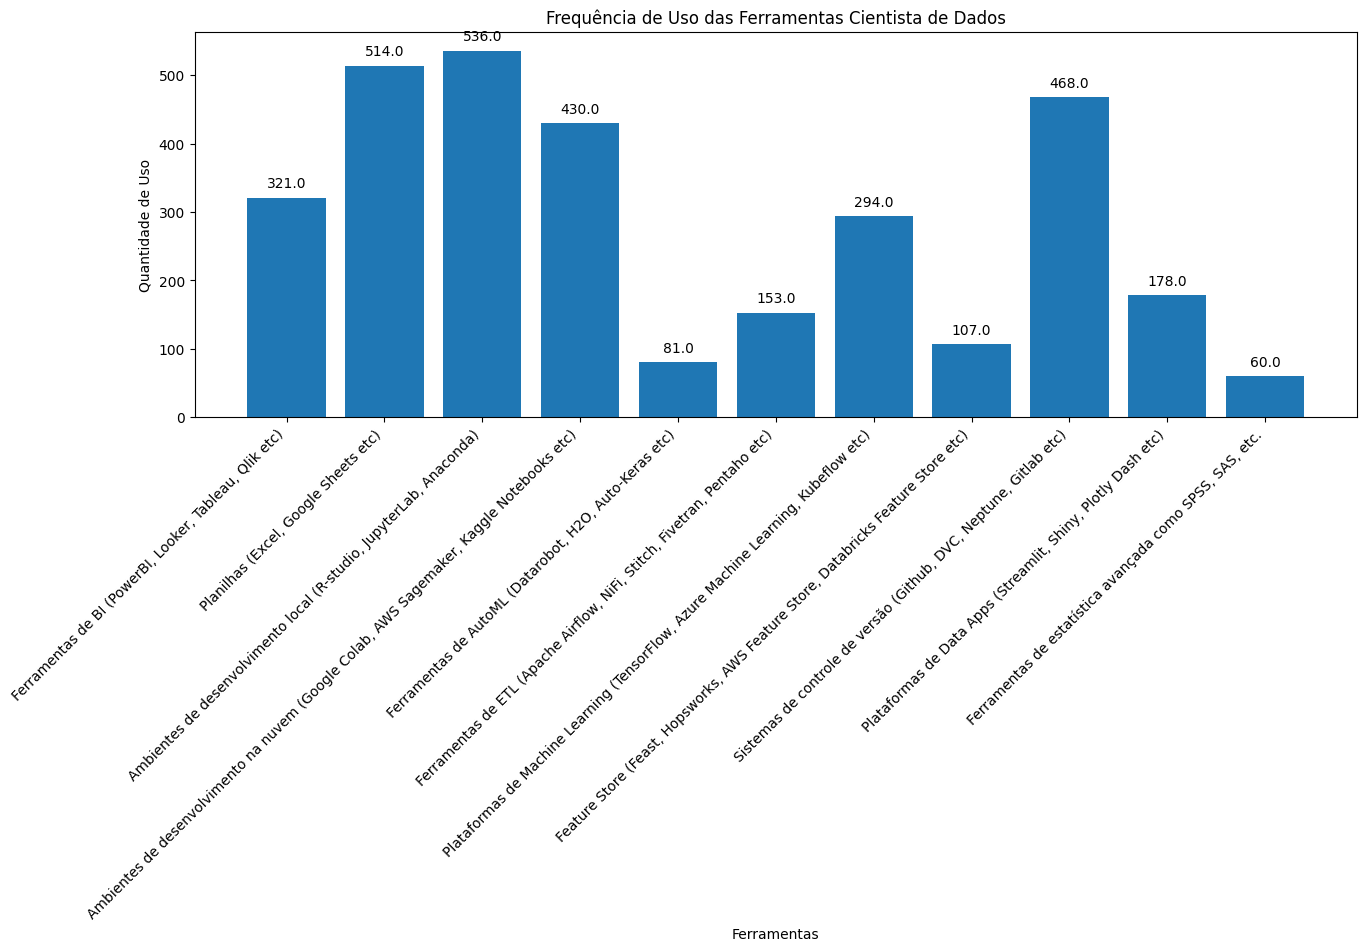

In [192]:
# Criar o gráfico de barras
plt.figure(figsize=(15, 5))
plt.bar(ferramentas_c_dados, soma_ferramentas3)

# Configurar o título e os rótulos dos eixos
plt.title("Frequência de Uso das Ferramentas Cientista de Dados")
plt.xlabel("Ferramentas")
plt.ylabel("Quantidade de Uso")

# Adicionar os valores acima de cada barra
for i, v in enumerate(soma_ferramentas3):
    plt.text(i, v + 10, str(v), ha='center', va='bottom') # Ajustar '10' para posicionar o texto

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [193]:
conhecim_ciencias_dados['Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?'].value_counts()

Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?
Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  19
Nenhuma das opções listadas refletem meu dia a dia.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            16
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio., Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem., Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados., Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).                                                                                                                                                                                                                                                                 15
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  14
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio., Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem., Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados., Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados)., Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.                                                                                                         

In [194]:
conhecim_ciencias_dados['Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?'].value_counts()

Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?
Utilizo modelos de regressão (linear, logística, GLM).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               23
Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatística) para analisar dados.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   18
Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             14
Utilizo modelos de regressão (linear, logística, GLM)., Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação., Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatística) para analisar dados., Utilizo técnicas de Clusterização (K-means, Spectral, DBScan etc)., Realizo previsões através de modelos de Séries Temporais (Time Series).                                                                                                                                                                                                                    13
Utilizo modelos de regressão (linear, logística, GLM)., Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     11
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [195]:
# Contagem das atividades avançadas
cont_atividades_avancadas = conhecim_ciencias_dados[[
    'Utilizo modelos de regressão (linear, logística, GLM)',
  'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação',
  'Desenvolvo sistemas de recomendação (RecSys)',
  'Utilizo métodos estatísticos Bayesianos para analisar dados',
  'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados',
  'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados',
  "Utilizo cadeias de Markov ou HMM's para realizar análises de dados",
  'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)',
  'Realizo previsões através de modelos de Séries Temporais (Time Series)',
  'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)',
  'Utilizo modelos de Machine Learning para detecção de fraude',
  'Utilizo métodos de Visão Computacional',
  'Utilizo modelos de Detecção de Churn',
  "Utilizo LLM's para solucionar problemas de negócio"
]].sum()

# Total de respostas
total_atividades_avancadas = cont_atividades_avancadas.sum()

# Calcular a porcentagem para cada atividade
proporcao_atividades_avancadas = (cont_atividades_avancadas / total_atividades_avancadas) * 100

# Exibir a proporção das atividades avançadas em porcentagem
print("Proporção das Atividades Avançadas em Ciência de Dados:")
print(f"{'Atividade':<40} {'Contagem':<10} {'Percentual':<10}")
print("-" * 60)
for atividade, contagem in cont_atividades_avancadas.items():
    percentual = proporcao_atividades_avancadas[atividade]
    print(f"{atividade:<40} {contagem:<10} {percentual:.2f}%")


Proporção das Atividades Avançadas em Ciência de Dados:
Atividade                                Contagem   Percentual
------------------------------------------------------------
Utilizo modelos de regressão (linear, logística, GLM) 550.0      16.59%
Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação 454.0      13.70%
Desenvolvo sistemas de recomendação (RecSys) 81.0       2.44%
Utilizo métodos estatísticos Bayesianos para analisar dados 185.0      5.58%
Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados 253.0      7.63%
Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados 413.0      12.46%
Utilizo cadeias de Markov ou HMM's para realizar análises de dados 44.0       1.33%
Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc) 403.0      12.16%
Realizo previsões através de modelos de Séri

In [196]:
conhecim_ciencias_dados['Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?'].value_counts()
#

Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?
Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)., Planilhas (Excel, Google Sheets etc)., Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda).                                                                                                                                                                                                                                                                                                                                                                                                   19
Planilhas (Excel, Google Sheets etc)., Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)., Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc).                                                                                                                                                                                                                                                                                                                                                                                        18
Planilhas (Excel, Google Sheets etc)., Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)., Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)., Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc).                                                                                                                                                                                                                                                                                            16
Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)., Planilhas (Excel, Google Sheets etc)., Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)., Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc).                                                                                                                                                                                                                                                                                                       15
Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)., Planilhas (Excel, Google Sheets etc)., Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)., Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc).                                                                                                                                                                                                                                                                                                                               13
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ..
Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)., Planilhas (Excel, Google Sheets etc)., Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)., Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)., Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc).                                                                                                                                                                                                                                                      1
Plataformas de Data Apps (Streamlit, Shiny,

In [197]:
# Contagem das ferramentas e plataformas
cont_ferramentas_plataformas = conhecim_ciencias_dados[[
    'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)',
    'Planilhas (Excel, Google Sheets etc)',
    'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)',
    'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)',
    'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)',
    'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)',
    'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)',
    'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)',
    'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)',
    'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)',
    'Ferramentas de estatística avançada como SPSS, SAS, etc.']].sum()

# Total de respostas
total_ferramentas_plataformas = cont_ferramentas_plataformas.sum()

# Calcular a porcentagem para cada ferramenta e plataforma
proporcao_ferramentas_plataformas = (cont_ferramentas_plataformas / total_ferramentas_plataformas) * 100

# Exibir a proporção das ferramentas e plataformas em porcentagem e contagem
print("Proporção das Ferramentas e Plataformas em Ciência de Dados:")
print(f"{'Ferramenta/Plataforma':<40} {'Contagem':<10} {'Percentual':<10}")
print("-" * 60)
for ferramenta, contagem in cont_ferramentas_plataformas.items():
    percentual = proporcao_ferramentas_plataformas[ferramenta]
    print(f"{ferramenta:<40} {contagem:<10} {percentual:.2f}%")


Proporção das Ferramentas e Plataformas em Ciência de Dados:
Ferramenta/Plataforma                    Contagem   Percentual
------------------------------------------------------------
Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc) 321.0      10.22%
Planilhas (Excel, Google Sheets etc)     514.0      16.36%
Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda) 536.0      17.06%
Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc) 430.0      13.69%
Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc) 81.0       2.58%
Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc) 153.0      4.87%
Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc) 294.0      9.36%
Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc) 107.0      3.41%
Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc) 468.0      14.89%
Plataformas de Data Apps (Streamlit, Shiny, 

In [198]:
conhecim_ciencias_dados['Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?'].value_counts()

Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio., Coletando e limpando dos dados que uso para análise e modelagem.                                                    77
Coletando e limpando dos dados que uso para análise e modelagem., Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).                                                                                                                                 66
Coletando e limpando dos dados que uso para análise e modelagem., Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.                                                                                                                      54
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio., Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).    49
Coletando e limpando dos dados que uso para análise e modelagem.                                                                                                                                                                                                                                                   43
                                                                                                                                                                                                                                                                                                                   ..
Treinando e aplicando LLM's para solucionar problemas de negócio., Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.                                                                                                                      1
Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados., Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.                                                                                     1
Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados., Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.                                                                                    1
Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário., Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.                                                                            1
Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados., Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)                                                                                                                            1
Name: count, Length: 87, dtype: int64

In [199]:
# Contagem das atividades avançadas
new_var = [
    'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.',
    'Coletando e limpando os dados que uso para análise e modelagem.',
    'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.',
    'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).',
    'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.',
    'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.',
    'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.',
    'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.',
    'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.',
    'Criando e gerenciando soluções de Feature Store e cultura de MLOps.',
    'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)',
    "Treinando e aplicando LLM's para solucionar problemas de negócio."
]
cont_atividades_avancadas = conhecim_ciencias_dados[new_var].sum()

# Total de respostas
total_atividades_avancadas = cont_atividades_avancadas.sum()

# Calcular a porcentagem para cada atividade avançada
proporcao_atividades_avancadas = (cont_atividades_avancadas / total_atividades_avancadas) * 100

# Exibir a proporção das atividades avançadas em porcentagem e contagem
print("Proporção das Atividades Avançadas em Ciência de Dados:")
print(f"{'Atividade':<40} {'Contagem':<10} {'Percentual':<10}")
print("-" * 60)
for i in range(len(new_var)):
    atividade = new_var[i]  # Use o índice para pegar o nome da atividade
    contagem = cont_atividades_avancadas[i]
    percentual = proporcao_atividades_avancadas[i]
    print(f"{atividade:<40} {contagem:<10} {percentual:.2f}%")


Proporção das Atividades Avançadas em Ciência de Dados:
Atividade                                Contagem   Percentual
------------------------------------------------------------
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio. 499.0      27.85%
Coletando e limpando os dados que uso para análise e modelagem. 281.0      15.68%
Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados. 342.0      19.08%
Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados). 182.0      10.16%
Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento. 236.0      13.17%
Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário. 53.0   

<ipython-input-199-f420e499f4d6>:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-199-f420e499f4d6>:31: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [200]:

# Selecionar as colunas relevantes
atividades = conhecim_ciencias_dados[[
    'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.',
    'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.',
    'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.',
    'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).',
    'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.',
    'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.',
    'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc',
    'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.',
    'Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.',
    'Crio e gerencio soluções de Feature Store e cultura de MLOps.',
    'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)',
    "Treino e aplico LLM's para solucionar problemas de negócio."
]]


# Converter colunas para números, substituindo não numéricos por NaN e preenchendo com zero
atividades = atividades.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calcular a soma para cada atividade
tempo_dedicado = atividades.sum()

# Exibir a distribuição
print("Distribuição do Tempo Dedicado às Atividades:")
print(tempo_dedicado)




Distribuição do Tempo Dedicado às Atividades:
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.    499.0
Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.    281.0
Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.                                                                                                                436.0
Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.                                                    406.0
Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).                                                 

<ipython-input-201-0533ffc29ddd>:30: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



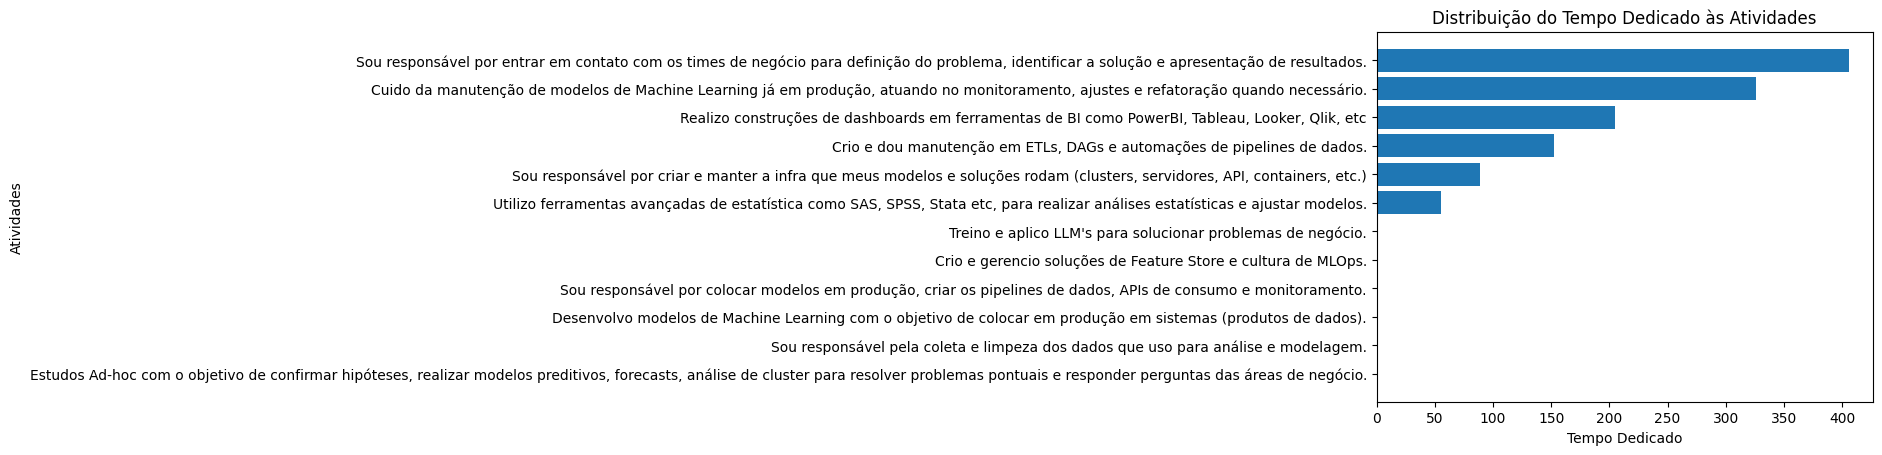

In [201]:
# Dados do tempo dedicado
tempo_dedicado = {
    'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.': 406.0,
    'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.': 326.0,
    'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc': 205.0,
    'Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.': 152.0,
    'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)': 89.0,
    'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.': 55.0,
    'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.': 0.0,
    'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.': 0.0,
    'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.': 0.0,
    'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).': 0.0,
    'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.': 0.0,
    'Crio e gerencio soluções de Feature Store e cultura de MLOps.': 0.0,
    'Treino e aplico LLM\'s para solucionar problemas de negócio.': 0.0
}

# Ordenar as atividades em ordem decrescente de tempo dedicado
sorted_activities = sorted(tempo_dedicado.items(), key=lambda item: item[1], reverse=False)

# Extrair os nomes das atividades e o tempo dedicado
atividades = [item[0] for item in sorted_activities]
tempo = [item[1] for item in sorted_activities]

# Criar o gráfico
plt.barh(atividades, tempo)
plt.xlabel('Tempo Dedicado')
plt.ylabel('Atividades')
plt.title('Distribuição do Tempo Dedicado às Atividades')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# **🎯 3 - Perguntas Respondidas: Panorama geral**


### 1. Qual o perfil sociodemográfico dos profissionais da área?

In [202]:
# Analise Genero
contagem_Genero = dados_demograficos['Genero'].value_counts()
porcentagem_Genero = dados_demograficos['Genero'].value_counts(normalize=True) * 100

df_Genero = pd.DataFrame({'Contagem': contagem_Genero, 'Porcentagem (%)': porcentagem_Genero.round(2)})
print(df_Genero)

                      Contagem  Porcentagem (%)
Genero                                         
Masculino                 3975            75.10
Feminino                  1293            24.43
Prefiro não informar        16             0.30
Outro                        9             0.17


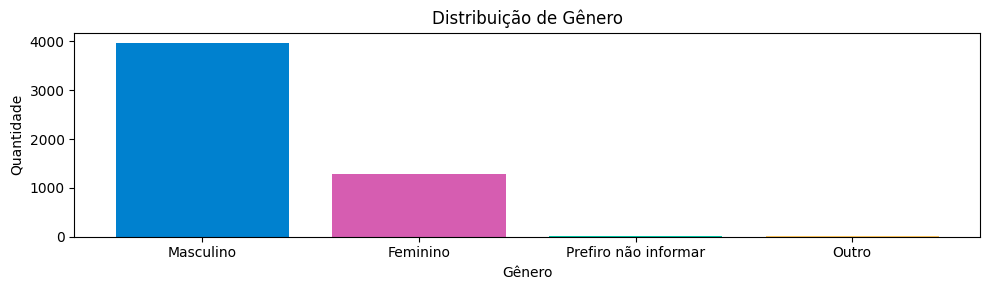

In [203]:
# Criar um gráfico de barras
plt.figure(figsize=(10, 3))
plt.bar(df_Genero.index, df_Genero['Contagem'], color=['#0081CF', '#D65Db1','#00C9A7','#FFC75F'])
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [204]:
#Media e moda  das idades
# Média de idade
media_idade = dados_demograficos['Idade'].mean()

# Idade mais frequente (moda)
moda_idade = dados_demograficos['Idade'].mode()[0]

# Percentual da moda
percentual_moda_idade = (dados_demograficos['Idade'].value_counts(normalize=True).loc[moda_idade]) * 100

# Idade mínima e máxima
idade_min = dados_demograficos['Idade'].min()
idade_max = dados_demograficos['Idade'].max()

# Calculando a faixa total de idades
faixa_idade = idade_max - idade_min

# Percentuais das idades mínima e máxima
percentual_idade_min = ((idade_min - idade_min) / faixa_idade) * 100
percentual_idade_max = ((idade_max - idade_min) / faixa_idade) * 100

# Exibir os resultados
print(f'Média de idade: {media_idade:.0f}')
print(f'Moda (idade mais frequente): {moda_idade} ({percentual_moda_idade:.1f}%)')
print(f'Idade mínima: {idade_min} ({percentual_idade_min:.1f}%)')
print(f'Idade máxima: {idade_max} ({percentual_idade_max:.1f}%)')

Média de idade: 32
Moda (idade mais frequente): 27 (7.1%)
Idade mínima: 18 (0.0%)
Idade máxima: 73 (100.0%)


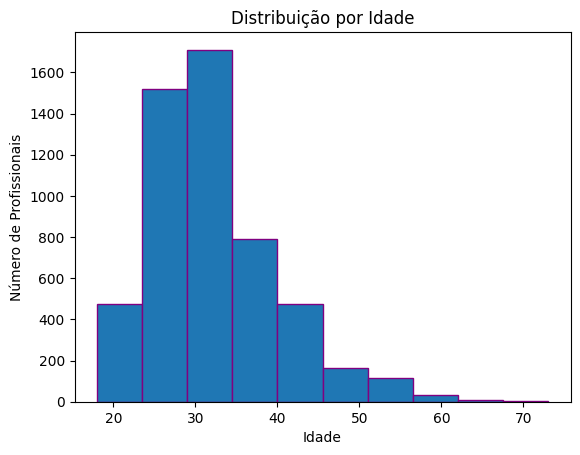

In [205]:
# Distribuição por Idade
dados_demograficos['Idade'].plot(kind='hist', bins=10, edgecolor='purple')
plt.title('Distribuição por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Profissionais')
plt.show()

In [206]:
# Analise Cor/raca/etnia
contagem_cor = dados_demograficos['Cor/raca/etnia'].value_counts()
porcentagem_cor = dados_demograficos['Cor/raca/etnia'].value_counts(normalize=True) * 100

df_cor = pd.DataFrame({'Contagem': contagem_cor, 'Porcentagem (%)': porcentagem_cor.round(2)})
print(df_cor)

                      Contagem  Porcentagem (%)
Cor/raca/etnia                                 
Branca                    3414            64.50
Parda                     1281            24.20
Preta                      387             7.31
Amarela                    147             2.78
Prefiro não informar        34             0.64
Outra                       18             0.34
Indígena                    12             0.23


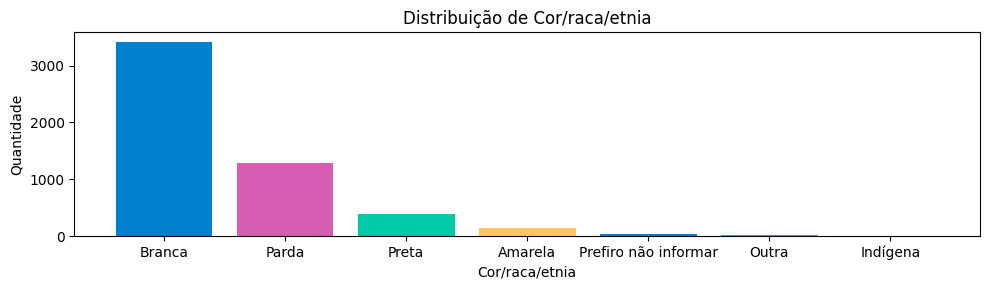

In [207]:
# Criar um gráfico de barras
plt.figure(figsize=(10, 3))
plt.bar(df_cor.index, df_cor['Contagem'], color=['#0081CF', '#D65Db1','#00C9A7','#FFC75F'])
plt.title('Distribuição de Cor/raca/etnia')
plt.xlabel('Cor/raca/etnia')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [208]:
tabela_frequencia = pd.crosstab(dados_demograficos['Cor/raca/etnia'], dados_demograficos['Genero'])
print(tabela_frequencia)

Genero                Feminino  Masculino  Outro  Prefiro não informar
Cor/raca/etnia                                                        
Amarela                     41        105      0                     1
Branca                     836       2564      7                     7
Indígena                     4          8      0                     0
Outra                        2         15      0                     1
Parda                      297        983      1                     0
Prefiro não informar         9         19      0                     6
Preta                      104        281      1                     1


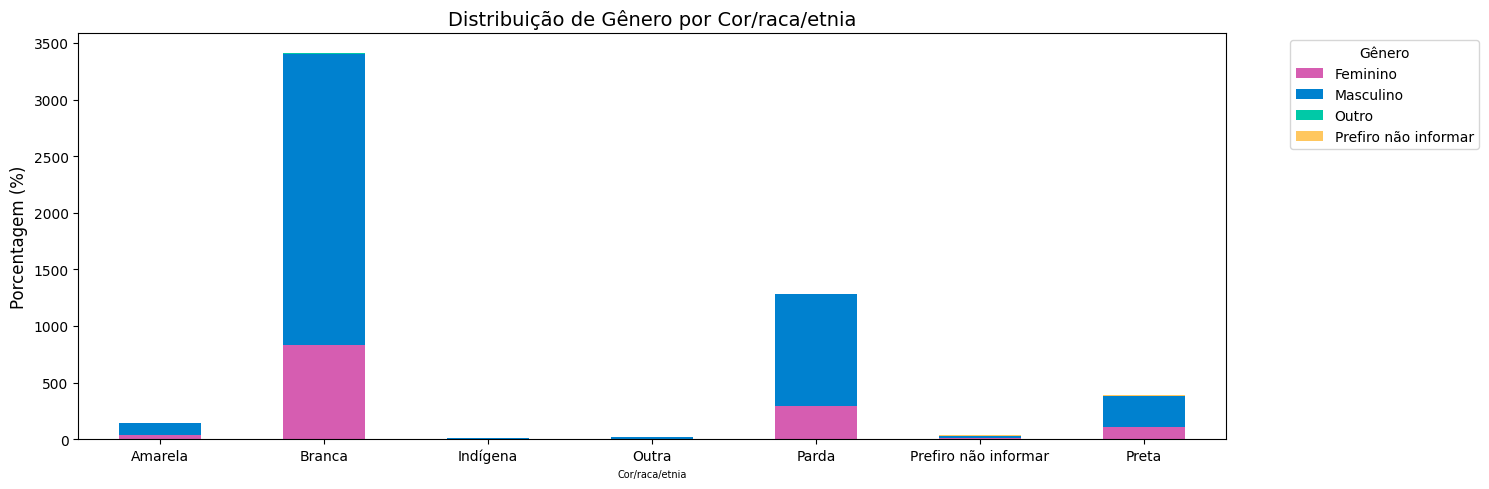

In [209]:
ax = tabela_frequencia.plot(kind='bar', rot=0, figsize=(15, 5), stacked=True, color=['#D65Db1', '#0081CF','#00C9A7','#FFC75F'])
plt.title('Distribuição de Gênero por Cor/raca/etnia', fontsize=14)
plt.xlabel('Cor/raca/etnia', fontsize=7)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [210]:
# Contagem de valores de PCD e normalização para percentual
pcd_dist = dados_demograficos['PCD'].value_counts(normalize=True) * 100

# Distribuição por gênero entre as pessoas com deficiência
pcd_genero_dist = dados_demograficos[dados_demograficos['PCD'] == 'Sim']['Genero'].value_counts(normalize=True) * 100

print("PCD:")
for pcd, percentual in pcd_dist.items():
    print(f"{pcd}: {percentual:.2f}%")

print("\nDistribuição por gênero entre as pessoas com deficiência:")
for genero, percentual in pcd_genero_dist.items():
    print(f"{genero}: {percentual:.2f}%")

PCD:
Não: 97.41%
Sim: 2.10%
Prefiro não informar: 0.49%

Distribuição por gênero entre as pessoas com deficiência:
Masculino: 67.57%
Feminino: 32.43%


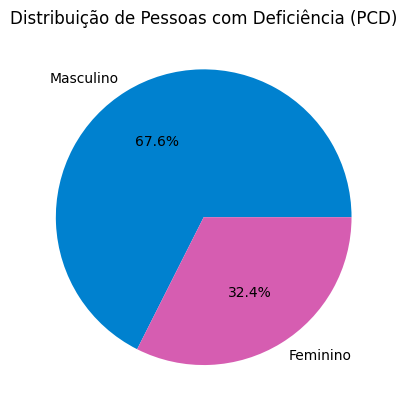

In [211]:
#Distribuição PCD
pcd_genero_dist .plot(kind='pie', autopct='%1.1f%%', colors=['#0081CF', '#D65Db1'])
plt.title('Distribuição de Pessoas com Deficiência (PCD)')
plt.ylabel('')
plt.show()

In [212]:
#Distribuicao por regiao
# Contagem de valores de região e normalização para percentual
regiao_dist = dados_demograficos['Regiao onde mora'].value_counts(normalize=True) * 100
print("Região:")
for regiao, percentual in regiao_dist.items():
    print(f"{regiao}: {percentual:.2f}%")

Região:
Sudeste: 61.39%
Sul: 18.59%
Nordeste: 11.76%
Centro-oeste: 6.66%
Norte: 1.61%


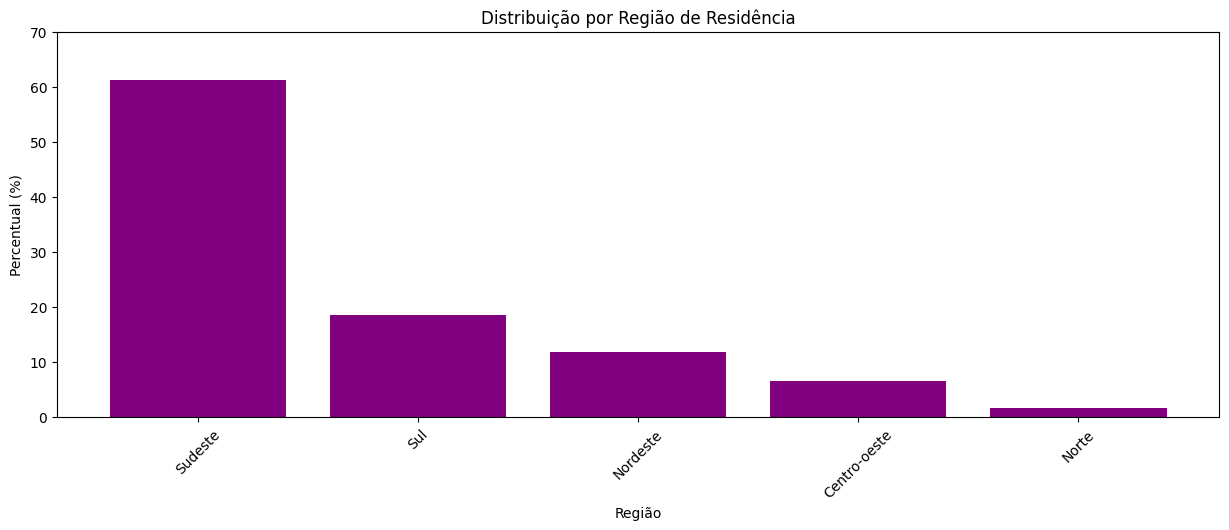

In [213]:
# Criar o gráfico de barras
plt.figure(figsize=(15, 5))
plt.bar(regiao_dist.index, regiao_dist.values, color='purple')
plt.title('Distribuição por Região de Residência')
plt.xlabel('Região')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.ylim(0, 70)  # Ajustar o limite do eixo y para dar mais clareza aos dados
plt.show()

In [214]:
# Calcula a contagem por estado
uf_counts = dados_demograficos['uf onde mora'].value_counts().reset_index()
uf_counts.columns = ['UF', 'count']  # Renomeia a coluna para 'UF'

# Cria o mapa de cloropleto com Plotly Express
fig = px.choropleth(
    uf_counts,
    geojson="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson",
    locations='UF',  # Usa 'UF' para fazer o match com o GeoJSON
    featureidkey='properties.sigla',
    color='count',
    color_continuous_scale='Agsunset',
    range_color=[uf_counts['count'].min(), uf_counts['count'].max()],  # Definir limites de cor
    scope='south america',
    title='Quantidade de profissionais de dados por UF'
)

# Ajusta as dimensões do gráfico
fig.update_layout(
    width=1200,  # Largura do gráfico em pixels
    height=800   # Altura do gráfico em pixels
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [215]:
# Distribuição de grau de escolaridade
escolaridade_dist = dados_demograficos['Nivel de Ensino'].value_counts(normalize=True) * 100
print("Distribuição de Grau de Escolaridade:")
for escolaridade, percentual in escolaridade_dist.items():
    print(f"{escolaridade}: {percentual:.2f}%")



Distribuição de Grau de Escolaridade:
Pós-graduação: 34.35%
Graduação/Bacharelado: 33.97%
Estudante de Graduação: 12.81%
Mestrado: 12.77%
Doutorado ou Phd: 3.97%
Não tenho graduação formal: 1.98%
Prefiro não informar: 0.15%


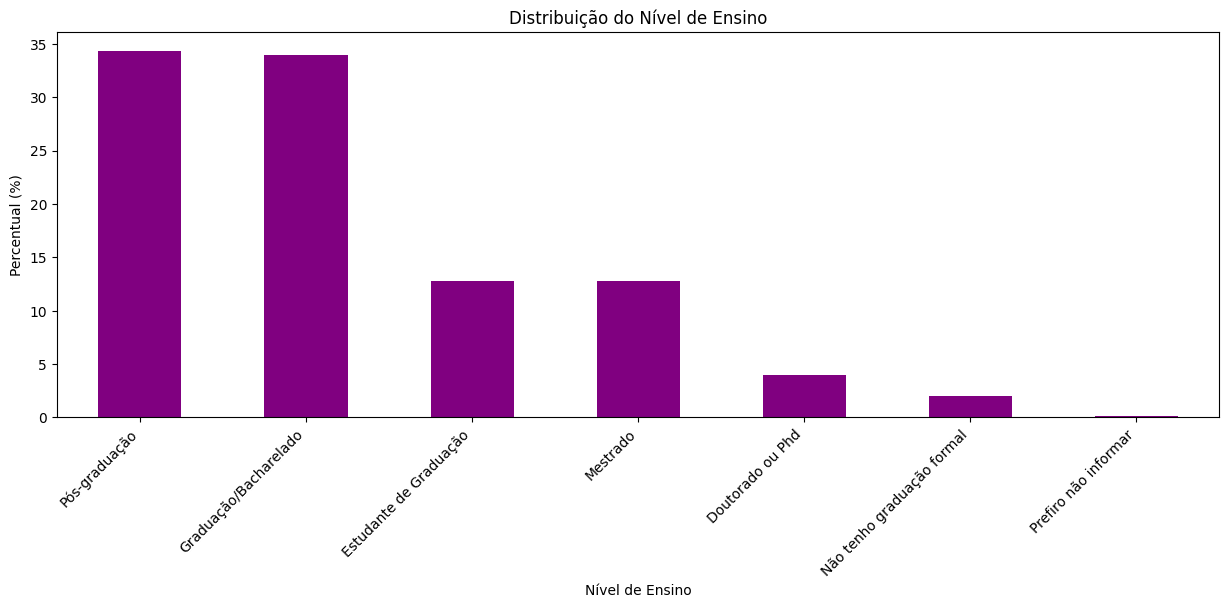

In [216]:
  # Criar o gráfico de barras

plt.figure(figsize=(15, 5))
escolaridade_dist.plot(kind='bar', color='purple')
plt.title('Distribuição do Nível de Ensino')
plt.xlabel('Nível de Ensino')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [217]:
# Contagem de valores da área de formação e normalização para percentual
formacao_dist = dados_demograficos['Área de Formação'].value_counts(normalize=True) * 100
print("Distribuição da Área de Formação:")
for formacao, percentual in formacao_dist.items():
    print(f"{formacao}: {percentual:.2f}%")

Distribuição da Área de Formação:
Computação / Engenharia de Software / Sistemas de Informação/ TI: 41.58%
Outras Engenharias: 20.81%
Economia/ Administração / Contabilidade / Finanças/ Negócios: 15.71%
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais: 7.26%
Outra opção: 5.54%
Química / Física: 2.57%
Marketing / Publicidade / Comunicação / Jornalismo: 2.51%
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde: 2.39%
Ciências Sociais: 1.62%


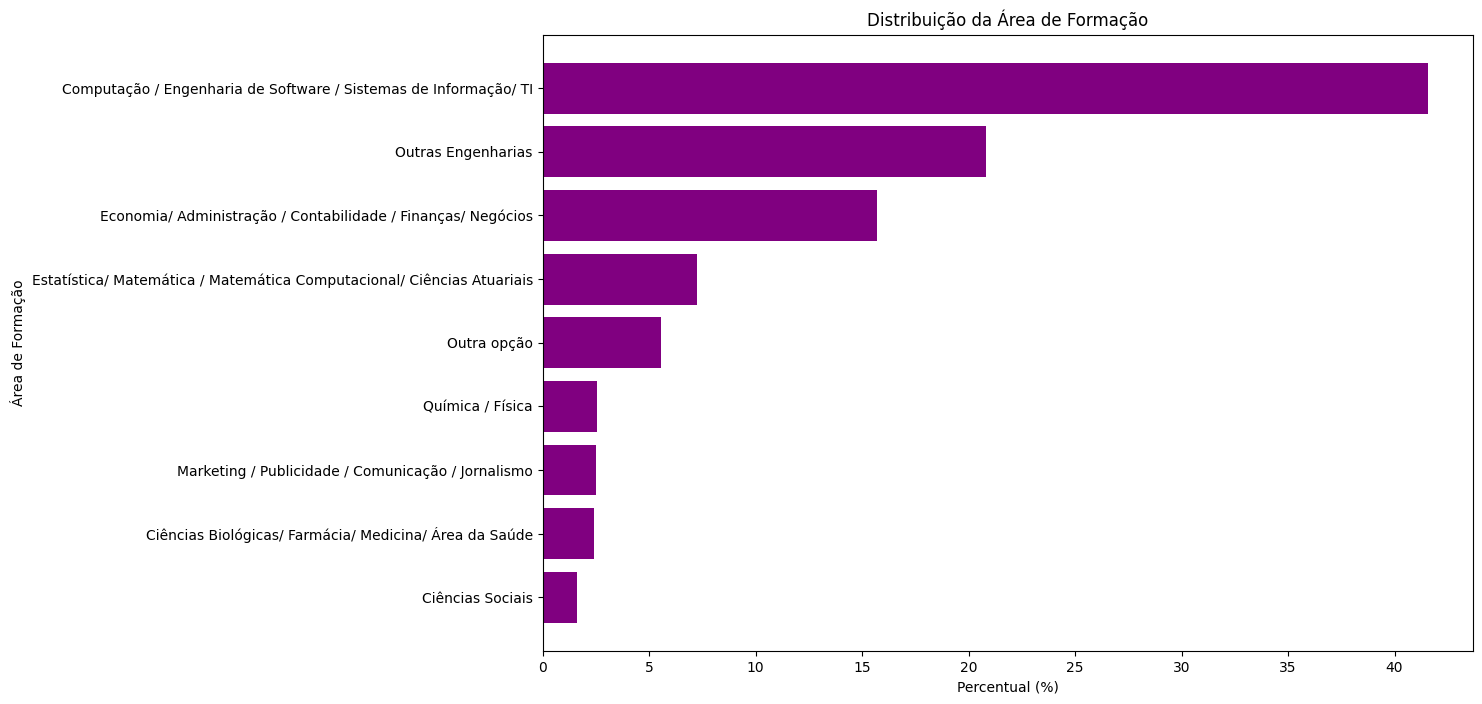

In [218]:
# Criar o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
plt.barh(formacao_dist.index, formacao_dist.values, color='purple')
plt.title('Distribuição da Área de Formação')
plt.xlabel('Percentual (%)')
plt.ylabel('Área de Formação')
plt.gca().invert_yaxis()  # Inverter o eixo Y para mostrar a maior porcentagem no topo
plt.show()

In [219]:
# Tabela cruzada entre Nivel_Ensino e Gênero com percentuais
tabela_cruzada = pd.crosstab(dados_demograficos['Nivel de Ensino'], dados_demograficos['Genero'], normalize='index') * 100

# Resetando o índice para transformar a tabela cruzada em um DataFrame tabular
tabela_cruzada_reset = tabela_cruzada.reset_index()

# Exibindo a tabela cruzada de forma tabular
print("Tabela Cruzada entre Nivel_Ensino e Gênero:")
print(tabela_cruzada_reset.to_string(index=False, float_format="{:.2f}%".format))

Tabela Cruzada entre Nivel_Ensino e Gênero:
           Nivel de Ensino  Feminino  Masculino  Outro  Prefiro não informar
          Doutorado ou Phd    34.29%     65.24%  0.00%                 0.48%
    Estudante de Graduação    19.47%     79.94%  0.44%                 0.15%
     Graduação/Bacharelado    22.86%     76.53%  0.28%                 0.33%
                  Mestrado    28.99%     70.41%  0.00%                 0.59%
Não tenho graduação formal    19.05%     80.95%  0.00%                 0.00%
      Prefiro não informar     0.00%    100.00%  0.00%                 0.00%
             Pós-graduação    25.41%     74.31%  0.06%                 0.22%


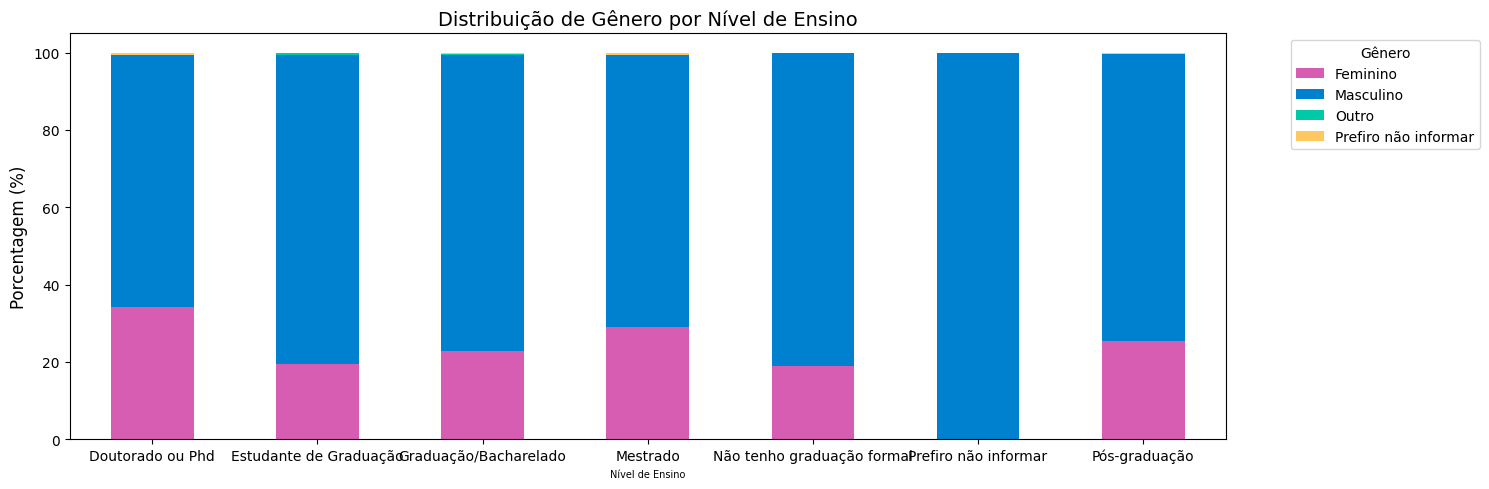

In [220]:
# Criando o gráfico de barras empilhadas
ax = tabela_cruzada.plot(kind='bar', rot=0, figsize=(15, 5), stacked=True, color=['#D65Db1', '#0081CF','#00C9A7','#FFC75F'])
plt.title('Distribuição de Gênero por Nível de Ensino', fontsize=14)
plt.xlabel('Nível de Ensino', fontsize=7)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [221]:
# Tabela cruzada entre Nivel_Ensino e Regiao_Mora com percentuais
tabela_cruzada2 = pd.crosstab(dados_demograficos['Nivel de Ensino'], dados_demograficos['Regiao onde mora'], normalize='index') * 100

# Exibindo a tabela cruzada de forma tabular
print("Tabela Cruzada entre Nivel_Ensino e Região com Percentuais:")
print(tabela_cruzada2.to_string(float_format="{:.2f}%".format))

Tabela Cruzada entre Nivel_Ensino e Região com Percentuais:
Regiao onde mora            Centro-oeste  Nordeste  Norte  Sudeste    Sul
Nivel de Ensino                                                          
Doutorado ou Phd                   7.80%    15.12%  1.46%   55.61% 20.00%
Estudante de Graduação             7.11%    18.37%  1.33%   54.22% 18.96%
Graduação/Bacharelado              6.06%    10.31%  1.47%   65.63% 16.53%
Mestrado                           6.48%    14.53%  1.74%   57.19% 20.06%
Não tenho graduação formal         6.00%    12.00%  7.00%   58.00% 17.00%
Prefiro não informar              14.29%    14.29%  0.00%   57.14% 14.29%
Pós-graduação                      7.01%     9.31%  1.51%   62.25% 19.91%


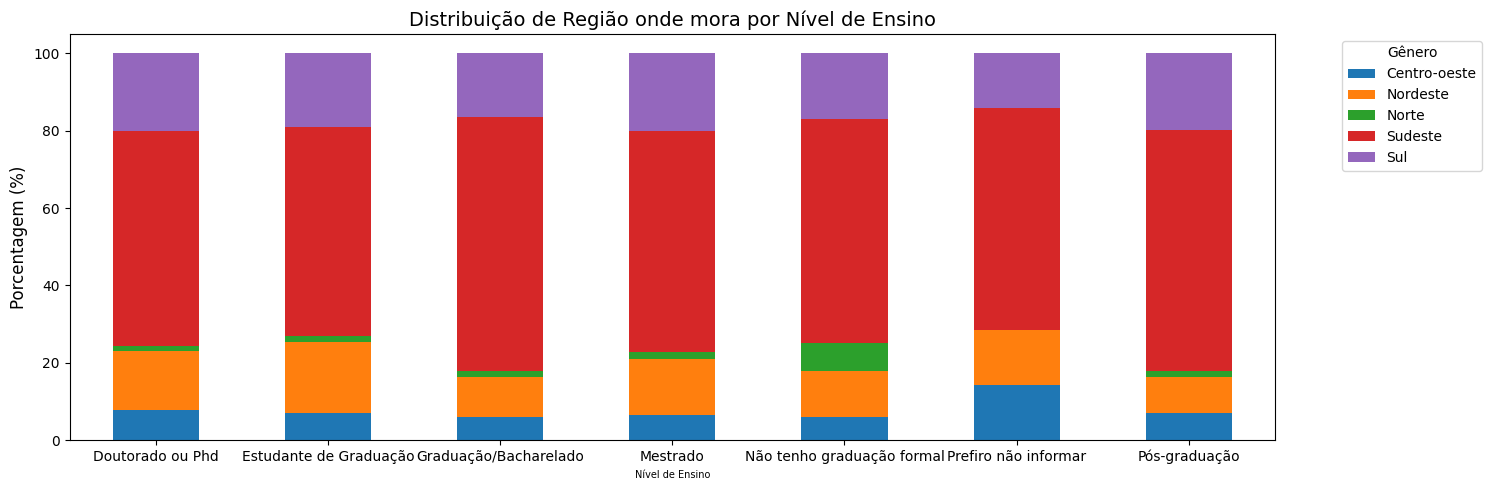

In [222]:
# Criando o gráfico de barras empilhadas
ax = tabela_cruzada2.plot(kind='bar', rot=0, figsize=(15, 5), stacked=True)
plt.title('Distribuição de Região onde mora por Nível de Ensino', fontsize=14)
plt.xlabel('Nível de Ensino', fontsize=7)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [223]:
# Tabela cruzada entre Nivel_Ensino e Cor_Raca_Etnia com percentuais
tabela_cruzada3 = pd.crosstab(dados_demograficos['Nivel de Ensino'], dados_demograficos['Cor/raca/etnia'], normalize='index') * 100

# Exibindo a tabela cruzada de forma tabular
print("Tabela Cruzada entre Nivel_Ensino e Cor/Raca/Etnia com Percentuais:")
print(tabela_cruzada3.to_string(float_format="{:.2f}%".format))

Tabela Cruzada entre Nivel_Ensino e Cor/Raca/Etnia com Percentuais:
Cor/raca/etnia              Amarela  Branca  Indígena  Outra  Parda  Prefiro não informar  Preta
Nivel de Ensino                                                                                 
Doutorado ou Phd              2.38%  71.43%     0.48%  0.00% 21.43%                 0.48%  3.81%
Estudante de Graduação        2.65%  58.41%     0.29%  0.29% 26.99%                 0.59% 10.77%
Graduação/Bacharelado         2.89%  63.63%     0.22%  0.39% 24.81%                 0.72%  7.34%
Mestrado                      2.96%  69.38%     0.00%  0.59% 20.56%                 1.04%  5.47%
Não tenho graduação formal    0.95%  60.95%     0.95%  0.95% 26.67%                 0.00%  9.52%
Prefiro não informar          0.00%  50.00%     0.00%  0.00% 37.50%                 0.00% 12.50%
Pós-graduação                 2.81%  65.29%     0.22%  0.22% 24.04%                 0.50%  6.93%


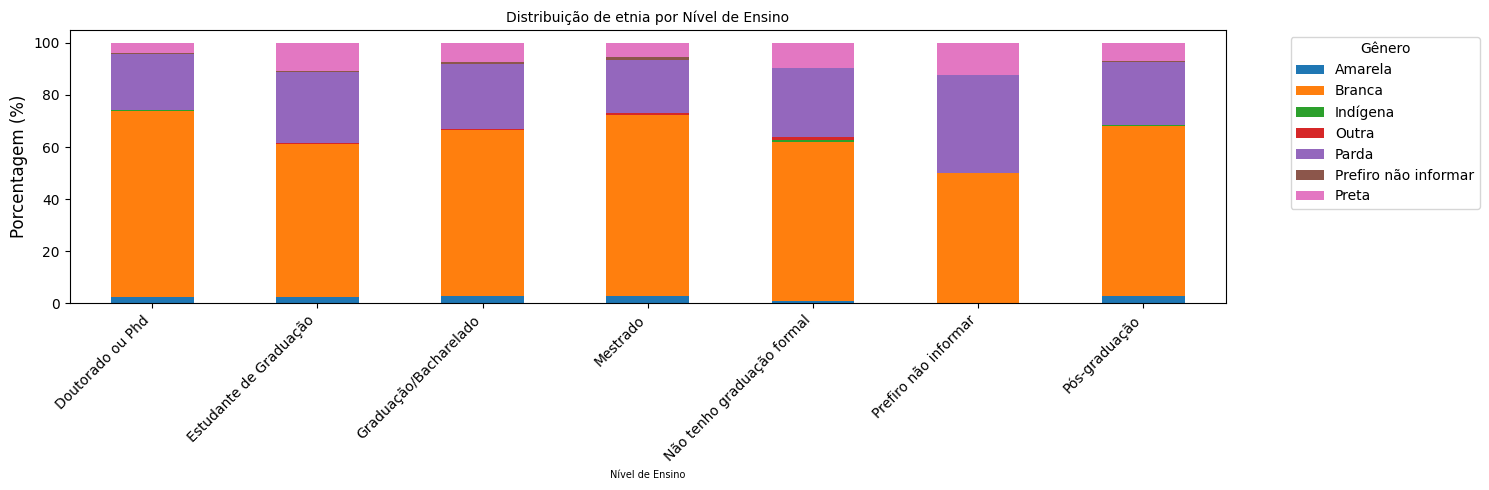

In [224]:
# Criando o gráfico de barras empilhadas
ax = tabela_cruzada3.plot(kind='bar', rot=0, figsize=(15, 5), stacked=True)
plt.title('Distribuição de etnia por Nível de Ensino', fontsize=10)
plt.xlabel('Nível de Ensino', fontsize=7)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Em resumo:

### 2. Qual é a remuneração dos profissionais?

In [225]:
# Analise Faixa salarial
contagem_fsalarial = dados_carreira['Faixa salarial'].value_counts()
porcentagem_fsalarial = dados_carreira['Faixa salarial'].value_counts(normalize=True) * 100

df_fsalarial = pd.DataFrame({'Contagem': contagem_fsalarial, 'Porcentagem (%)': porcentagem_fsalarial.round(2)})
print(df_fsalarial)

                                  Contagem  Porcentagem (%)
Faixa salarial                                             
de R$ 8.001/mês a R$ 12.000/mês       1026            21.59
de R$ 4.001/mês a R$ 6.000/mês         745            15.67
de R$ 12.001/mês a R$ 16.000/mês       650            13.68
de R$ 6.001/mês a R$ 8.000/mês         637            13.40
de R$ 3.001/mês a R$ 4.000/mês         352             7.41
de R$ 16.001/mês a R$ 20.000/mês       328             6.90
de R$ 2.001/mês a R$ 3.000/mês         288             6.06
de R$ 1.001/mês a R$ 2.000/mês         215             4.52
de R$ 20.001/mês a R$ 25.000/mês       195             4.10
de R$ 25.001/mês a R$ 30.000/mês       128             2.69
de R$ 30.001/mês a R$ 40.000/mês        86             1.81
Acima de R$ 40.001/mês                  72             1.51
Menos de R$ 1.000/mês                   30             0.63
de R$ 101/mês a R$ 2.000/mês             1             0.02


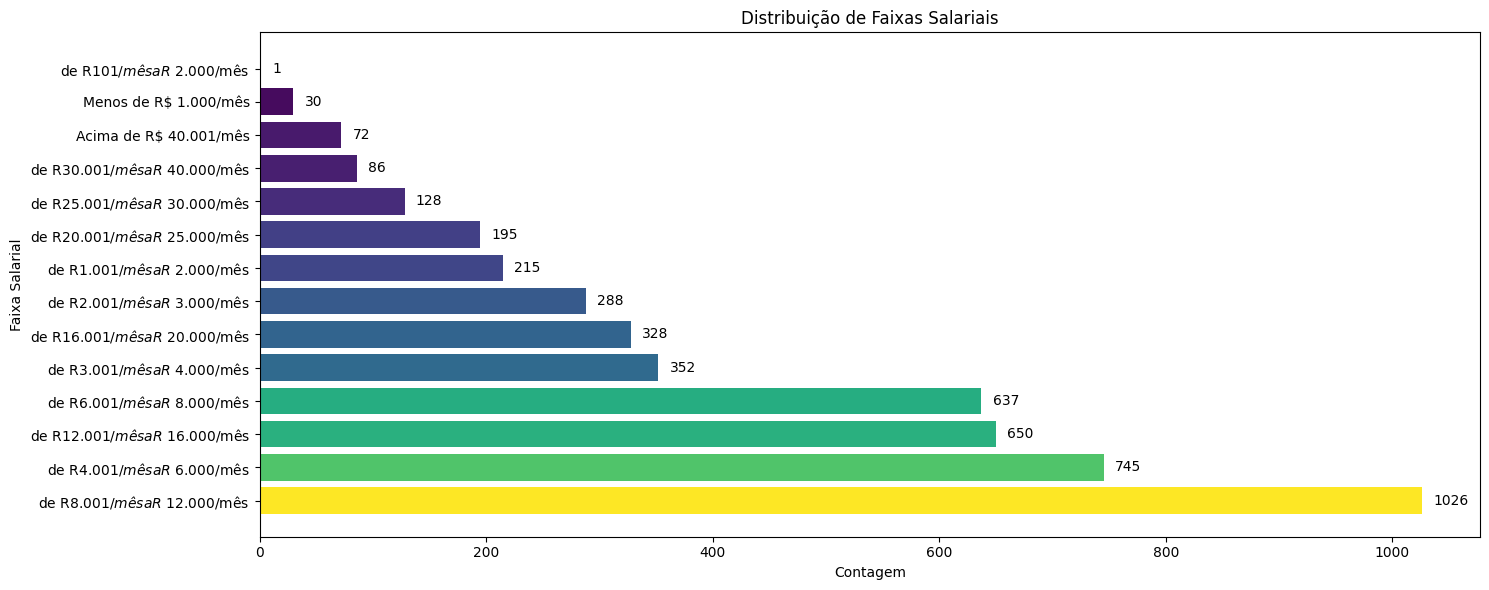

In [226]:
# Criando o gráfico de barras horizontais
plt.figure(figsize=(15, 6))
plt.barh(df_fsalarial.index, df_fsalarial['Contagem'], color=cm.viridis(df_fsalarial['Contagem'] / df_fsalarial['Contagem'].max()))  # Aplica colormap 'viridis' com tons diferentes
plt.xlabel('Contagem')
plt.ylabel('Faixa Salarial')
plt.title('Distribuição de Faixas Salariais')
plt.tight_layout()

# Adiciona a quantidade no lado direito de cada barra
for i, v in enumerate(df_fsalarial['Contagem']):
    plt.text(v + 10, i, str(v), ha='left', va='center')

plt.show()

In [227]:
#Base para cada faixa salarial
# Para a faixa salarial 'de R$ 8.001/mês a R$ 12.000/mês'
faixa_1 = dados_carreira[dados_carreira['Faixa salarial'] == 'de R$ 8.001/mês a R$ 12.000/mês']
distrib_faixa_1 = faixa_1['Cargo Atual'].value_counts(normalize=True) * 100
print("Distribuição dos cargos na faixa 'de R$ 8.001/mês a R$ 12.000/mês':")
for cargo, percentual in distrib_faixa_1.items():
    print(f"{cargo}: {percentual:.2f}%")

# Para a faixa salarial 'de R$ 4.001/mês a R$ 6.000/mês'
faixa_2 = dados_carreira[dados_carreira['Faixa salarial'] == 'de R$ 4.001/mês a R$ 6.000/mês']
distrib_faixa_2 = faixa_2['Cargo Atual'].value_counts(normalize=True) * 100
print("\nDistribuição dos cargos na faixa 'de R$ 4.001/mês a R$ 6.000/mês':")
for cargo, percentual in distrib_faixa_2.items():
    print(f"{cargo}: {percentual:.2f}%")

Distribuição dos cargos na faixa 'de R$ 8.001/mês a R$ 12.000/mês':
Cientista de Dados/Data Scientist: 23.11%
Analista de Dados/Data Analyst: 22.22%
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect: 21.00%
Analista de BI/BI Analyst: 9.33%
Analista de Negócios/Business Analyst: 5.00%
Analytics Engineer: 4.22%
Outra Opção: 3.11%
Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO): 3.00%
Engenheiro de Machine Learning/ML Engineer/AI Engineer: 2.44%
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas: 1.89%
DBA/Administrador de Banco de Dados: 1.00%
Outras Engenharias (não inclui dev): 0.89%
Analista de Suporte/Analista Técnico: 0.78%
Analista de Inteligência de Mercado/Market Intelligence: 0.78%
Professor/Pesquisador: 0.67%
Estatístico: 0.33%
Economista: 0.22%

Distribuição dos cargos na faixa 'de R$ 4.001/mês a R$ 6.000/mês':
Analista de Dados/Data Analyst: 31.44%
Analista de BI/BI Analyst: 19.77%
Cientista de Dados/Data Scientist: 12.66%
Engenheiro de Da

In [228]:
tabela_frequencia3 = pd.crosstab(dados_carreira['Faixa salarial'], dados_carreira['Cargo Atual'])
print(tabela_frequencia3)

Cargo Atual                       Analista de BI/BI Analyst  \
Faixa salarial                                                
Acima de R$ 40.001/mês                                    1   
Menos de R$ 1.000/mês                                     4   
de R$ 1.001/mês a R$ 2.000/mês                           47   
de R$ 101/mês a R$ 2.000/mês                              0   
de R$ 12.001/mês a R$ 16.000/mês                         20   
de R$ 16.001/mês a R$ 20.000/mês                          3   
de R$ 2.001/mês a R$ 3.000/mês                           48   
de R$ 20.001/mês a R$ 25.000/mês                          4   
de R$ 25.001/mês a R$ 30.000/mês                          3   
de R$ 3.001/mês a R$ 4.000/mês                           61   
de R$ 30.001/mês a R$ 40.000/mês                          1   
de R$ 4.001/mês a R$ 6.000/mês                          139   
de R$ 6.001/mês a R$ 8.000/mês                           91   
de R$ 8.001/mês a R$ 12.000/mês                        

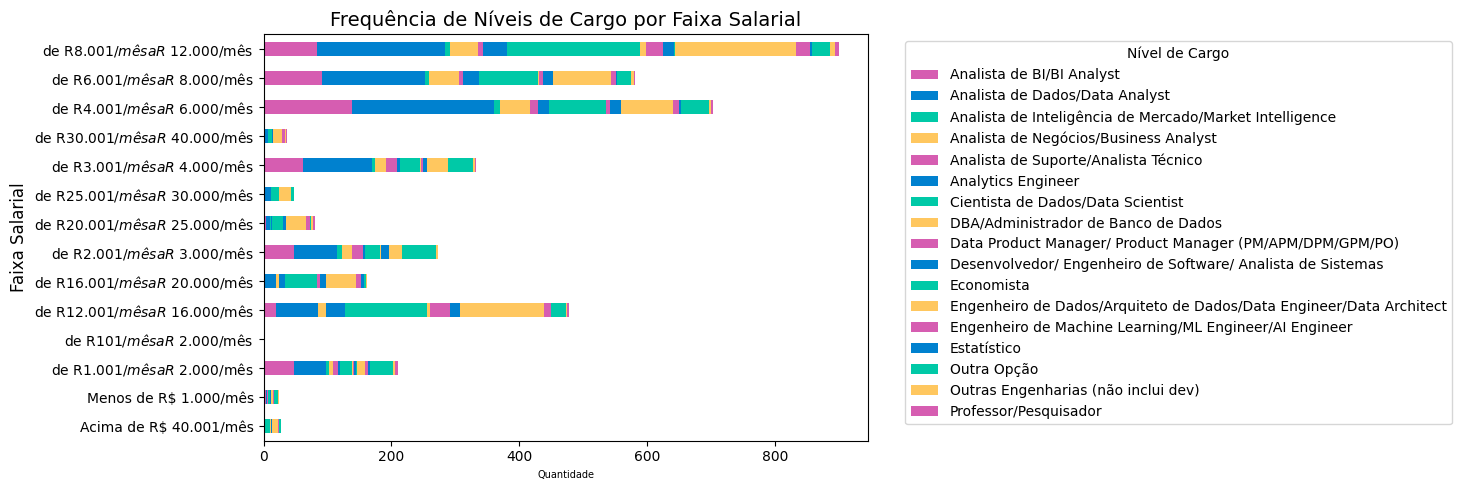

In [229]:
# Criar o gráfico de barras horizontal
ax = tabela_frequencia3.plot(kind='barh', rot=0, figsize=(15, 5), stacked=True, color=['#D65Db1', '#0081CF','#00C9A7','#FFC75F'])

plt.title('Frequência de Níveis de Cargo por Faixa Salarial', fontsize=14)
plt.xlabel('Quantidade', fontsize=7) # Ajustar o rótulo do eixo x para 'Quantidade'
plt.ylabel('Faixa Salarial', fontsize=12) # Ajustar o rótulo do eixo y para 'Faixa Salarial'
plt.legend(title='Nível de Cargo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [230]:
# Para a faixa salarial 'de R$ 8.001/mês a R$ 12.000/mês'
faixa_1 = dados_carreira[dados_carreira['Faixa salarial'] == 'de R$ 8.001/mês a R$ 12.000/mês']
distrib_nivel_faixa_1 = faixa_1['NOVO NIVEL'].value_counts(normalize=True) * 100

print("Distribuição dos níveis na faixa 'de R$ 8.001/mês a R$ 12.000/mês':")
for nivel, percentual in distrib_nivel_faixa_1.items():
    print(f"{nivel}: {percentual:.2f}%")

# Para a faixa salarial 'de R$ 4.001/mês a R$ 6.000/mês'
faixa_2 = dados_carreira[dados_carreira['Faixa salarial'] == 'de R$ 4.001/mês a R$ 6.000/mês']
distrib_nivel_faixa_2 = faixa_2['NOVO NIVEL'].value_counts(normalize=True) * 100

print("\nDistribuição dos níveis na faixa 'de R$ 4.001/mês a R$ 6.000/mês':")
for nivel, percentual in distrib_nivel_faixa_2.items():
    print(f"{nivel}: {percentual:.2f}%")


Distribuição dos níveis na faixa 'de R$ 8.001/mês a R$ 12.000/mês':
Sênior: 49.32%
Pleno: 34.21%
Gestor: 12.28%
Júnior: 4.19%

Distribuição dos níveis na faixa 'de R$ 4.001/mês a R$ 6.000/mês':
Pleno: 47.79%
Júnior: 39.46%
Sênior: 7.11%
Gestor: 5.64%


In [231]:
tabela_frequencia4 = pd.crosstab(dados_carreira['Faixa salarial'], dados_carreira['NOVO NIVEL'])
print(tabela_frequencia4)

NOVO NIVEL                        Gestor  Júnior  Pleno  Sênior
Faixa salarial                                                 
Acima de R$ 40.001/mês                44       0      2      26
Menos de R$ 1.000/mês                  5      22      3       0
de R$ 1.001/mês a R$ 2.000/mês         5     193     16       1
de R$ 101/mês a R$ 2.000/mês           0       1      0       0
de R$ 12.001/mês a R$ 16.000/mês     172       5     80     393
de R$ 16.001/mês a R$ 20.000/mês     166       3     20     139
de R$ 2.001/mês a R$ 3.000/mês        15     211     52      10
de R$ 20.001/mês a R$ 25.000/mês     115       0      7      73
de R$ 25.001/mês a R$ 30.000/mês      81       0      7      40
de R$ 3.001/mês a R$ 4.000/mês        19     195    126      12
de R$ 30.001/mês a R$ 40.000/mês      50       0      3      33
de R$ 4.001/mês a R$ 6.000/mês        42     294    356      53
de R$ 6.001/mês a R$ 8.000/mês        56      79    369     133
de R$ 8.001/mês a R$ 12.000/mês      126

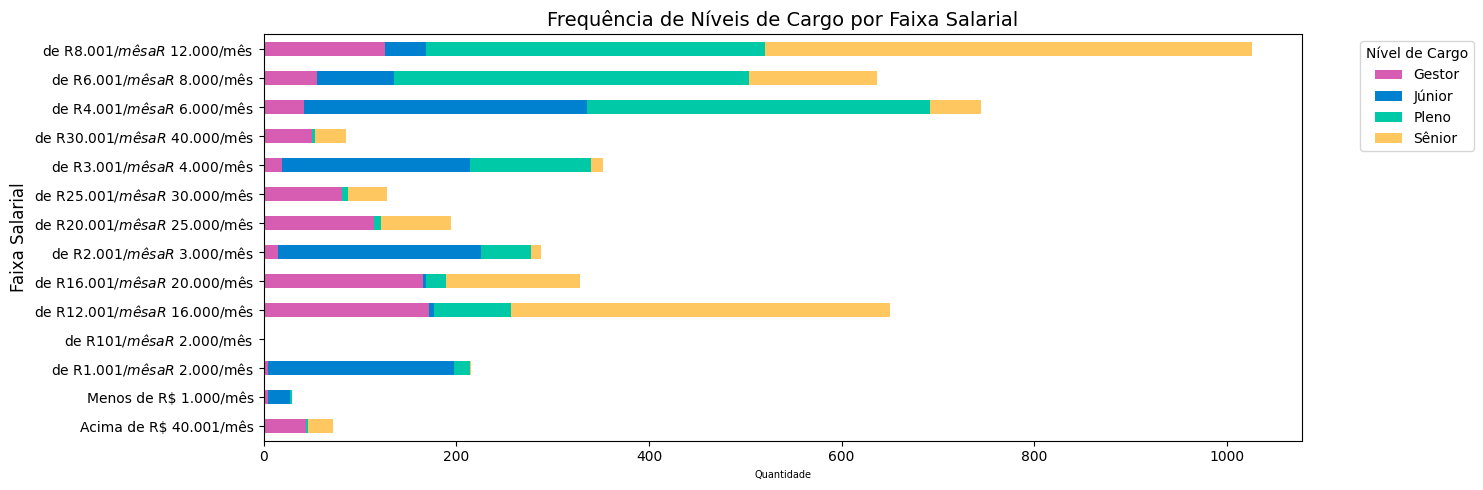

In [232]:
# Criar o gráfico de barras horizontal
ax = tabela_frequencia4.plot(kind='barh', rot=0, figsize=(15, 5), stacked=True, color=['#D65Db1', '#0081CF','#00C9A7','#FFC75F'])

plt.title('Frequência de Níveis de Cargo por Faixa Salarial', fontsize=14)
plt.xlabel('Quantidade', fontsize=7) # Ajustar o rótulo do eixo x para 'Quantidade'
plt.ylabel('Faixa Salarial', fontsize=12) # Ajustar o rótulo do eixo y para 'Faixa Salarial'
plt.legend(title='Nível de Cargo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3. Quantos profissionais estão em cada nível (junior, pleno, sênior e gestor)

In [233]:
# Criando nova coluna "NOVO NIVEL" para diferenciar gestores de não gestores
def preencher_nivel(gestor, nivel):
    if gestor == 1:
        return "Gestor"
    else:
        return nivel

dados_carreira["NOVO NIVEL"] = dados_carreira.apply(lambda x: preencher_nivel(x["Gestor?"], x["Nivel"]), axis=1)

contagem_nivel = dados_carreira['NOVO NIVEL'].value_counts()
porcentagem_nivel = dados_carreira['NOVO NIVEL'].value_counts(normalize=True) * 100

df_nivel = pd.DataFrame({'Contagem': contagem_nivel, 'Porcentagem (%)': porcentagem_nivel.round(2)})
print(df_nivel)

            Contagem  Porcentagem (%)
NOVO NIVEL                           
Sênior          1419            29.85
Pleno           1392            29.29
Júnior          1046            22.01
Gestor           896            18.85


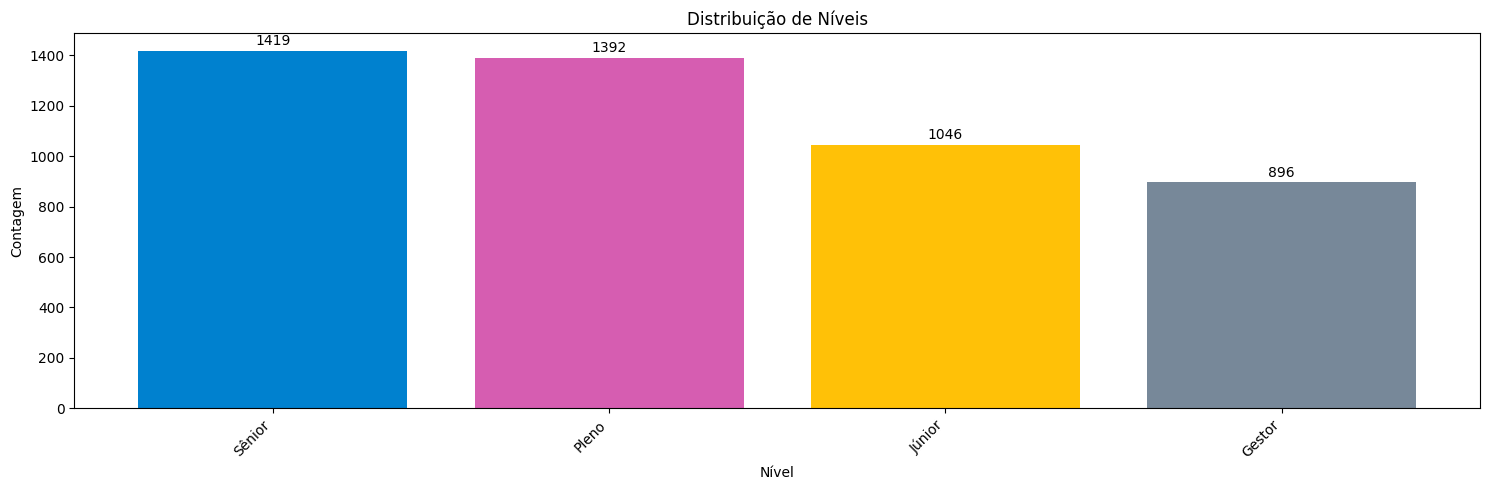

In [234]:
# Criando o gráfico de barras
plt.figure(figsize=(15, 5))  # Define o tamanho do gráfico
plt.bar(df_nivel.index, df_nivel['Contagem'], color=['#0081CF', '#D65Db1', '#FFC107', '#778899'])
plt.xlabel('Nível')
plt.ylabel('Contagem')
plt.title('Distribuição de Níveis')
plt.xticks(rotation=45, ha='right')

# Adiciona a quantidade no topo de cada barra
for i, v in enumerate(df_nivel['Contagem']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()  # Ajuste automático do layout
plt.show()

### 4. Os profissionais da área estão satisfeitos?

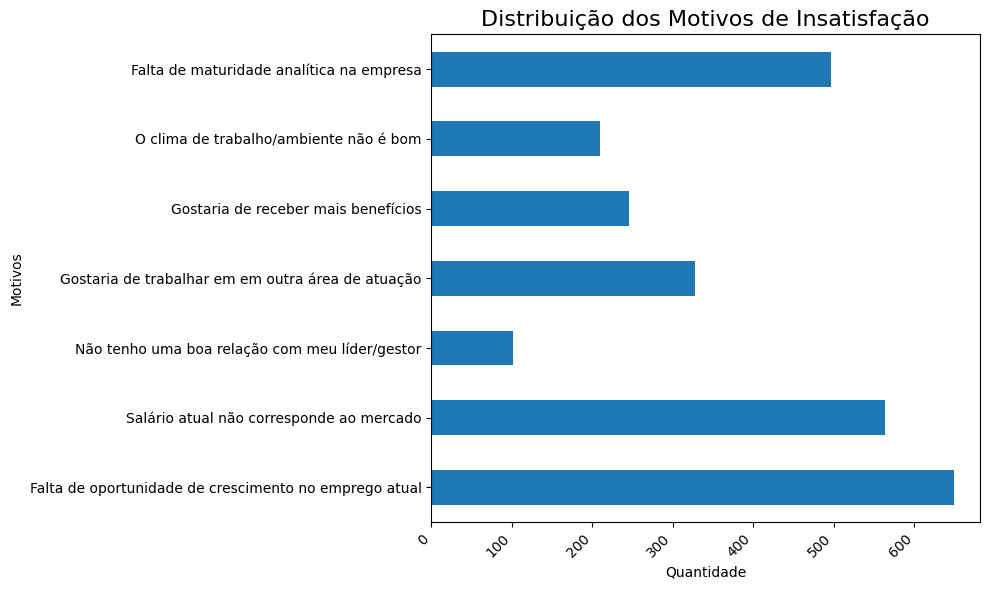

In [235]:
# Distribuição dos motivos de insatisfação
plt.figure(figsize=(10, 6))
contagem_motivos.plot(kind='barh')
plt.title('Distribuição dos Motivos de Insatisfação', fontsize=16)
plt.ylabel('Motivos')
plt.xlabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

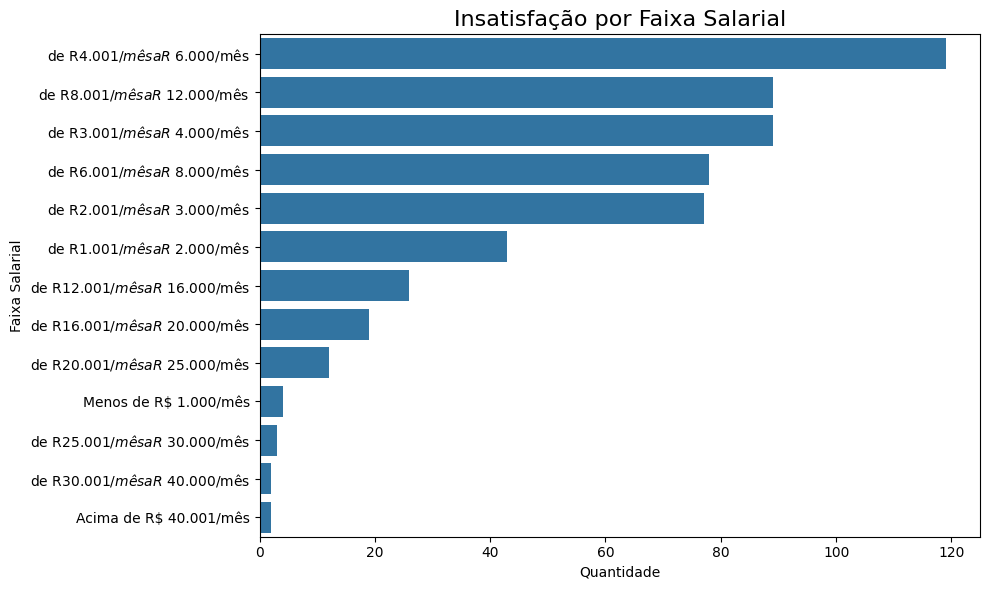

In [237]:
# Motivos de insatisfação por faixa salarial
plt.figure(figsize=(10, 6))
sns.barplot(data=insatisfacao_salario_df, y='Faixa salarial', x='Quantidade')
plt.title('Insatisfação por Faixa Salarial', fontsize=16)
plt.xlabel('Quantidade')
plt.ylabel('Faixa Salarial')
plt.tight_layout()
plt.show()


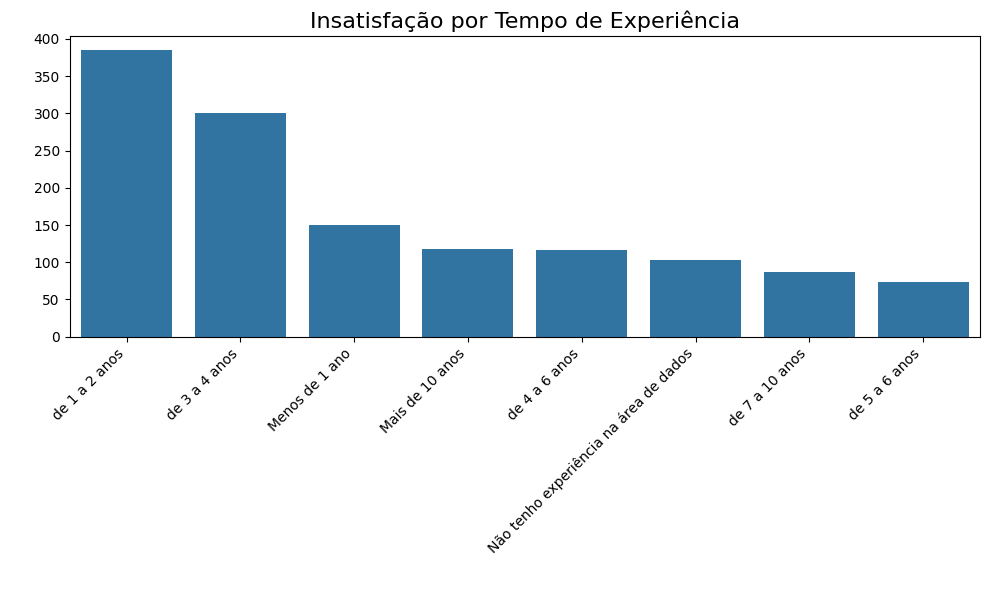

In [238]:
#Motivos de insatisfação por tempo de experiência
plt.figure(figsize=(10, 6))
sns.barplot(data=insatisfacao_por_tempo_expe_df, x='Tempo de Experiência', y='Quantidade')
plt.title('Insatisfação por Tempo de Experiência', fontsize=16)
plt.xlabel(' ', fontsize=12)
plt.ylabel(' ', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

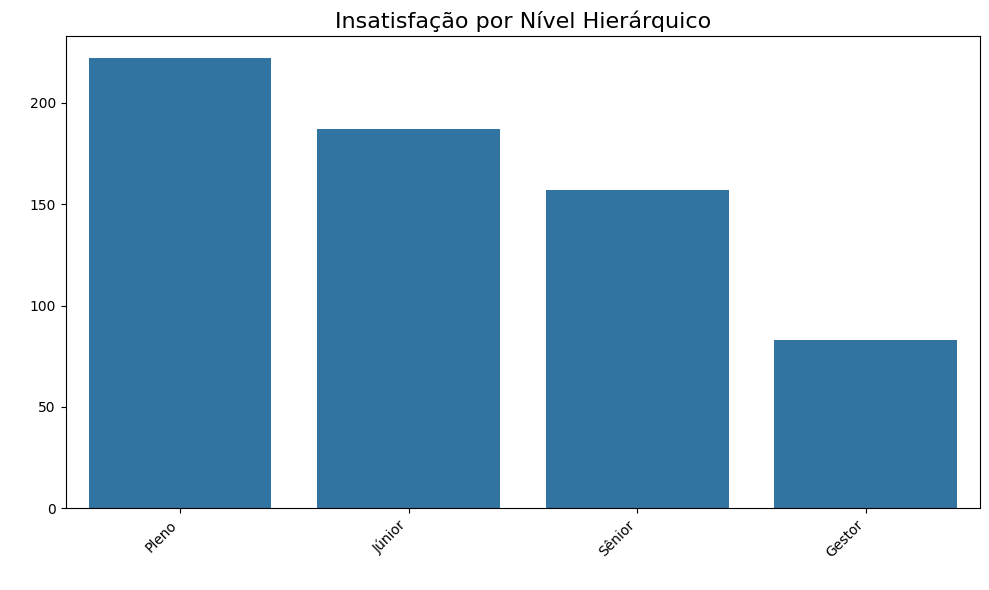

In [239]:
#Motivos de insatisfação por Nível
plt.figure(figsize=(10, 6))
sns.barplot(data=insatisfacao_por_nivel_df, x='NOVO NIVEL', y='Quantidade')
plt.title('Insatisfação por Nível Hierárquico', fontsize=16)
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Correlação Análise de Satisfação

In [240]:
# Tabela cruzada entre satisfação e probabilidade de mudar de emprego
crosstab_satisfacao_emprego = pd.crosstab(dados_carreira['Satisfeito?'], dados_carreira['Probabilidade de mudar de emprego'])
crosstab_satisfacao_emprego

Probabilidade de mudar de emprego  Aberto a oportunidades  \
Satisfeito?                                                 
Indiferente                                             0   
Insatisfeito                                          288   
Satisfeito                                           1473   

Probabilidade de mudar de emprego  Em busca de oportunidades  Sem pretensão  
Satisfeito?                                                                  
Indiferente                                                0            540  
Insatisfeito                                            1014             31  
Satisfeito                                               768           1179

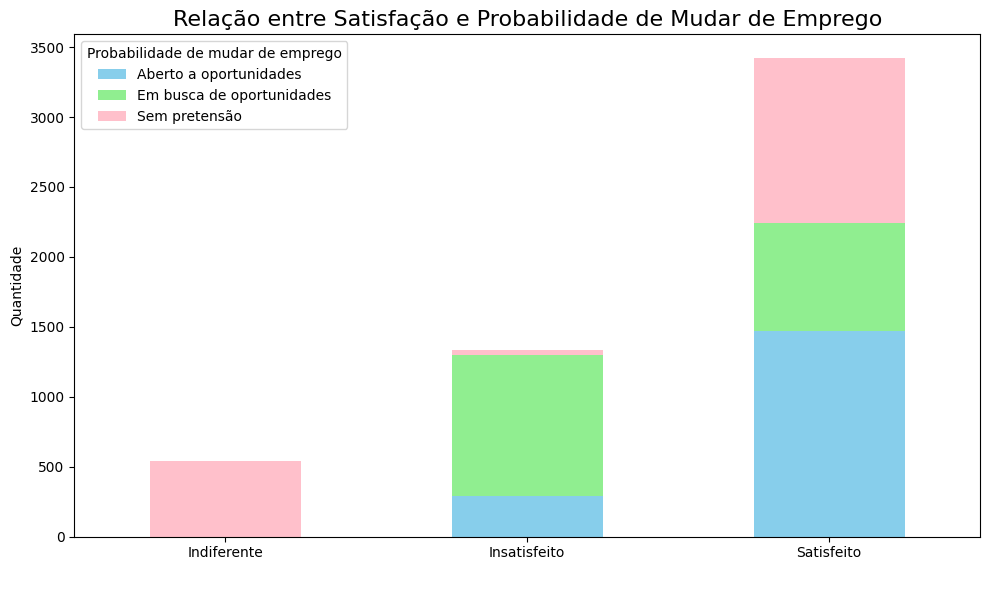

In [241]:
crosstab_satisfacao_emprego.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'pink'], figsize=(10,6))
plt.title('Relação entre Satisfação e Probabilidade de Mudar de Emprego', fontsize=16)
plt.xlabel(' ')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 5. Quais são as principais ferramentas utilizadas?

In [244]:

# Lista de ferramentas de ETL
ferramentas_etl = [
    'Scripts Python',
    'SQL & Stored Procedures',
    'Apache Airflow',
    'Apache NiFi',
    'Luigi',
    'AWS Glue',
    'Talend',
    'Pentaho',
    'Alteryx',
    'Stitch',
    'Fivetran',
    'Google Dataflow',
    'Oracle Data Integrator',
    'IBM DataStage',
    'SAP BW ETL',
    'SQL Server Integration Services (SSIS',
    'SAS Data Integration',
    'Qlik Sense',
    'Knime',
    'Databricks',
    'Não utilizo ferramentas de ETL'
]

# Somar os valores de cada coluna
soma_ferramentas = conhecim_engenharia_dados[ferramentas_etl].sum()

# Imprimir a soma
print("Soma das ferramentas de ETL:")
print(soma_ferramentas)

Soma das ferramentas de ETL:
Scripts Python                           725.0
SQL & Stored Procedures                  608.0
Apache Airflow                           411.0
Apache NiFi                               38.0
Luigi                                      4.0
AWS Glue                                 183.0
Talend                                    15.0
Pentaho                                   61.0
Alteryx                                   17.0
Stitch                                    16.0
Fivetran                                  22.0
Google Dataflow                          101.0
Oracle Data Integrator                    12.0
IBM DataStage                              9.0
SAP BW ETL                                14.0
SQL Server Integration Services (SSIS     88.0
SAS Data Integration                       9.0
Qlik Sense                                15.0
Knime                                      8.0
Databricks                               291.0
Não utilizo ferramentas de ETL 

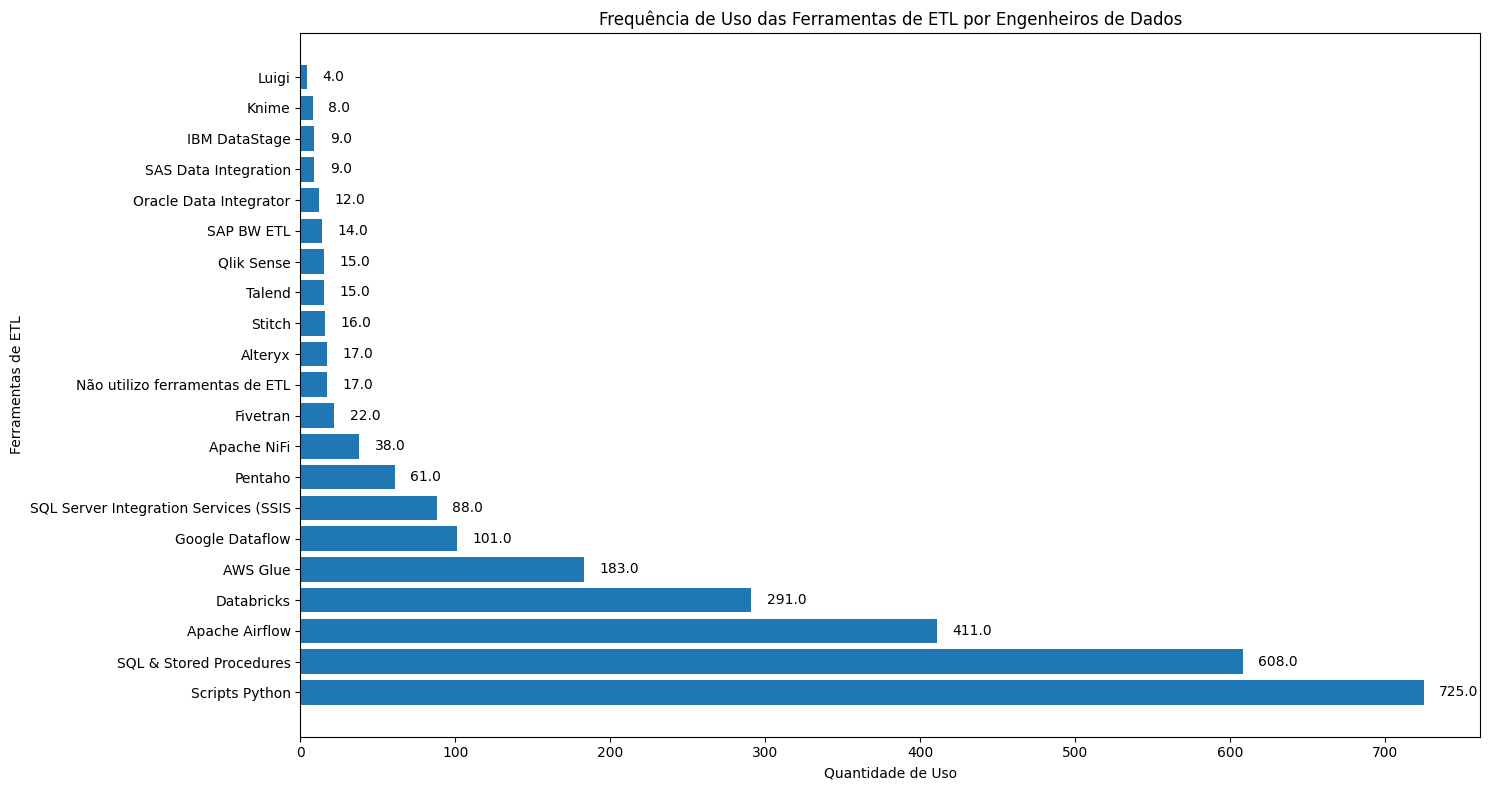

In [247]:
# Ordenar as ferramentas pela quantidade em ordem decrescente
ferramentas_ordenadas = [x for _, x in sorted(zip(soma_ferramentas, ferramentas_etl), reverse=True)]
soma_ferramentas1_ordenada = sorted(soma_ferramentas, reverse=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(15, 8))
plt.barh(ferramentas_ordenadas, soma_ferramentas1_ordenada)

# Configurar o título e os rótulos dos eixos
plt.title("Frequência de Uso das Ferramentas de ETL por Engenheiros de Dados")
plt.xlabel("Quantidade de Uso")
plt.ylabel("Ferramentas de ETL")

# Adicionar os valores ao lado de cada barra
for i, v in enumerate(soma_ferramentas1_ordenada):
    plt.text(v + 10, i, str(v), va='center')  # Ajustar '10' para posicionar o texto

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


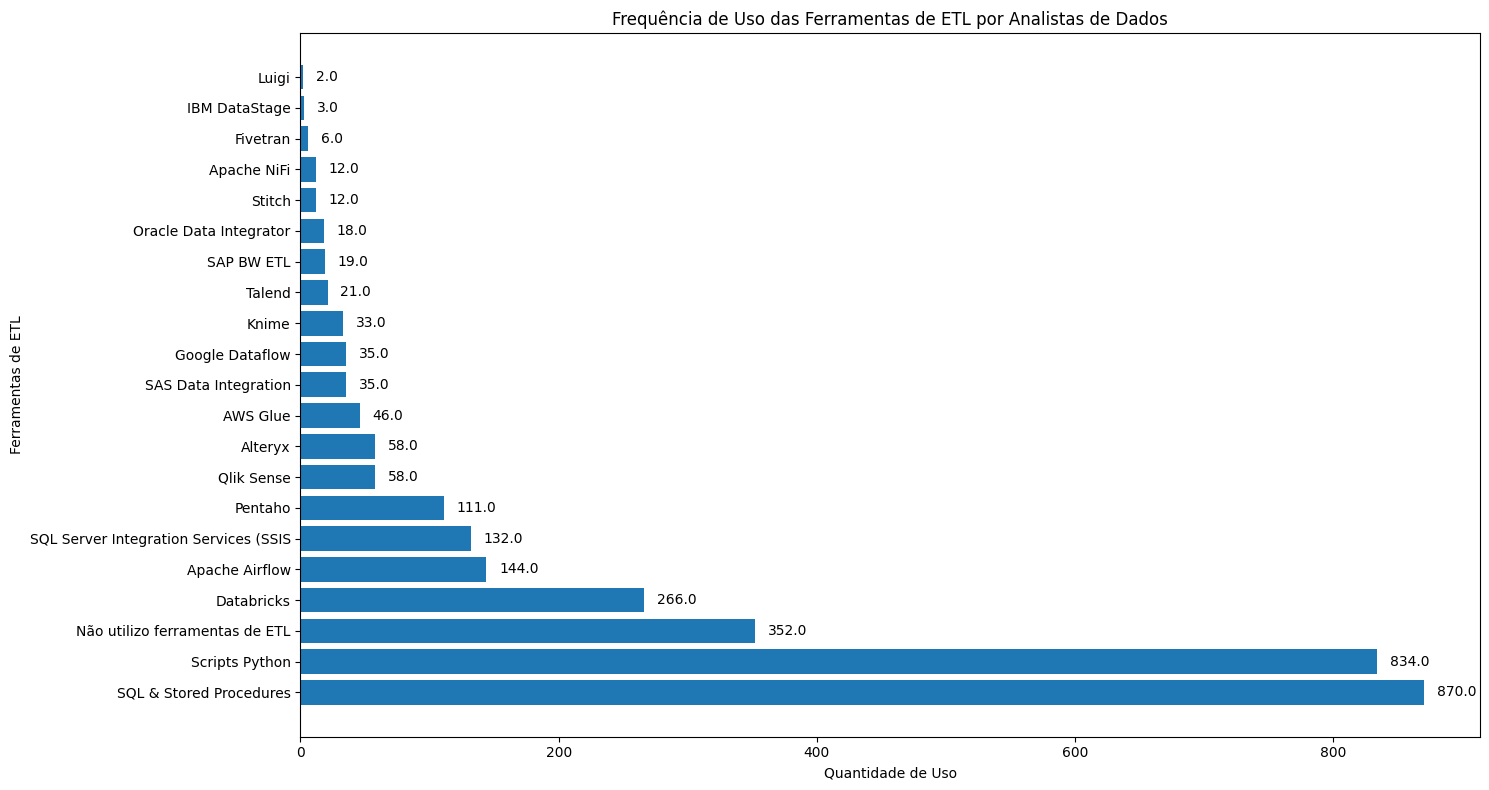

In [249]:
# Ordenar as ferramentas pela quantidade em ordem decrescente
ferramentas_ordenadas1 = [x for _, x in sorted(zip(soma_ferramentas1, ferramentas_etl1), reverse=True)]
soma_ferramentas1_ordenada = sorted(soma_ferramentas1, reverse=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(15, 8))
plt.barh(ferramentas_ordenadas1, soma_ferramentas1_ordenada)

# Configurar o título e os rótulos dos eixos
plt.title("Frequência de Uso das Ferramentas de ETL por Analistas de Dados")
plt.xlabel("Quantidade de Uso")
plt.ylabel("Ferramentas de ETL")

# Adicionar os valores ao lado de cada barra
for i, v in enumerate(soma_ferramentas1_ordenada):
    plt.text(v + 10, i, str(v), va='center')  # Ajustar '10' para posicionar o texto corretamente

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Concatenando as ferramentas de ETL

In [250]:
# Concatenar os DataFrames
df_concatenado = pd.concat([conhecim_analise_dados[ferramentas_etl], conhecim_engenharia_dados[ferramentas_etl]], axis=0)

# Somar os valores de cada coluna
soma_total_ferramentas = df_concatenado.sum()

# Imprimir a soma
print("Soma total das ferramentas de ETL:")
print(soma_total_ferramentas)

Soma total das ferramentas de ETL:
Scripts Python                           1559.0
SQL & Stored Procedures                  1478.0
Apache Airflow                            555.0
Apache NiFi                                50.0
Luigi                                       6.0
AWS Glue                                  229.0
Talend                                     36.0
Pentaho                                   172.0
Alteryx                                    75.0
Stitch                                     28.0
Fivetran                                   28.0
Google Dataflow                           136.0
Oracle Data Integrator                     30.0
IBM DataStage                              12.0
SAP BW ETL                                 33.0
SQL Server Integration Services (SSIS     220.0
SAS Data Integration                       44.0
Qlik Sense                                 73.0
Knime                                      41.0
Databricks                                557.0
Não u

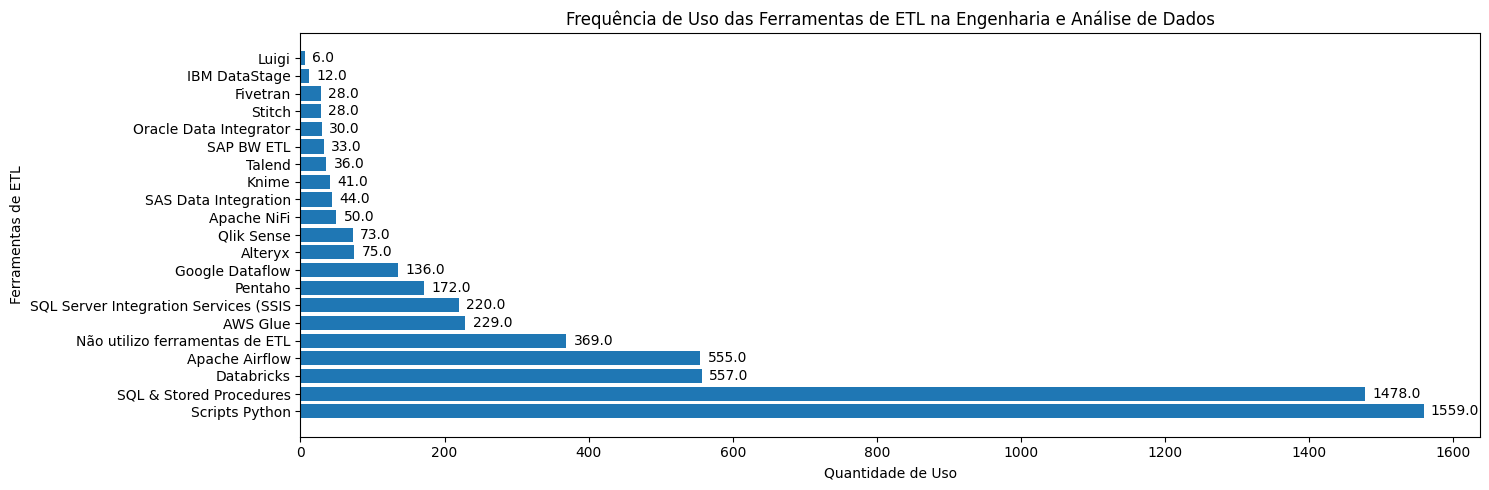

In [251]:
# Ordenar as ferramentas pela quantidade em ordem decrescente
ferramentas_ordenadas = [x for _, x in sorted(zip(soma_total_ferramentas, ferramentas_etl), reverse=True)]
soma_total_ferramentas_ordenada = sorted(soma_total_ferramentas, reverse=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(15, 5))
plt.barh(ferramentas_ordenadas, soma_total_ferramentas_ordenada)

# Configurar o título e os rótulos dos eixos
plt.title("Frequência de Uso das Ferramentas de ETL na Engenharia e Análise de Dados")
plt.xlabel("Quantidade de Uso")
plt.ylabel("Ferramentas de ETL")

# Adicionar os valores ao lado de cada barra
for i, v in enumerate(soma_total_ferramentas_ordenada):
    plt.text(v + 10, i, str(v), va='center')  # Ajustar '10' para posicionar o texto corretamente

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [252]:
# Lista de ferramentas de ETL
ferramentas_c_dados = [
    'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)',
    'Planilhas (Excel, Google Sheets etc)',
    'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)',
    'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)',
    'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)',
    'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)',
    'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)',
    'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)',
    'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)',
    'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)',
    'Ferramentas de estatística avançada como SPSS, SAS, etc.',
]

# Somar os valores de cada coluna
soma_ferramentas3 = conhecim_ciencias_dados[ferramentas_c_dados].sum()

# Imprimir a soma
print("Soma das ferramentas de Ciencia de Dados:")
print(soma_ferramentas3)

Soma das ferramentas de Ciencia de Dados:
Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)                                       321.0
Planilhas (Excel, Google Sheets etc)                                                         514.0
Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)                          536.0
Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)    430.0
Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)                                        81.0
Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)                     153.0
Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)           294.0
Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)            107.0
Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)                            468.0
Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)       

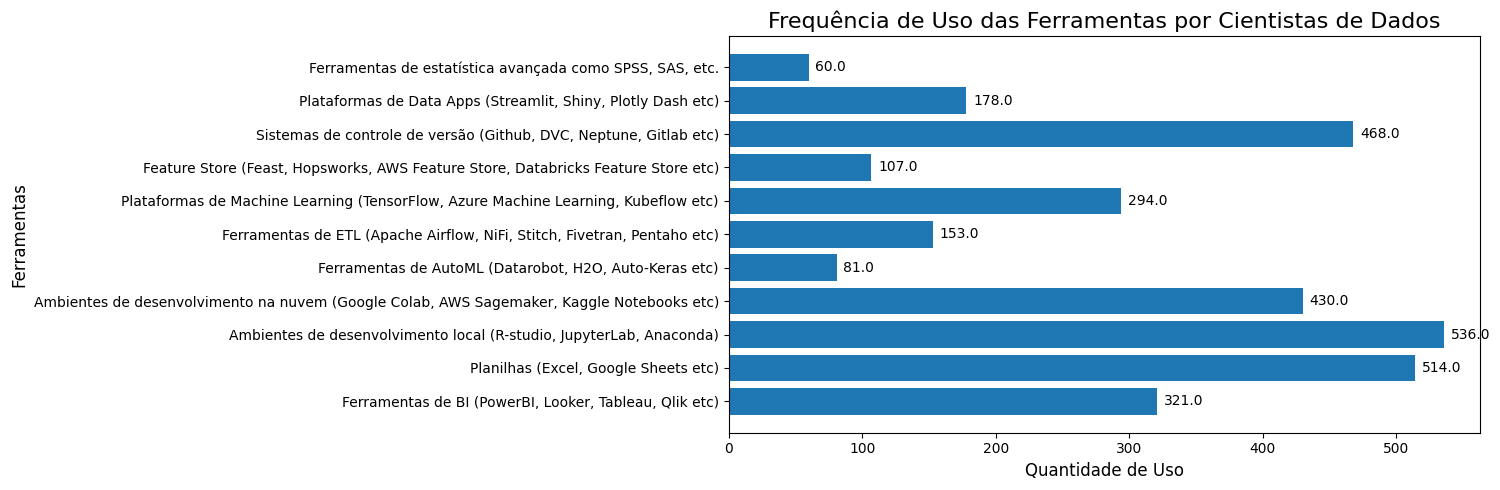

In [254]:
# Criar o gráfico de barras horizontais
plt.figure(figsize=(15, 5))
plt.barh(ferramentas_c_dados, soma_ferramentas3)

# Configurar o título e os rótulos dos eixos
plt.title("Frequência de Uso das Ferramentas por Cientistas de Dados", fontsize=16)
plt.xlabel("Quantidade de Uso", fontsize=12)
plt.ylabel("Ferramentas", fontsize=12)

# Adicionar os valores ao lado de cada barra
for i, v in enumerate(soma_ferramentas3):
    plt.text(v + 5, i, str(v), va='center')  # Ajustar '5' para posicionar o texto de forma precisa

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()



# **🎯💃👩‍💼 4 - Perguntas Respondidas: Aprofundando no mercado de trabalho - Mulheres**


In [274]:
# Definindo as colunas de cada DataFrame
colunas_df1 = ['id','Faixa idade', 'Genero', 'Cor/raca/etnia', 'uf onde mora', 'Nivel de Ensino', 'Área de Formação']
colunas_df2 = ['id','Qual sua situação atual de trabalho?', 'Gestor?', 'Cargo Atual', 'NOVO NIVEL', 'Faixa salarial', 'Quanto tempo de experiência na área de dados você tem?', 'Motivos da insatisfação com a empresa atual?', 'Atualmente qual a sua forma de trabalho?', 'Qual a forma de trabalho ideal para você?']
colunas_df3 = ['id','Qual seu objetivo na área de dados?', 'Qual oportunidade você está buscando?', 'Há quanto tempo você busca uma oportunidade na área de dados?', 'Como tem sido a busca por um emprego na área de dados?']

# Selecionando as colunas desejadas de cada DataFrame
df1_selecionado = dados_demograficos[colunas_df1]
df2_selecionado = dados_carreira[colunas_df2]
df3_selecionado = objetivos_area_dados[colunas_df3]

# Concatenando os DataFrames pela coluna 'id'
df_combinado1 = pd.merge(df1_selecionado, df2_selecionado, on='id', how='outer')
df_combinado1 = pd.merge(df_combinado1, df3_selecionado, on='id', how='outer')

#print(df_combinado1)

Faixa Etária das Mulheres:
             Contagem Absoluta  Percentual (%)
Faixa idade                                   
25-29                      414           32.02
30-34                      356           27.53
35-39                      201           15.55
40-44                       98            7.58
22-24                       94            7.27
45-49                       48            3.71
17-21                       42            3.25
50-54                       27            2.09
55+                         13            1.01

--------------------------------
Faixa Etária dos Homens:
             Contagem Absoluta  Percentual (%)
Faixa idade                                   
25-29                     1233           31.02
30-34                     1016           25.56
35-39                      581           14.62
22-24                      397            9.99
40-44                      331            8.33
45-49                      140            3.52
17-21                

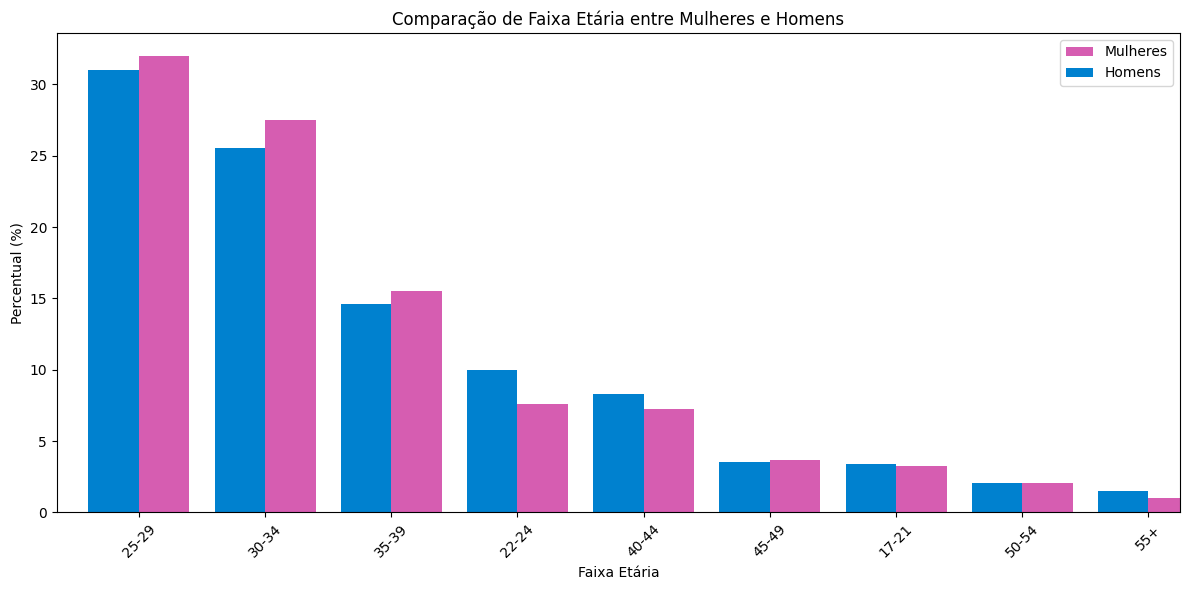

In [275]:
# Filtrar o DataFrame pelas mulheres e homens
mulheres_df = df_combinado1[df_combinado1['Genero'] == 'Feminino']
homens_df = df_combinado1[df_combinado1['Genero'] == 'Masculino']

# Analisar as características das mulheres
faixa_etaria_mulheres = mulheres_df['Faixa idade'].value_counts()
faixa_etaria_mulheres_percentual = mulheres_df['Faixa idade'].value_counts(normalize=True) * 100

# Analisar as características dos homens
faixa_etaria_homens = homens_df['Faixa idade'].value_counts()
faixa_etaria_homens_percentual = homens_df['Faixa idade'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_faixa_etaria_mulheres = pd.DataFrame({'Contagem Absoluta': faixa_etaria_mulheres, 'Percentual (%)': faixa_etaria_mulheres_percentual.round(2) })
df_faixa_etaria_homens = pd.DataFrame({'Contagem Absoluta': faixa_etaria_homens, 'Percentual (%)': faixa_etaria_homens_percentual.round(2) })

# Exibir os resultados
print("Faixa Etária das Mulheres:")
print(df_faixa_etaria_mulheres)
print("\n--------------------------------")
print("Faixa Etária dos Homens:")
print(df_faixa_etaria_homens)
print("\n--------------------------------")

# Criar gráficos comparativos
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras para mulheres
df_faixa_etaria_mulheres['Percentual (%)'].plot(kind='bar', color='#D65Db1', label='Mulheres', ax=ax, position=0, width=0.4)

# Gráfico de barras para homens
df_faixa_etaria_homens['Percentual (%)'].plot(kind='bar', color='#0081CF', label='Homens', ax=ax, position=1, width=0.4)

# Configurar título e rótulos
ax.set_title('Comparação de Faixa Etária entre Mulheres e Homens')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Percentual (%)')
ax.legend()

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()


Nível de Ensino das Mulheres:
                            Contagem Absoluta  Percentual (%)
Nivel de Ensino                                              
Pós-graduação                             462           35.73
Graduação/Bacharelado                     411           31.79
Mestrado                                  196           15.16
Estudante de Graduação                    132           10.21
Doutorado ou Phd                           72            5.57
Não tenho graduação formal                 20            1.55

--------------------------------
Nível de Ensino dos Homens:
                            Contagem Absoluta  Percentual (%)
Nivel de Ensino                                              
Graduação/Bacharelado                    1376           34.62
Pós-graduação                            1351           33.99
Estudante de Graduação                    542           13.64
Mestrado                                  476           11.97
Doutorado ou Phd                        

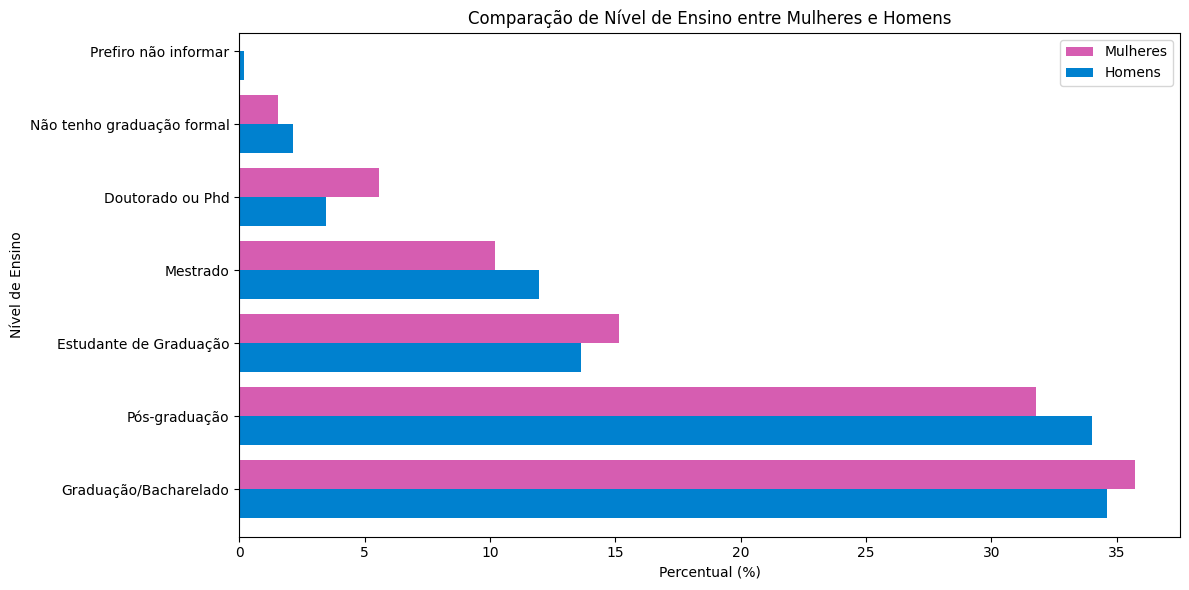

In [300]:
# Contagem absoluta e percentual dos níveis de ensino para mulheres
nivel_ensino_mulheres = mulheres_df['Nivel de Ensino'].value_counts()
nivel_ensino_mulheres_percentual = mulheres_df['Nivel de Ensino'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual dos níveis de ensino para homens
nivel_ensino_homens = homens_df['Nivel de Ensino'].value_counts()
nivel_ensino_homens_percentual = homens_df['Nivel de Ensino'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_nivel_ensino_mulheres = pd.DataFrame({'Contagem Absoluta': nivel_ensino_mulheres, 'Percentual (%)': nivel_ensino_mulheres_percentual.round(2) })
df_nivel_ensino_homens = pd.DataFrame({'Contagem Absoluta': nivel_ensino_homens, 'Percentual (%)': nivel_ensino_homens_percentual.round(2) })

# Exibir os resultados
print("Nível de Ensino das Mulheres:")
print(df_nivel_ensino_mulheres)
print("\n--------------------------------")
print("Nível de Ensino dos Homens:")
print(df_nivel_ensino_homens)
print("\n--------------------------------")

# Criar gráficos comparativos
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar as barras horizontais para mulheres
df_nivel_ensino_mulheres['Percentual (%)'].plot(kind='barh', color='#D65Db1', label='Mulheres', ax=ax, position=0, width=0.4, align='center')

# Plotar as barras horizontais para homens
df_nivel_ensino_homens['Percentual (%)'].plot(kind='barh', color='#0081CF', label='Homens', ax=ax, position=1, width=0.4, align='center')

# Configurar o título e os rótulos dos eixos
ax.set_title('Comparação de Nível de Ensino entre Mulheres e Homens')
ax.set_xlabel('Percentual (%)')
ax.set_ylabel('Nível de Ensino')

# Adicionar a legenda
ax.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Faixa Salarial das Mulheres:
                                  Contagem Absoluta  Percentual (%)
Faixa salarial                                                     
de R$ 8.001/mês a R$ 12.000/mês                 242           21.78
de R$ 4.001/mês a R$ 6.000/mês                  181           16.29
de R$ 6.001/mês a R$ 8.000/mês                  173           15.57
de R$ 12.001/mês a R$ 16.000/mês                148           13.32
de R$ 3.001/mês a R$ 4.000/mês                   95            8.55
de R$ 2.001/mês a R$ 3.000/mês                   76            6.84
de R$ 1.001/mês a R$ 2.000/mês                   72            6.48
de R$ 16.001/mês a R$ 20.000/mês                 56            5.04
de R$ 20.001/mês a R$ 25.000/mês                 22            1.98
de R$ 25.001/mês a R$ 30.000/mês                 18            1.62
Acima de R$ 40.001/mês                           11            0.99
Menos de R$ 1.000/mês                            10            0.90
de R$ 30.001/mês a 

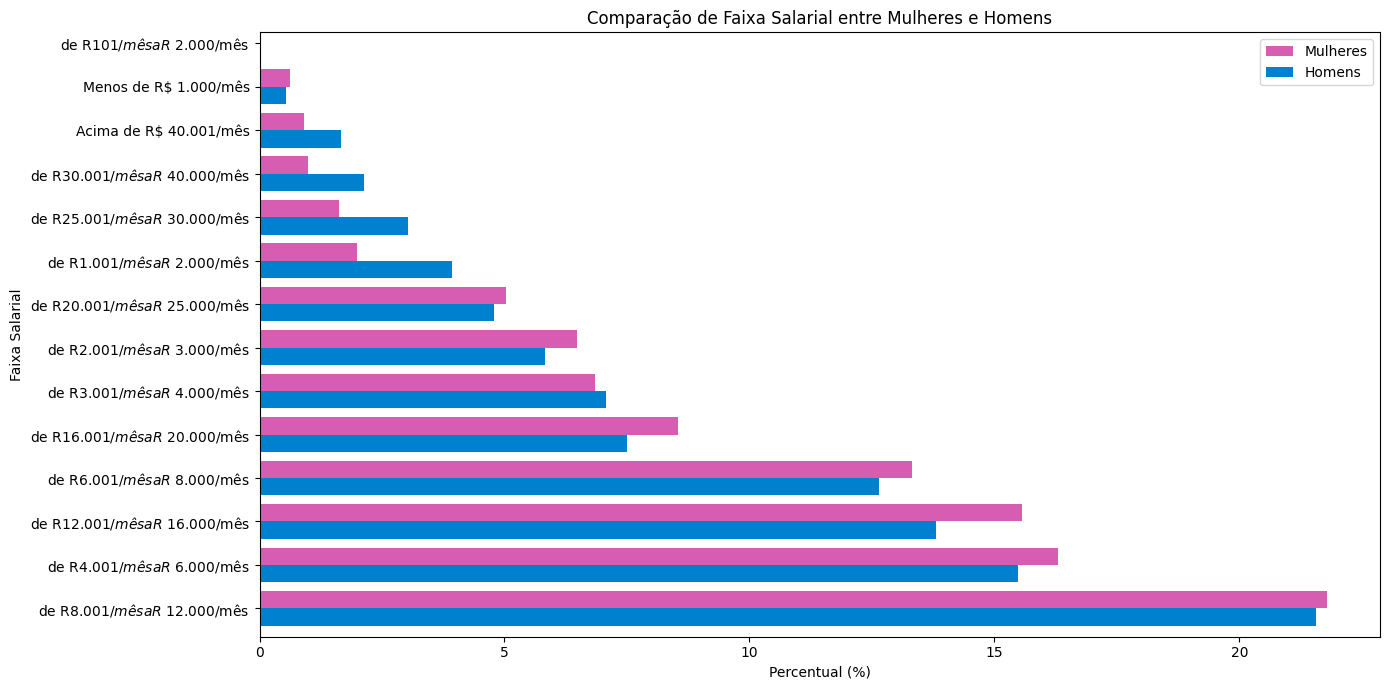

In [303]:
# Contagem absoluta e percentual das faixas salariais para mulheres
faixa_salarial_mulheres = mulheres_df['Faixa salarial'].value_counts()
faixa_salarial_mulheres_percentual = mulheres_df['Faixa salarial'].value_counts(normalize=True) * 100
faixa_salarial_homens = homens_df['Faixa salarial'].value_counts()
faixa_salarial_homens_percentual = homens_df['Faixa salarial'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_faixa_salarial_mulheres = pd.DataFrame({'Contagem Absoluta': faixa_salarial_mulheres, 'Percentual (%)': faixa_salarial_mulheres_percentual.round(2) })
df_faixa_salarial_homens = pd.DataFrame({'Contagem Absoluta': faixa_salarial_homens, 'Percentual (%)': faixa_salarial_homens_percentual.round(2) })
print("Faixa Salarial das Mulheres:")
print(df_faixa_salarial_mulheres)
print("\n--------------------------------")
print("Faixa Salarial dos Homens:")
print(df_faixa_salarial_homens)
print("\n--------------------------------")

# Criar gráficos comparativos
fig, ax = plt.subplots(figsize=(14, 7))

# Plotar as barras horizontais para mulheres
df_faixa_salarial_mulheres['Percentual (%)'].plot(kind='barh', color='#D65Db1', label='Mulheres', ax=ax, position=0, width=0.4, align='center')

# Plotar as barras horizontais para homens
df_faixa_salarial_homens['Percentual (%)'].plot(kind='barh', color='#0081CF', label='Homens', ax=ax, position=1, width=0.4, align='center')

# Configurar o título e os rótulos dos eixos
ax.set_title('Comparação de Faixa Salarial entre Mulheres e Homens')
ax.set_xlabel('Percentual (%)')
ax.set_ylabel('Faixa Salarial')

# Adicionar a legenda
ax.legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Região das Mulheres:
              Contagem Absoluta  Percentual (%)
uf onde mora                                   
SP                          510           40.32
MG                          161           12.73
RJ                          109            8.62
PR                           96            7.59
RS                           70            5.53
SC                           59            4.66
DF                           47            3.72
BA                           40            3.16
PE                           37            2.92
CE                           28            2.21
GO                           20            1.58
ES                           20            1.58
PB                           14            1.11
AM                            9            0.71
RN                            8            0.63
AL                            8            0.63
SE                            7            0.55
MT                            6            0.47
MA                 

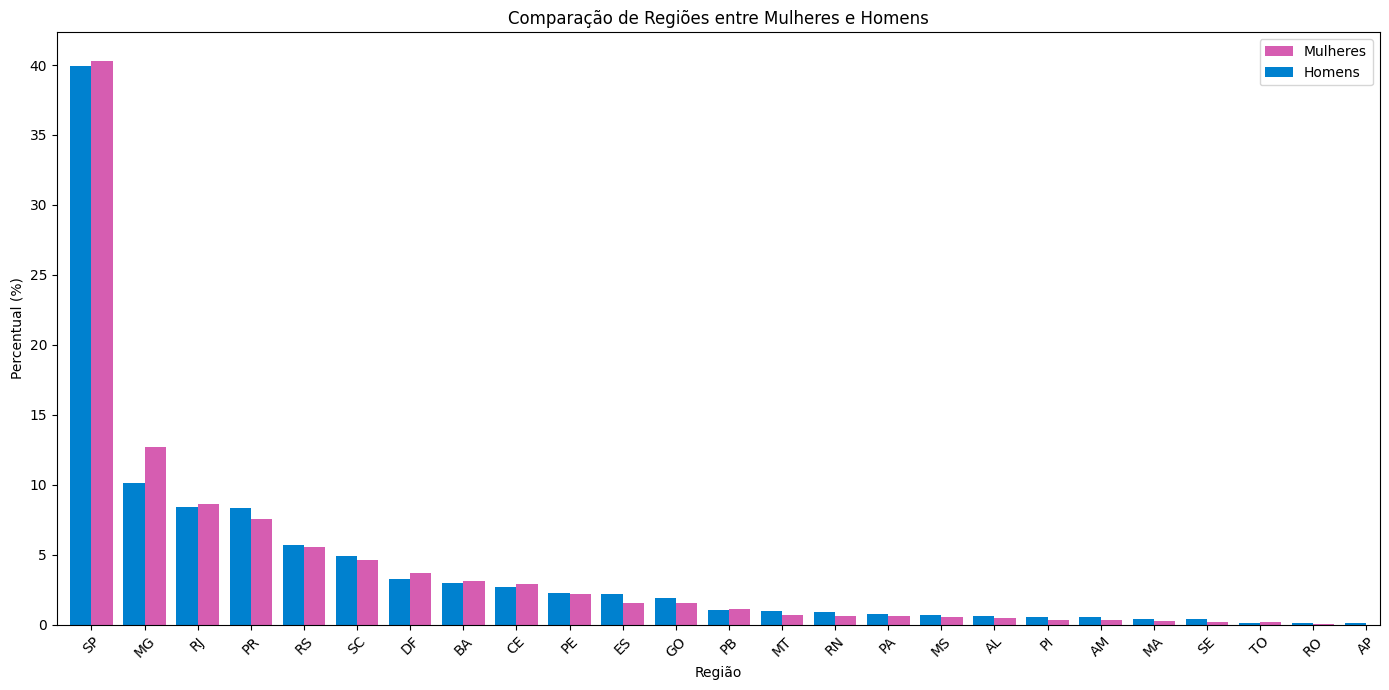

In [304]:
# Contagem absoluta e percentual das regiões para mulheres
regiao_mulheres = mulheres_df['uf onde mora'].value_counts()
regiao_mulheres_percentual = mulheres_df['uf onde mora'].value_counts(normalize=True) * 100
regiao_homens = homens_df['uf onde mora'].value_counts()
regiao_homens_percentual = homens_df['uf onde mora'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_regiao_mulheres = pd.DataFrame({'Contagem Absoluta': regiao_mulheres, 'Percentual (%)': regiao_mulheres_percentual.round(2)})
df_regiao_homens = pd.DataFrame({'Contagem Absoluta': regiao_homens, 'Percentual (%)': regiao_homens_percentual.round(2)})
print("Região das Mulheres:")
print(df_regiao_mulheres)
print("\n--------------------------------")
print("Região dos Homens:")
print(df_regiao_homens)
print("\n--------------------------------")

# Criar gráficos comparativos
fig, ax = plt.subplots(figsize=(14, 7))
df_regiao_mulheres['Percentual (%)'].plot(kind='bar', color='#D65Db1', label='Mulheres', ax=ax, position=0, width=0.4)
df_regiao_homens['Percentual (%)'].plot(kind='bar', color='#0081CF', label='Homens', ax=ax, position=1, width=0.4)
ax.set_title('Comparação de Regiões entre Mulheres e Homens')
ax.set_xlabel('Região')
ax.set_ylabel('Percentual (%)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Área de Formação das Mulheres:
                                                    Contagem Absoluta  \
Área de Formação                                                        
Computação / Engenharia de Software / Sistemas ...                417   
Outras Engenharias                                                243   
Economia/ Administração / Contabilidade / Finan...                203   
Estatística/ Matemática / Matemática Computacio...                117   
Outra opção                                                       106   
Ciências Biológicas/ Farmácia/ Medicina/ Área d...                 61   
Marketing / Publicidade / Comunicação / Jornalismo                 54   
Ciências Sociais                                                   39   
Química / Física                                                   33   

                                                    Percentual (%)  
Área de Formação                                                    
Computação / Engenharia de 

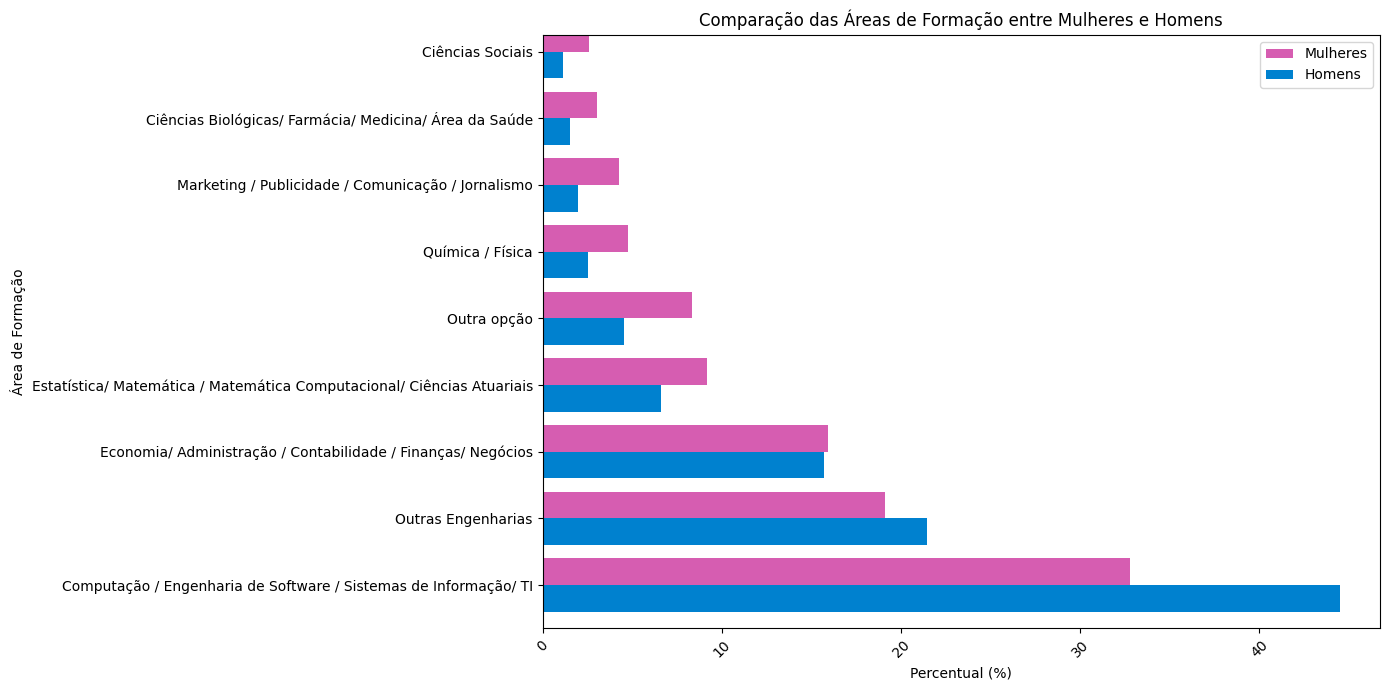

In [305]:
# Contagem absoluta e percentual das áreas de formação para mulheres
area_formacao_mulheres = mulheres_df['Área de Formação'].value_counts()
area_formacao_mulheres_percentual = mulheres_df['Área de Formação'].value_counts(normalize=True) * 100
area_formacao_homens = homens_df['Área de Formação'].value_counts()
area_formacao_homens_percentual = homens_df['Área de Formação'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_area_formacao_mulheres = pd.DataFrame({'Contagem Absoluta': area_formacao_mulheres, 'Percentual (%)': area_formacao_mulheres_percentual.round(2)})
df_area_formacao_homens = pd.DataFrame({'Contagem Absoluta': area_formacao_homens, 'Percentual (%)': area_formacao_homens_percentual.round(2)})

# Exibir os resultados
print("Área de Formação das Mulheres:")
print(df_area_formacao_mulheres)
print("\n--------------------------------")
print("Área de Formação dos Homens:")
print(df_area_formacao_homens)
print("\n--------------------------------")

# Criar gráficos comparativos
fig, ax = plt.subplots(figsize=(14, 7))
df_area_formacao_mulheres['Percentual (%)'].plot(kind='barh', color='#D65Db1', label='Mulheres', ax=ax, position=0, width=0.4)
df_area_formacao_homens['Percentual (%)'].plot(kind='barh', color='#0081CF', label='Homens', ax=ax, position=1, width=0.4)
ax.set_title('Comparação das Áreas de Formação entre Mulheres e Homens')
ax.set_ylabel('Área de Formação')
ax.set_xlabel('Percentual (%)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Situação de Trabalho das Mulheres:
                                                    Contagem Absoluta  \
Qual sua situação atual de trabalho?                                    
Empregado (CLT)                                                   863   
Desempregado, buscando recolocação                                131   
Empreendedor ou Empregado (CNPJ)                                   91   
Estagiário                                                         70   
Servidor Público                                                   33   
Vivo no Brasil e trabalho remoto para empresa d...                 22   
Trabalho na área Acadêmica/Pesquisador                             21   
Freelancer                                                         19   
Somente Estudante (graduação)                                      18   
Somente Estudante (pós-graduação)                                   9   
Vivo fora do Brasil e trabalho para empresa de ...                  9   
Prefiro não info

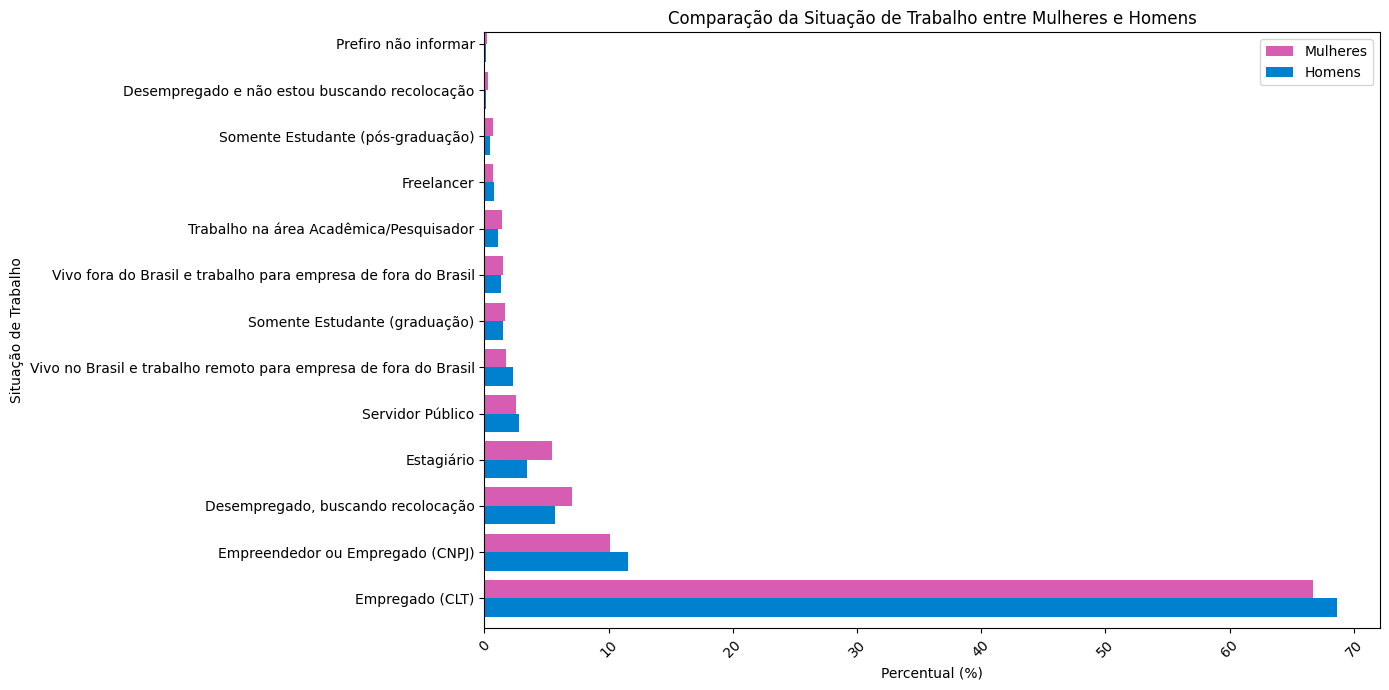

In [306]:
# Contagem absoluta e percentual da situação de trabalho para mulheres
situacao_trabalho_mulheres = mulheres_df['Qual sua situação atual de trabalho?'].value_counts()
situacao_trabalho_mulheres_percentual = mulheres_df['Qual sua situação atual de trabalho?'].value_counts(normalize=True) * 100
situacao_trabalho_homens = homens_df['Qual sua situação atual de trabalho?'].value_counts()
situacao_trabalho_homens_percentual = homens_df['Qual sua situação atual de trabalho?'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_situacao_trabalho_mulheres = pd.DataFrame({'Contagem Absoluta': situacao_trabalho_mulheres, 'Percentual (%)': situacao_trabalho_mulheres_percentual.round(2)})
df_situacao_trabalho_homens = pd.DataFrame({'Contagem Absoluta': situacao_trabalho_homens, 'Percentual (%)': situacao_trabalho_homens_percentual.round(2)})

# Exibir os resultados
print("Situação de Trabalho das Mulheres:")
print(df_situacao_trabalho_mulheres)
print("\n--------------------------------")
print("Situação de Trabalho dos Homens:")
print(df_situacao_trabalho_homens)
print("\n--------------------------------")

# Criar gráficos comparativos
fig, ax = plt.subplots(figsize=(14, 7))
df_situacao_trabalho_mulheres['Percentual (%)'].plot(kind='barh', color='#D65Db1', label='Mulheres', ax=ax, position=0, width=0.4)
df_situacao_trabalho_homens['Percentual (%)'].plot(kind='barh', color='#0081CF', label='Homens', ax=ax, position=1, width=0.4)
ax.set_title('Comparação da Situação de Trabalho entre Mulheres e Homens')
ax.set_ylabel('Situação de Trabalho')
ax.set_xlabel('Percentual (%)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cargos das Mulheres:
                                                    Contagem Absoluta  \
Cargo Atual                                                             
Analista de Dados/Data Analyst                                    259   
Cientista de Dados/Data Scientist                                 154   
Engenheiro de Dados/Arquiteto de Dados/Data Eng...                125   
Analista de BI/BI Analyst                                         108   
Outra Opção                                                        81   
Analista de Negócios/Business Analyst                              67   
Analytics Engineer                                                 33   
Data Product Manager/ Product Manager (PM/APM/D...                 31   
Desenvolvedor/ Engenheiro de Software/ Analista...                 21   
Analista de Suporte/Analista Técnico                               17   
Analista de Inteligência de Mercado/Market Inte...                 14   
Engenheiro de Machine Learning

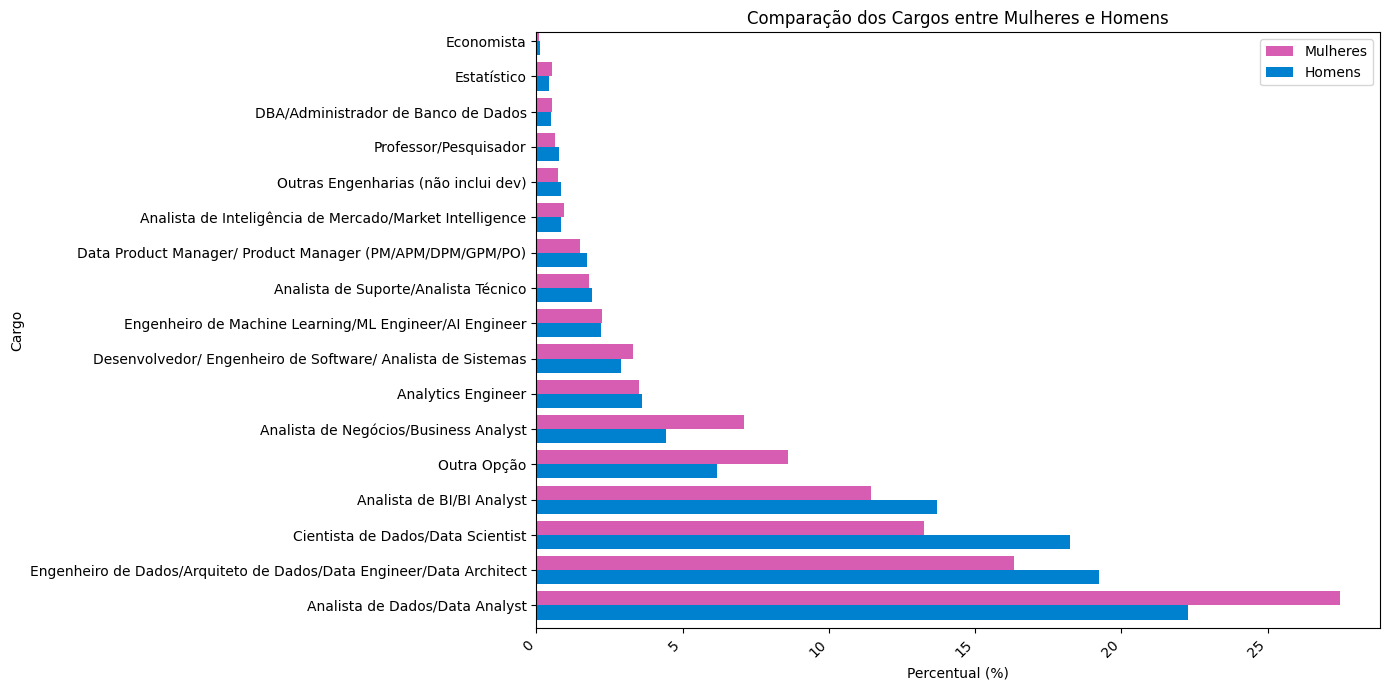

In [307]:
# Filtrar o DataFrame pelas mulheres e homens
mulheres_df = df_combinado1[df_combinado1['Genero'] == 'Feminino']
homens_df = df_combinado1[df_combinado1['Genero'] == 'Masculino']

# Contagem absoluta e percentual dos cargos para mulheres
cargo_mulheres = mulheres_df['Cargo Atual'].value_counts()
cargo_mulheres_percentual = mulheres_df['Cargo Atual'].value_counts(normalize=True) * 100
cargo_homens = homens_df['Cargo Atual'].value_counts()
cargo_homens_percentual = homens_df['Cargo Atual'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_cargo_mulheres = pd.DataFrame({'Contagem Absoluta': cargo_mulheres, 'Percentual (%)': cargo_mulheres_percentual.round(2)})
df_cargo_homens = pd.DataFrame({'Contagem Absoluta': cargo_homens, 'Percentual (%)': cargo_homens_percentual.round(2)})
print("Cargos das Mulheres:")
print(df_cargo_mulheres)
print("\n--------------------------------")
print("Cargos dos Homens:")
print(df_cargo_homens)
print("\n--------------------------------")

# Criar gráficos comparativos
fig, ax = plt.subplots(figsize=(14, 7))
df_cargo_mulheres['Percentual (%)'].plot(kind='barh', color='#D65Db1', label='Mulheres', ax=ax, position=0, width=0.4)
df_cargo_homens['Percentual (%)'].plot(kind='barh', color='#0081CF', label='Homens', ax=ax, position=1, width=0.4)
ax.set_title('Comparação dos Cargos entre Mulheres e Homens')
ax.set_ylabel('Cargo')
ax.set_xlabel('Percentual (%)')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Nível de Cargo das Mulheres
            Contagem Absoluta  Percentual (%)
NOVO NIVEL                                   
Pleno                     337           30.33
Sênior                    307           27.63
Júnior                    299           26.91
Gestor                    168           15.12

--------------------------------
Nível de Cargo dos Homens
            Contagem Absoluta  Percentual (%)
NOVO NIVEL                                   
Sênior                   1106           30.54
Pleno                    1047           28.91
Júnior                    743           20.51
Gestor                    726           20.04

--------------------------------


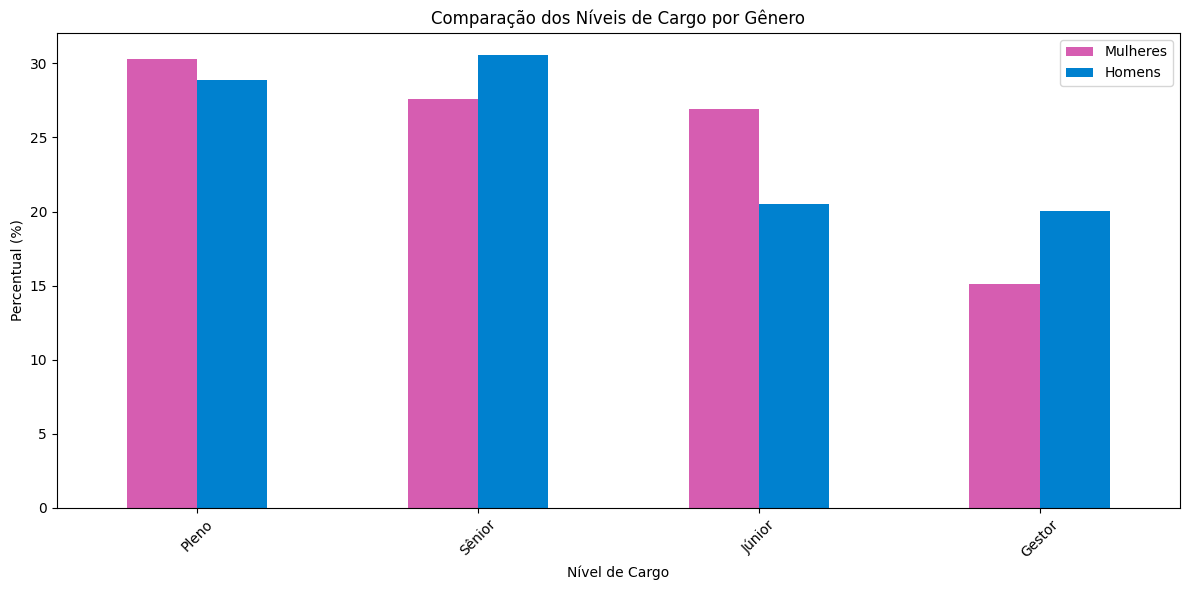

In [308]:

# Contagem absoluta e percentual dos níveis de cargo para mulheres
nivel_cargo_mulheres = mulheres_df['NOVO NIVEL'].value_counts()
nivel_cargo_mulheres_percentual = mulheres_df['NOVO NIVEL'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual dos níveis de cargo para homens
nivel_cargo_homens = homens_df['NOVO NIVEL'].value_counts()
nivel_cargo_homens_percentual = homens_df['NOVO NIVEL'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_nivel_cargo_mulheres = pd.DataFrame({'Contagem Absoluta': nivel_cargo_mulheres, 'Percentual (%)': nivel_cargo_mulheres_percentual.round(2)})
df_nivel_cargo_homens = pd.DataFrame({'Contagem Absoluta': nivel_cargo_homens, 'Percentual (%)': nivel_cargo_homens_percentual.round(2)})

# Exibir os resultados
print("Nível de Cargo das Mulheres")
print(df_nivel_cargo_mulheres)
print("\n--------------------------------")
print("Nível de Cargo dos Homens")
print(df_nivel_cargo_homens)
print("\n--------------------------------")

# Plotar gráfico comparativo dos níveis de cargo
df_nivel_cargo = pd.merge(df_nivel_cargo_mulheres, df_nivel_cargo_homens, left_index=True, right_index=True, suffixes=('_Mulheres', '_Homens'))

df_nivel_cargo[['Percentual (%)_Mulheres', 'Percentual (%)_Homens']].plot(kind='bar', figsize=(12, 6),color=['#D65Db1', '#0081CF'])
plt.title('Comparação dos Níveis de Cargo por Gênero')
plt.xlabel('Nível de Cargo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(['Mulheres', 'Homens'])
plt.tight_layout()
plt.show()


Motivos de Insatisfação das Mulheres
                                                    Contagem Absoluta  \
Motivos da insatisfação com a empresa atual?                            
                                                                  976   
Falta de oportunidade de crescimento no emprego...                 32   
Salário atual não corresponde ao mercado                           22   
Falta de oportunidade de crescimento no emprego...                 19   
Falta de maturidade analítica na empresa                           19   
Falta de oportunidade de crescimento no emprego...                 17   
Falta de oportunidade de crescimento no emprego...                 17   
Gostaria de trabalhar em em outra área de atuação                  14   
O clima de trabalho/ambiente não é bom                             12   
Falta de oportunidade de crescimento no emprego...                 11   
Falta de oportunidade de crescimento no emprego...                 10   
Salário atual 

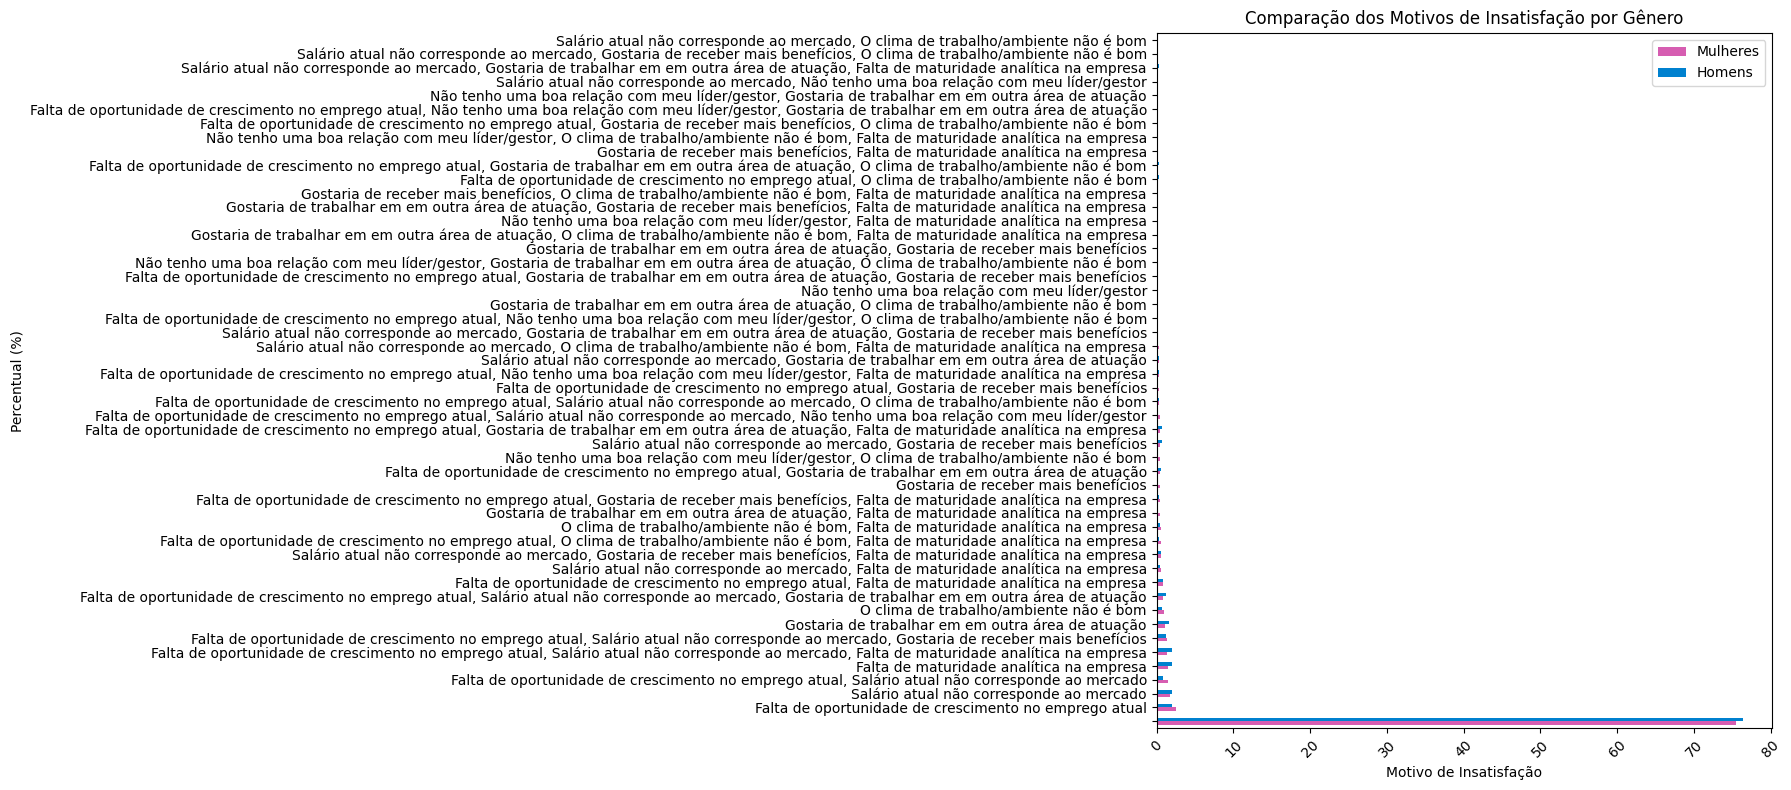

In [309]:
# Contagem absoluta e percentual dos motivos de insatisfação para mulheres
motivos_insatisfacao_mulheres = mulheres_df['Motivos da insatisfação com a empresa atual?'].value_counts()
motivos_insatisfacao_mulheres_percentual = mulheres_df['Motivos da insatisfação com a empresa atual?'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual dos motivos de insatisfação para homens
motivos_insatisfacao_homens = homens_df['Motivos da insatisfação com a empresa atual?'].value_counts()
motivos_insatisfacao_homens_percentual = homens_df['Motivos da insatisfação com a empresa atual?'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_motivos_insatisfacao_mulheres = pd.DataFrame({'Contagem Absoluta': motivos_insatisfacao_mulheres, 'Percentual (%)': motivos_insatisfacao_mulheres_percentual.round(2)})
df_motivos_insatisfacao_homens = pd.DataFrame({'Contagem Absoluta': motivos_insatisfacao_homens, 'Percentual (%)': motivos_insatisfacao_homens_percentual.round(2)})

# Exibir os resultados
print("Motivos de Insatisfação das Mulheres")
print(df_motivos_insatisfacao_mulheres)
print("\n--------------------------------")
print("Motivos de Insatisfação dos Homens")
print(df_motivos_insatisfacao_homens)
print("\n--------------------------------")

# Plotar gráfico comparativo dos motivos de insatisfação
df_motivos_insatisfacao = pd.merge(df_motivos_insatisfacao_mulheres, df_motivos_insatisfacao_homens, left_index=True, right_index=True, suffixes=('_Mulheres', '_Homens'))

df_motivos_insatisfacao[['Percentual (%)_Mulheres', 'Percentual (%)_Homens']].plot(kind='barh', figsize=(18, 8),color=['#D65Db1', '#0081CF'])
plt.title('Comparação dos Motivos de Insatisfação por Gênero')
plt.xlabel('Motivo de Insatisfação')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(['Mulheres', 'Homens'])
plt.tight_layout()
plt.show()

Forma de Trabalho Atual das Mulheres
                                                    Contagem Absoluta  \
Atualmente qual a sua forma de trabalho?                                
Modelo 100% remoto                                                560   
Modelo híbrido flexível (o funcionário tem libe...                216   
Modelo híbrido com dias fixos de trabalho prese...                193   
Modelo 100% presencial                                            142   

                                                    Percentual (%)  
Atualmente qual a sua forma de trabalho?                            
Modelo 100% remoto                                           50.41  
Modelo híbrido flexível (o funcionário tem libe...           19.44  
Modelo híbrido com dias fixos de trabalho prese...           17.37  
Modelo 100% presencial                                       12.78  

--------------------------------
Forma de Trabalho Atual dos Homens
                                         

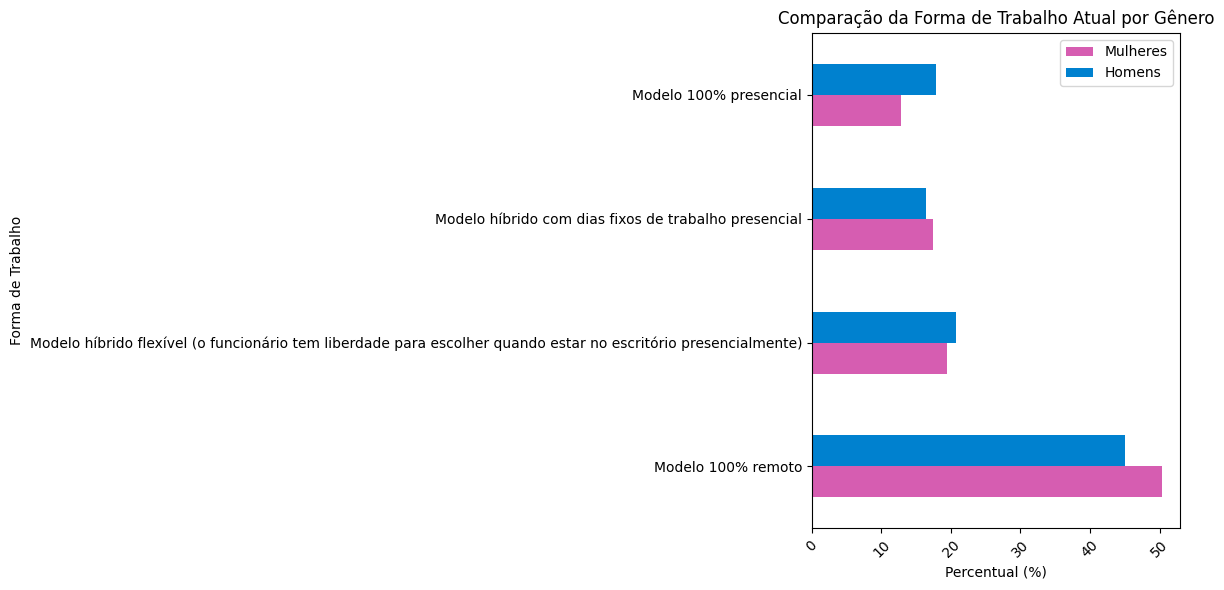

In [310]:
# Contagem absoluta e percentual da forma de trabalho atual para mulheres
forma_trabalho_atual_mulheres = mulheres_df['Atualmente qual a sua forma de trabalho?'].value_counts()
forma_trabalho_atual_mulheres_percentual = mulheres_df['Atualmente qual a sua forma de trabalho?'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual da forma de trabalho atual para homens
forma_trabalho_atual_homens = homens_df['Atualmente qual a sua forma de trabalho?'].value_counts()
forma_trabalho_atual_homens_percentual = homens_df['Atualmente qual a sua forma de trabalho?'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_forma_trabalho_atual_mulheres = pd.DataFrame({'Contagem Absoluta': forma_trabalho_atual_mulheres, 'Percentual (%)': forma_trabalho_atual_mulheres_percentual.round(2)})
df_forma_trabalho_atual_homens = pd.DataFrame({'Contagem Absoluta': forma_trabalho_atual_homens, 'Percentual (%)': forma_trabalho_atual_homens_percentual.round(2)})

# Exibir os resultados
print("Forma de Trabalho Atual das Mulheres")
print(df_forma_trabalho_atual_mulheres)
print("\n--------------------------------")
print("Forma de Trabalho Atual dos Homens")
print(df_forma_trabalho_atual_homens)
print("\n--------------------------------")

# Plotar gráfico comparativo das formas de trabalho atuais
df_forma_trabalho_atual = pd.merge(df_forma_trabalho_atual_mulheres, df_forma_trabalho_atual_homens, left_index=True, right_index=True, suffixes=('_Mulheres', '_Homens'))

df_forma_trabalho_atual[['Percentual (%)_Mulheres', 'Percentual (%)_Homens']].plot(kind='barh', figsize=(12, 6),color=['#D65Db1', '#0081CF'])
plt.title('Comparação da Forma de Trabalho Atual por Gênero')
plt.ylabel('Forma de Trabalho')
plt.xlabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(['Mulheres', 'Homens'])
plt.tight_layout()
plt.show()


Forma de Trabalho Ideal das Mulheres
                                                    Contagem Absoluta  \
Qual a forma de trabalho ideal para você?                               
Modelo 100% remoto                                                565   
Modelo híbrido flexível (o funcionário tem libe...                452   
Modelo híbrido com dias fixos de trabalho prese...                 84   
Modelo 100% presencial                                             10   

                                                    Percentual (%)  
Qual a forma de trabalho ideal para você?                           
Modelo 100% remoto                                           50.86  
Modelo híbrido flexível (o funcionário tem libe...           40.68  
Modelo híbrido com dias fixos de trabalho prese...            7.56  
Modelo 100% presencial                                        0.90  

--------------------------------
Forma de Trabalho Ideal dos Homens
                                         

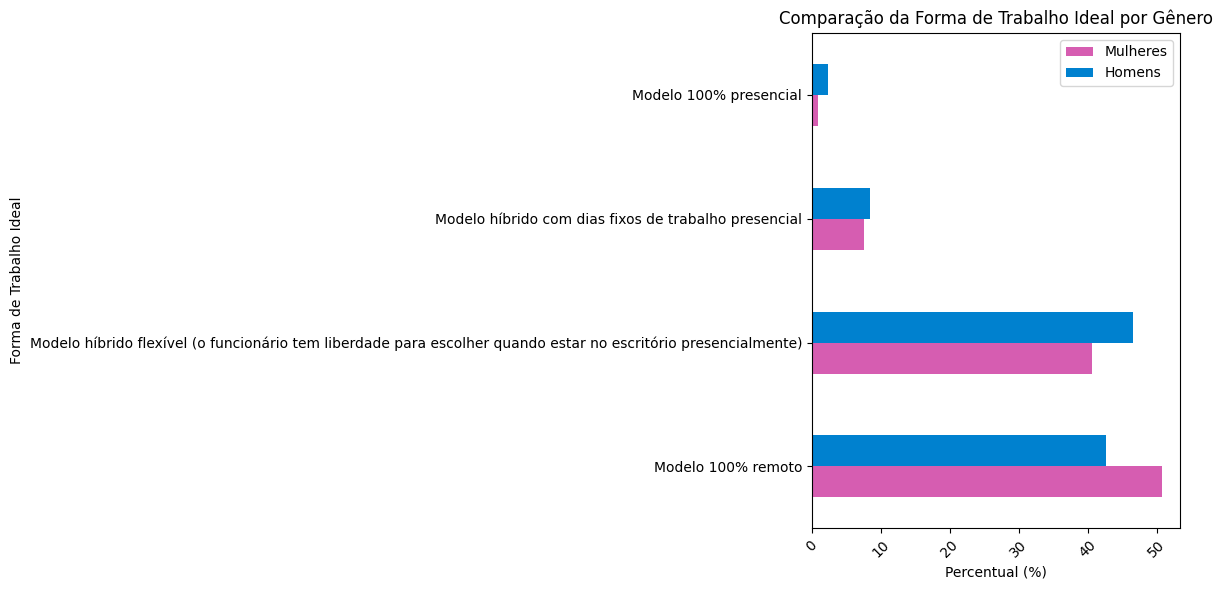

In [311]:
# Contagem absoluta e percentual da forma de trabalho ideal para mulheres
forma_trabalho_ideal_mulheres = mulheres_df['Qual a forma de trabalho ideal para você?'].value_counts()
forma_trabalho_ideal_mulheres_percentual = mulheres_df['Qual a forma de trabalho ideal para você?'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual da forma de trabalho ideal para homens
forma_trabalho_ideal_homens = homens_df['Qual a forma de trabalho ideal para você?'].value_counts()
forma_trabalho_ideal_homens_percentual = homens_df['Qual a forma de trabalho ideal para você?'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_forma_trabalho_ideal_mulheres = pd.DataFrame({'Contagem Absoluta': forma_trabalho_ideal_mulheres, 'Percentual (%)': forma_trabalho_ideal_mulheres_percentual.round(2)})
df_forma_trabalho_ideal_homens = pd.DataFrame({'Contagem Absoluta': forma_trabalho_ideal_homens, 'Percentual (%)': forma_trabalho_ideal_homens_percentual.round(2)})

# Exibir os resultados
print("Forma de Trabalho Ideal das Mulheres")
print(df_forma_trabalho_ideal_mulheres)
print("\n--------------------------------")
print("Forma de Trabalho Ideal dos Homens")
print(df_forma_trabalho_ideal_homens)
print("\n--------------------------------")

# Plotar gráfico comparativo das formas de trabalho ideal
df_forma_trabalho_ideal = pd.merge(df_forma_trabalho_ideal_mulheres, df_forma_trabalho_ideal_homens, left_index=True, right_index=True, suffixes=('_Mulheres', '_Homens'))

df_forma_trabalho_ideal[['Percentual (%)_Mulheres', 'Percentual (%)_Homens']].plot(kind='barh', figsize=(12, 6),color=['#D65Db1', '#0081CF'])
plt.title('Comparação da Forma de Trabalho Ideal por Gênero')
plt.ylabel('Forma de Trabalho Ideal')
plt.xlabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(['Mulheres', 'Homens'])
plt.tight_layout()
plt.show()


Objetivo na Área de Dados das Mulheres
                                                    Contagem Absoluta  \
Qual seu objetivo na área de dados?                                     
Migração de carreira: Trabalho em outra área e ...                 53   
Preparação profissional: Estou buscando conheci...                 50   
Primeiro emprego: Estou tentando encontrar a pr...                 43   
Apenas conhecimentos: Busco conhecimentos em da...                 16   
Sou da área de Dados.                                               1   
Gestor de dados                                                     1   
Já trabalho há anos na área de dados e busco ap...                  1   
Estou me tornando cientista de dados                                1   
Compartilhar conhecimento, mais de 20 anos em g...                  1   
Já trabalho na área de dados                                        1   
Crescimento profissional (já atuo na área de da...                  1   
Aprofundamen

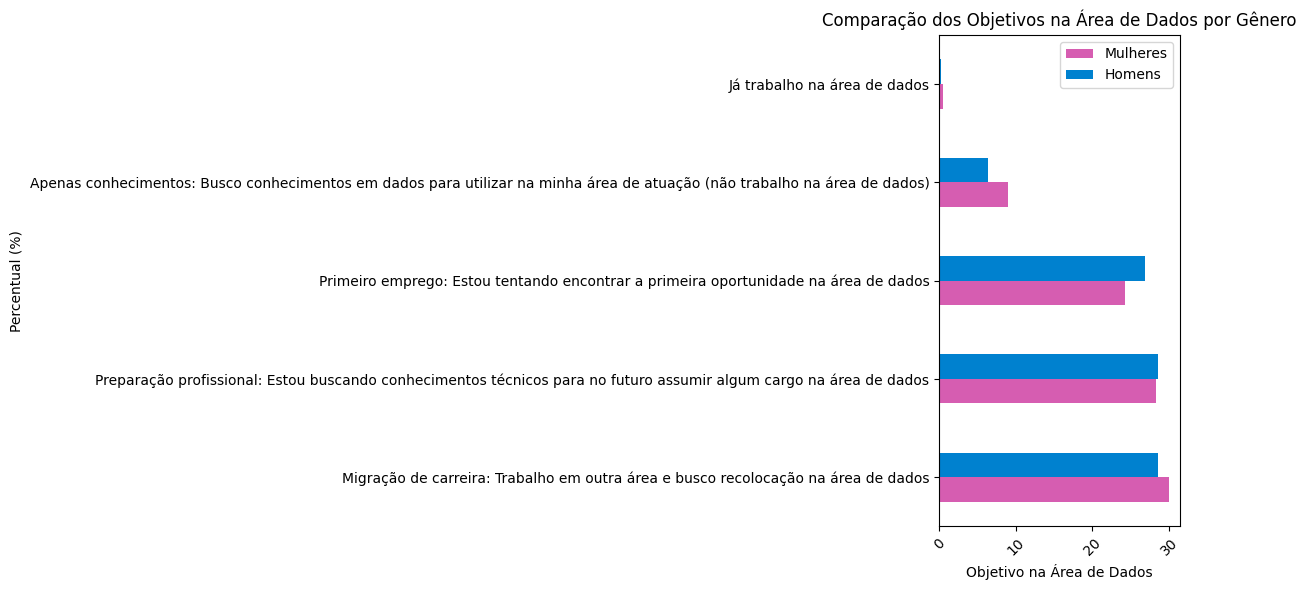

In [287]:

# Contagem absoluta e percentual dos objetivos na área de dados para mulheres
objetivo_area_dados_mulheres = mulheres_df['Qual seu objetivo na área de dados?'].value_counts()
objetivo_area_dados_mulheres_percentual = mulheres_df['Qual seu objetivo na área de dados?'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual dos objetivos na área de dados para homens
objetivo_area_dados_homens = homens_df['Qual seu objetivo na área de dados?'].value_counts()
objetivo_area_dados_homens_percentual = homens_df['Qual seu objetivo na área de dados?'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_objetivo_area_dados_mulheres = pd.DataFrame({'Contagem Absoluta': objetivo_area_dados_mulheres, 'Percentual (%)': objetivo_area_dados_mulheres_percentual.round(2)})
df_objetivo_area_dados_homens = pd.DataFrame({'Contagem Absoluta': objetivo_area_dados_homens, 'Percentual (%)': objetivo_area_dados_homens_percentual.round(2)})

# Exibir os resultados
print("Objetivo na Área de Dados das Mulheres")
print(df_objetivo_area_dados_mulheres)
print("\n--------------------------------")
print("Objetivo na Área de Dados dos Homens")
print(df_objetivo_area_dados_homens)
print("\n--------------------------------")

# Plotar gráfico comparativo dos objetivos na área de dados
df_objetivo_area_dados = pd.merge(df_objetivo_area_dados_mulheres, df_objetivo_area_dados_homens, left_index=True, right_index=True, suffixes=('_Mulheres', '_Homens'))

df_objetivo_area_dados[['Percentual (%)_Mulheres', 'Percentual (%)_Homens']].plot(kind='barh', figsize=(12, 6),color=['#D65Db1', '#0081CF'])
plt.title('Comparação dos Objetivos na Área de Dados por Gênero')
plt.xlabel('Objetivo na Área de Dados')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(['Mulheres', 'Homens'])
plt.tight_layout()
plt.show()


Oportunidade Buscada pelas Mulheres (Contagem Absoluta):
                                                    Contagem Absoluta  \
Qual oportunidade você está buscando?                                   
Analista de Dados/Data Analyst                                     56   
Cientista de Dados/Data Scientist                                  23   
Analista de Negócios/Business Analyst                               4   
Analista de BI/BI Analyst                                           4   
Engenheiro de Machine Learning/ML Engineer                          3   
Engenheiro de Dados/Arquiteto de Dados/Data Eng...                  2   
Analytics Engineer                                                  1   
Desenvolvedor                                                       1   
UX                                                                  1   

                                                    Percentual (%)  
Qual oportunidade você está buscando?                               
A

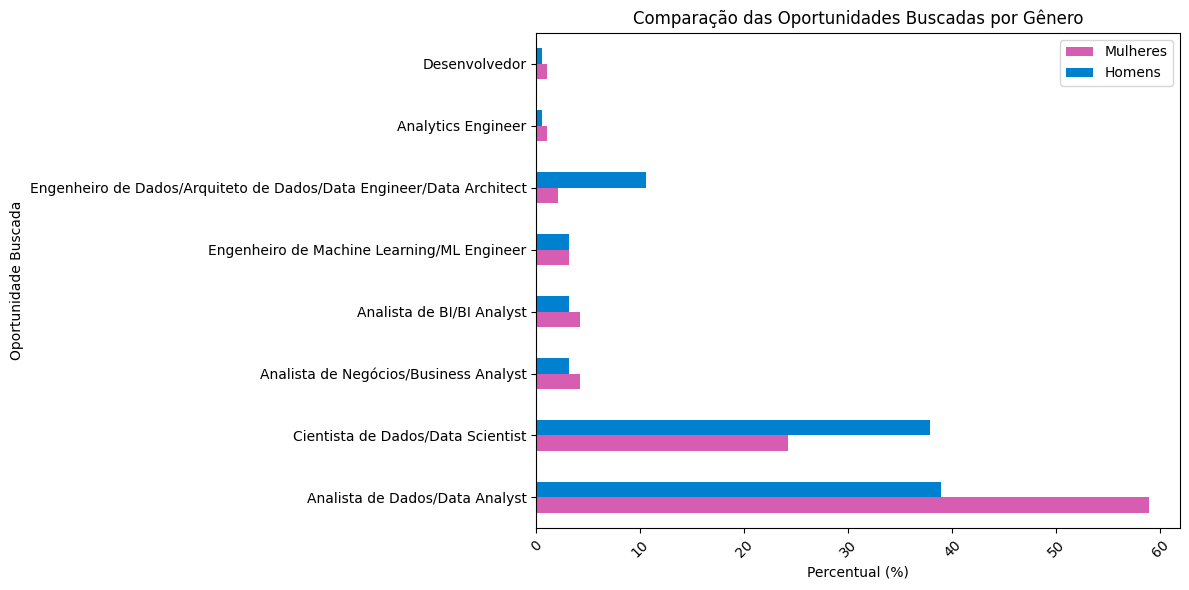

In [288]:


# Contagem absoluta e percentual das oportunidades buscadas para mulheres
oportunidade_buscada_mulheres = mulheres_df['Qual oportunidade você está buscando?'].value_counts()
oportunidade_buscada_mulheres_percentual = mulheres_df['Qual oportunidade você está buscando?'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual das oportunidades buscadas para homens
oportunidade_buscada_homens = homens_df['Qual oportunidade você está buscando?'].value_counts()
oportunidade_buscada_homens_percentual = homens_df['Qual oportunidade você está buscando?'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_oportunidade_buscada_mulheres = pd.DataFrame({'Contagem Absoluta': oportunidade_buscada_mulheres, 'Percentual (%)': oportunidade_buscada_mulheres_percentual.round(2)})
df_oportunidade_buscada_homens = pd.DataFrame({'Contagem Absoluta': oportunidade_buscada_homens, 'Percentual (%)': oportunidade_buscada_homens_percentual.round(2)})

# Exibir os resultados
print("Oportunidade Buscada pelas Mulheres (Contagem Absoluta):")
print(df_oportunidade_buscada_mulheres)
print("\n--------------------------------")

print("Oportunidade Buscada pelos Homens (Contagem Absoluta):")
print(df_oportunidade_buscada_homens)
print("\n--------------------------------")

# Plotar gráfico comparativo das oportunidades buscadas
df_oportunidade_buscada = pd.merge(df_oportunidade_buscada_mulheres, df_oportunidade_buscada_homens, left_index=True, right_index=True, suffixes=('_Mulheres', '_Homens'))

df_oportunidade_buscada[['Percentual (%)_Mulheres', 'Percentual (%)_Homens']].plot(kind='barh', figsize=(12, 6),color=['#D65Db1', '#0081CF'])
plt.title('Comparação das Oportunidades Buscadas por Gênero')
plt.ylabel('Oportunidade Buscada')
plt.xlabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(['Mulheres', 'Homens'])
plt.tight_layout()
plt.show()


Tempo de Busca por Oportunidade das Mulheres
                                                    Contagem Absoluta  \
Há quanto tempo você busca uma oportunidade na ...                      
0 - 6 meses                                                        55   
7 meses - 1 ano                                                    26   
1 ano - 2 anos                                                     12   
acima de 2 anos                                                     3   

                                                    Percentual (%)  
Há quanto tempo você busca uma oportunidade na ...                  
0 - 6 meses                                                  57.29  
7 meses - 1 ano                                              27.08  
1 ano - 2 anos                                               12.50  
acima de 2 anos                                               3.12  

--------------------------------
Tempo de Busca por Oportunidade dos Homens
                         

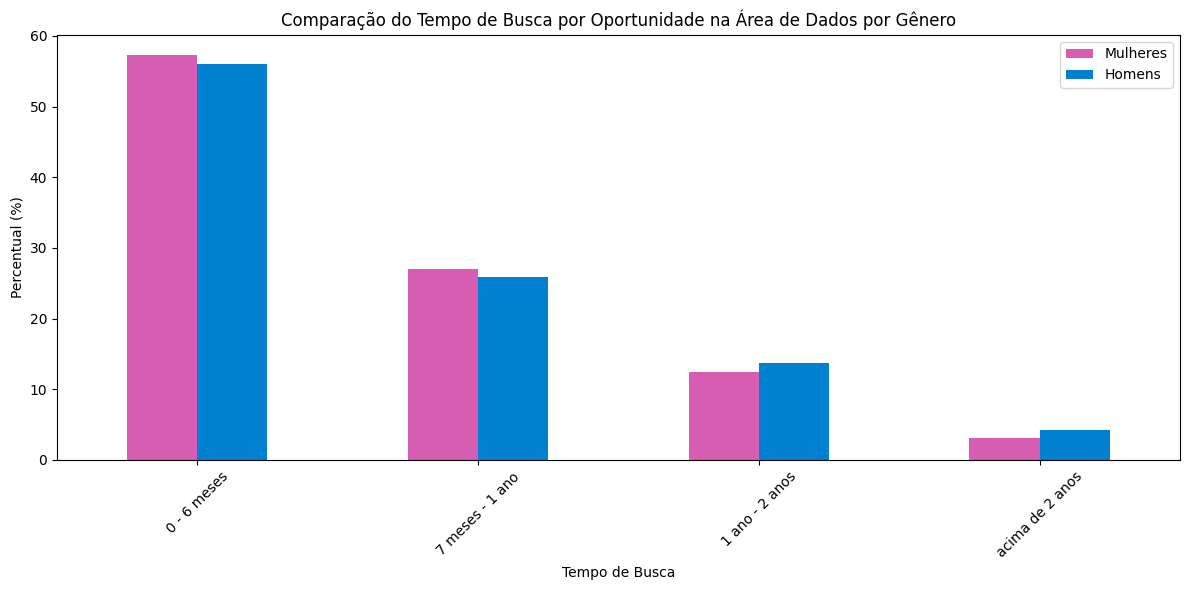

In [289]:
# Contagem absoluta e percentual do tempo de busca por oportunidade para mulheres
tempo_busca_oportunidade_mulheres = mulheres_df['Há quanto tempo você busca uma oportunidade na área de dados?'].value_counts()
tempo_busca_oportunidade_mulheres_percentual = mulheres_df['Há quanto tempo você busca uma oportunidade na área de dados?'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual do tempo de busca por oportunidade para homens
tempo_busca_oportunidade_homens = homens_df['Há quanto tempo você busca uma oportunidade na área de dados?'].value_counts()
tempo_busca_oportunidade_homens_percentual = homens_df['Há quanto tempo você busca uma oportunidade na área de dados?'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_tempo_busca_oportunidade_mulheres = pd.DataFrame({'Contagem Absoluta': tempo_busca_oportunidade_mulheres, 'Percentual (%)': tempo_busca_oportunidade_mulheres_percentual.round(2)})
df_tempo_busca_oportunidade_homens = pd.DataFrame({'Contagem Absoluta': tempo_busca_oportunidade_homens, 'Percentual (%)': tempo_busca_oportunidade_homens_percentual.round(2)})

# Exibir os resultados
print("Tempo de Busca por Oportunidade das Mulheres")
print(df_tempo_busca_oportunidade_mulheres)
print("\n--------------------------------")

print("Tempo de Busca por Oportunidade dos Homens")
print(df_tempo_busca_oportunidade_homens)
print("\n--------------------------------")

# Plotar gráfico comparativo do tempo de busca por oportunidade
df_tempo_busca_oportunidade = pd.merge(df_tempo_busca_oportunidade_mulheres, df_tempo_busca_oportunidade_homens, left_index=True, right_index=True, suffixes=('_Mulheres', '_Homens'))

df_tempo_busca_oportunidade[['Percentual (%)_Mulheres', 'Percentual (%)_Homens']].plot(kind='bar', figsize=(12, 6),color=['#D65Db1', '#0081CF'])
plt.title('Comparação do Tempo de Busca por Oportunidade na Área de Dados por Gênero')
plt.xlabel('Tempo de Busca')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(['Mulheres', 'Homens'])
plt.tight_layout()
plt.show()


Experiência na Busca por Emprego das Mulheres
                                                    Contagem Absoluta  \
Como tem sido a busca por um emprego na área de...                      
Já me candidatei, mas nunca fui chamado para en...                 40   
Ainda não me candidatei a nenhuma vaga na área                     26   
Já participei de 1 a 3 entrevistas, mas não fui...                 20   
Participei de mais de 3 entrevistas, mas não fu...                  9   
Participei de mais de 3 entrevistas e fui contr...                  1   

                                                    Percentual (%)  
Como tem sido a busca por um emprego na área de...                  
Já me candidatei, mas nunca fui chamado para en...           41.67  
Ainda não me candidatei a nenhuma vaga na área               27.08  
Já participei de 1 a 3 entrevistas, mas não fui...           20.83  
Participei de mais de 3 entrevistas, mas não fu...            9.38  
Participei de mais de 3 entr

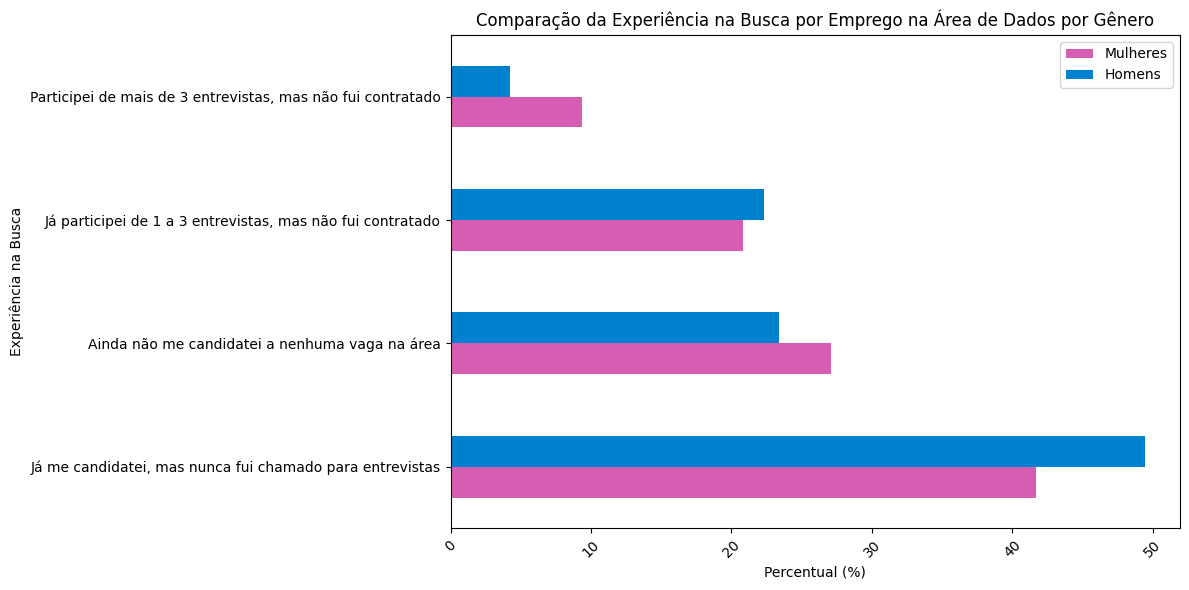

In [290]:
# Contagem absoluta e percentual da experiência na busca por emprego para mulheres
experiencia_busca_emprego_mulheres = mulheres_df['Como tem sido a busca por um emprego na área de dados?'].value_counts()
experiencia_busca_emprego_mulheres_percentual = mulheres_df['Como tem sido a busca por um emprego na área de dados?'].value_counts(normalize=True) * 100

# Contagem absoluta e percentual da experiência na busca por emprego para homens
experiencia_busca_emprego_homens = homens_df['Como tem sido a busca por um emprego na área de dados?'].value_counts()
experiencia_busca_emprego_homens_percentual = homens_df['Como tem sido a busca por um emprego na área de dados?'].value_counts(normalize=True) * 100

# Criar DataFrames para mulheres e homens
df_experiencia_busca_emprego_mulheres = pd.DataFrame({'Contagem Absoluta': experiencia_busca_emprego_mulheres, 'Percentual (%)': experiencia_busca_emprego_mulheres_percentual.round(2)})
df_experiencia_busca_emprego_homens = pd.DataFrame({'Contagem Absoluta': experiencia_busca_emprego_homens, 'Percentual (%)': experiencia_busca_emprego_homens_percentual.round(2)})

# Exibir os resultados
print("Experiência na Busca por Emprego das Mulheres")
print(df_experiencia_busca_emprego_mulheres)
print("\n--------------------------------")

print("Experiência na Busca por Emprego dos Homens")
print(df_experiencia_busca_emprego_homens)
print("\n--------------------------------")

# Plotar gráfico comparativo da experiência na busca por emprego
df_experiencia_busca_emprego = pd.merge(df_experiencia_busca_emprego_mulheres, df_experiencia_busca_emprego_homens, left_index=True, right_index=True, suffixes=('_Mulheres', '_Homens'))

df_experiencia_busca_emprego[['Percentual (%)_Mulheres', 'Percentual (%)_Homens']].plot(kind='barh', figsize=(12, 6),color=['#D65Db1', '#0081CF'])
plt.title('Comparação da Experiência na Busca por Emprego na Área de Dados por Gênero')
plt.ylabel('Experiência na Busca')
plt.xlabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(['Mulheres', 'Homens'])
plt.tight_layout()
plt.show()



In [291]:

# Contabilizar motivos de insatisfação para mulheres
dados_mulheres = df_combinado1[df_combinado1['Genero'] == 'Feminino'].copy()

for motivo in motivo_insatisfacao:
    dados_mulheres[motivo] = dados_mulheres['Motivos da insatisfação com a empresa atual?'].apply(lambda x: 1 if motivo in x else 0)

contagem_motivos_mulheres = dados_mulheres[motivo_insatisfacao].sum()
total_mulheres = len(dados_mulheres)

# Calcular o percentual
percentual_motivos_mulheres = (contagem_motivos_mulheres / total_mulheres) * 100

# Criar DataFrame com contagem e percentual
contagem_motivos_mulheres_df = pd.DataFrame({
    'Motivo': contagem_motivos_mulheres.index,
    'Quantidade': contagem_motivos_mulheres.values,
    'Percentual': percentual_motivos_mulheres.values
})

print(contagem_motivos_mulheres_df)


                                              Motivo  Quantidade  Percentual
0  Falta de oportunidade de crescimento no empreg...         160   12.374323
1           Salário atual não corresponde ao mercado         132   10.208817
2     Não tenho uma boa relação com meu líder/gestor          34    2.629544
3  Gostaria de trabalhar em em outra área de atuação          71    5.491106
4                Gostaria de receber mais benefícios          67    5.181748
5             O clima de trabalho/ambiente não é bom          63    4.872390
6           Falta de maturidade analítica na empresa         118    9.126063


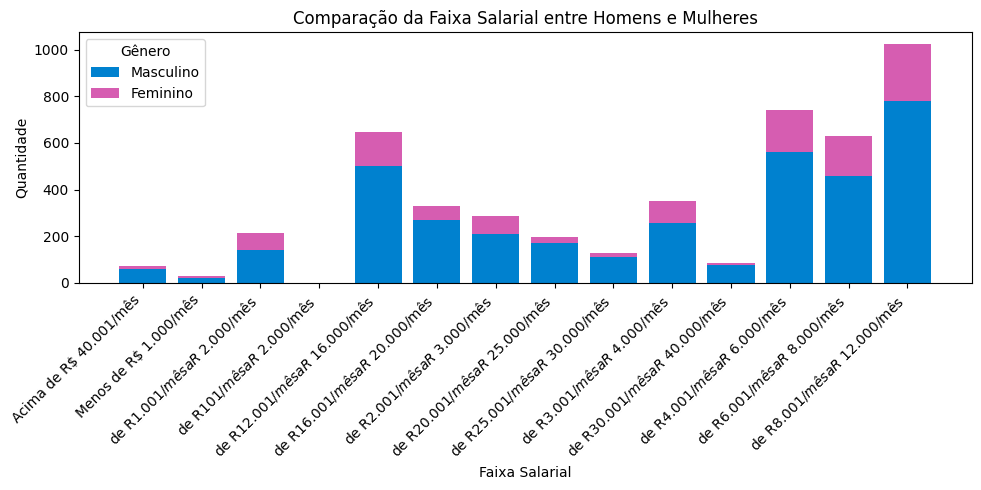

In [292]:
tabela_cruzada = pd.crosstab(df_combinado1['Faixa salarial'], df_combinado1['Genero'])

# Inverter a ordem das colunas da tabela cruzada
tabela_cruzada = tabela_cruzada[['Feminino', 'Masculino']]

# Criar o gráfico de barras empilhado
plt.figure(figsize=(10, 5))

# Criar as barras para os homens
plt.bar(tabela_cruzada.index, tabela_cruzada['Masculino'], label='Masculino', color='#0081CF')

# Criar as barras para as mulheres, empilhadas sobre as barras dos homens
plt.bar(tabela_cruzada.index, tabela_cruzada['Feminino'], bottom=tabela_cruzada['Masculino'], label='Feminino', color='#D65Db1')

plt.title("Comparação da Faixa Salarial entre Homens e Mulheres")
plt.xlabel("Faixa Salarial")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gênero")
plt.tight_layout()
plt.show()
